# STATSBOMB DATASET

# Índice
1. [Competiciones](#Competiciones)
2. [Partidos](#Partidos)
3. [Alineaciones](#Alineaciones)

In [161]:
from statsbombpy import sb
import pandas as pd
from pandas import json_normalize
import numpy as np
import seaborn as sns
import glob
import os
import missingno as msno

In [162]:
ruta_competiciones = os.path.join("data",'competitions.json')
ruta_partidos = glob.glob(os.path.join("data",'matches','**','*.json'),recursive=True)
ruta_alineaciones = glob.glob(os.path.join("data",'lineups','**','*.json'),recursive=True)

## Competiciones

In [163]:
# También se pueden obtener los datos mediante la API de statsbomb
#comp = sb.competitions()
#comp.to_csv('competitions.csv',index=False)
#df_comp = pd.DataFrame(comp)
#df_comp

In [164]:
# Obtener las competiciones de los datos descargados
df_competiciones = pd.read_json(ruta_competiciones,convert_dates=['match_updated','match_available'])
df_competiciones.sort_values(['competition_gender', 'competition_international', 'country_name', 'competition_id','season_id'],inplace=True)
df_competiciones.reset_index(drop=True,inplace=True)
df_competiciones

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,37,4,England,FA Women's Super League,female,False,False,2018/2019,2022-12-01 11:41:40.025541,2021-06-13T16:17:31.694,None,2022-12-01 11:41:40.025541
1,37,42,England,FA Women's Super League,female,False,False,2019/2020,2023-02-25 12:45:18.376026,2021-06-13T16:17:31.694,None,2023-02-25 12:45:18.376026
2,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25 14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25 14:52:09.326729
3,49,3,United States of America,NWSL,female,False,False,2018,2023-04-19 10:28:36.824565,2021-06-13T16:17:31.694,None,2023-04-19 10:28:36.824565
4,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-02-22 23:06:39.942980,2023-04-26T02:03:52.207197,2023-04-26T02:03:52.207197,2023-02-22 23:06:39.942980
5,72,30,International,Women's World Cup,female,False,True,2019,2023-04-07 09:00:52.515359,2021-06-13T16:17:31.694,None,2023-04-07 09:00:52.515359
6,2,44,England,Premier League,male,False,False,2003/2004,2023-03-11 10:52:12.579230,2021-06-13T16:17:31.694,None,2023-03-11 10:52:12.579230
7,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27 11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23 21:55:30.425330
8,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27 11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29 05:00:00.000000
9,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07 12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07 12:20:48.118250


In [165]:
print(f'En el dataset de Statsbomb hay: {len(pd.unique(df_competiciones["competition_id"]))} competiciones, correspondiente a {len(pd.unique(df_competiciones["country_name"]))} países. '
      f'Sumando un total de {len(df_competiciones)} torneos.')
print("Hay 6 competiciones de fútbol femenino: Liga de Inglaterra (3) 2018-2021, Liga Americana 2018, Eurocopa 2022 y Mundial 2019.")
print("Hay 36 competiciones de fútbol masculino: Liga de Inglaterra (1) 2003/2004, Liga Española (17) 2004-2021, Champions League (15) [1999-2000, 2003-2005, 2006-2007, 2008-2018], Liga de India (1) 2021/2022, Eurocopa 2020 y Mundial 2018 y 20222.")

En el dataset de Statsbomb hay: 10 competiciones, correspondiente a 6 países. Sumando un total de 43 torneos.
Hay 6 competiciones de fútbol femenino: Liga de Inglaterra (3) 2018-2021, Liga Americana 2018, Eurocopa 2022 y Mundial 2019.
Hay 36 competiciones de fútbol masculino: Liga de Inglaterra (1) 2003/2004, Liga Española (17) 2004-2021, Champions League (15) [1999-2000, 2003-2005, 2006-2007, 2008-2018], Liga de India (1) 2021/2022, Eurocopa 2020 y Mundial 2018 y 20222.


### Análisis exploratorio

In [166]:
df_competiciones.apply(lambda x: x.nunique())

competition_id               10
season_id                    24
country_name                  6
competition_name             10
competition_gender            2
competition_youth             1
competition_international     2
season_name                  24
match_updated                36
match_updated_360             6
match_available_360           4
match_available              37
dtype: int64

In [167]:
df_competiciones_filtrado = df_competiciones.copy()
df_competiciones_filtrado

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,37,4,England,FA Women's Super League,female,False,False,2018/2019,2022-12-01 11:41:40.025541,2021-06-13T16:17:31.694,None,2022-12-01 11:41:40.025541
1,37,42,England,FA Women's Super League,female,False,False,2019/2020,2023-02-25 12:45:18.376026,2021-06-13T16:17:31.694,None,2023-02-25 12:45:18.376026
2,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25 14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25 14:52:09.326729
3,49,3,United States of America,NWSL,female,False,False,2018,2023-04-19 10:28:36.824565,2021-06-13T16:17:31.694,None,2023-04-19 10:28:36.824565
4,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-02-22 23:06:39.942980,2023-04-26T02:03:52.207197,2023-04-26T02:03:52.207197,2023-02-22 23:06:39.942980
5,72,30,International,Women's World Cup,female,False,True,2019,2023-04-07 09:00:52.515359,2021-06-13T16:17:31.694,None,2023-04-07 09:00:52.515359
6,2,44,England,Premier League,male,False,False,2003/2004,2023-03-11 10:52:12.579230,2021-06-13T16:17:31.694,None,2023-03-11 10:52:12.579230
7,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27 11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23 21:55:30.425330
8,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27 11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29 05:00:00.000000
9,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07 12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07 12:20:48.118250


Vemos que competition_youth siempre es false por lo que la eliminamos la columna.
Los partidos de 360 no nos interesan, eliminamos las columnas: match_updated_360, match_available_360.

In [168]:
df_competiciones_filtrado = df_competiciones_filtrado.drop(['competition_youth', 'match_updated_360', 'match_available_360'], axis=1)
df_competiciones_filtrado

,competition_id,season_id,country_name,competition_name,competition_gender,competition_international,season_name,match_updated,match_available
0,37,4,England,FA Women's Super League,female,False,2018/2019,2022-12-01 11:41:40.025541,2022-12-01 11:41:40.025541
1,37,42,England,FA Women's Super League,female,False,2019/2020,2023-02-25 12:45:18.376026,2023-02-25 12:45:18.376026
2,37,90,England,FA Women's Super League,female,False,2020/2021,2023-02-25 14:52:09.326729,2023-02-25 14:52:09.326729
3,49,3,United States of America,NWSL,female,False,2018,2023-04-19 10:28:36.824565,2023-04-19 10:28:36.824565
4,53,106,Europe,UEFA Women's Euro,female,True,2022,2023-02-22 23:06:39.942980,2023-02-22 23:06:39.942980
5,72,30,International,Women's World Cup,female,True,2019,2023-04-07 09:00:52.515359,2023-04-07 09:00:52.515359
6,2,44,England,Premier League,male,False,2003/2004,2023-03-11 10:52:12.579230,2023-03-11 10:52:12.579230
7,16,1,Europe,Champions League,male,False,2017/2018,2021-08-27 11:26:39.802832,2021-01-23 21:55:30.425330
8,16,2,Europe,Champions League,male,False,2016/2017,2021-08-27 11:26:39.802832,2020-07-29 05:00:00.000000
9,16,4,Europe,Champions League,male,False,2018/2019,2023-03-07 12:20:48.118250,2023-03-07 12:20:48.118250


#### Empezamos a analizar las columnas

In [169]:
df_competiciones_filtrado.country_name.value_counts()

Europe                      17
Spain                       17
England                      4
International                3
United States of America     1
India                        1
Name: country_name, dtype: int64

Las competiciones nacionales son de España (17), Inglaterra (4) India (1) y EEUU (1). Hay una Europea (17) y otra internacional (2).

In [170]:
df_competiciones_filtrado.competition_name.value_counts()

La Liga                    17
Champions League           15
FA Women's Super League     3
FIFA World Cup              2
NWSL                        1
UEFA Women's Euro           1
Women's World Cup           1
Premier League              1
Indian Super league         1
UEFA Euro                   1
Name: competition_name, dtype: int64

In [171]:
df_competiciones_filtrado.season_name.value_counts()

2018/2019    3
2010/2011    2
2008/2009    2
2006/2007    2
2004/2005    2
2015/2016    2
2014/2015    2
2013/2014    2
2019/2020    2
2011/2012    2
2012/2013    2
2009/2010    2
2016/2017    2
2017/2018    2
2003/2004    2
2022         2
2018         2
2020/2021    2
2019         1
1999/2000    1
2021/2022    1
2005/2006    1
2007/2008    1
2020         1
Name: season_name, dtype: int64

In [172]:
print("Vemos si la temporada con más registros tiene alguna comparación interesante. Sólo puede ser útil la comparación Liga vs Champions.")
df_competiciones_filtrado.loc[df_competiciones_filtrado['season_name'] == '2018/2019']

Vemos si la temporada con más registros tiene alguna comparación interesante. Sólo puede ser útil la comparación Liga vs Champions.


,competition_id,season_id,country_name,competition_name,competition_gender,competition_international,season_name,match_updated,match_available
0,37,4,England,FA Women's Super League,female,False,2018/2019,2022-12-01 11:41:40.025541,2022-12-01 11:41:40.025541
9,16,4,Europe,Champions League,male,False,2018/2019,2023-03-07 12:20:48.118250,2023-03-07 12:20:48.118250
25,11,4,Spain,La Liga,male,False,2018/2019,2023-05-11 08:22:01.941875,2023-05-11 08:22:01.941875


In [173]:
#renombramos las columas
df_competiciones_filtrado=df_competiciones_filtrado.rename(columns={'competition_id': 'competicion_id','season_id':'id_temporada','country_name':'pais', 'competition_name':'competicion_nombre', 'competition_gender':'genero_competicion','competition_international':'competicion_internacional', 'season_name':'temporada', 'match_available':'fecha_subida','match_updated':'fecha_actualizada'})
df_competiciones_filtrado

,competicion_id,id_temporada,pais,competicion_nombre,genero_competicion,competicion_internacional,temporada,fecha_actualizada,fecha_subida
0,37,4,England,FA Women's Super League,female,False,2018/2019,2022-12-01 11:41:40.025541,2022-12-01 11:41:40.025541
1,37,42,England,FA Women's Super League,female,False,2019/2020,2023-02-25 12:45:18.376026,2023-02-25 12:45:18.376026
2,37,90,England,FA Women's Super League,female,False,2020/2021,2023-02-25 14:52:09.326729,2023-02-25 14:52:09.326729
3,49,3,United States of America,NWSL,female,False,2018,2023-04-19 10:28:36.824565,2023-04-19 10:28:36.824565
4,53,106,Europe,UEFA Women's Euro,female,True,2022,2023-02-22 23:06:39.942980,2023-02-22 23:06:39.942980
5,72,30,International,Women's World Cup,female,True,2019,2023-04-07 09:00:52.515359,2023-04-07 09:00:52.515359
6,2,44,England,Premier League,male,False,2003/2004,2023-03-11 10:52:12.579230,2023-03-11 10:52:12.579230
7,16,1,Europe,Champions League,male,False,2017/2018,2021-08-27 11:26:39.802832,2021-01-23 21:55:30.425330
8,16,2,Europe,Champions League,male,False,2016/2017,2021-08-27 11:26:39.802832,2020-07-29 05:00:00.000000
9,16,4,Europe,Champions League,male,False,2018/2019,2023-03-07 12:20:48.118250,2023-03-07 12:20:48.118250


In [174]:
# ordenamos las columas
df_competiciones_filtrado = df_competiciones_filtrado.reindex(columns=['competicion_id','competicion_nombre' ,'id_temporada','temporada','pais','genero_competicion','competicion_internacional','fecha_subida', 'fecha_actualizada'])
df_competiciones_filtrado

,competicion_id,competicion_nombre,id_temporada,temporada,pais,genero_competicion,competicion_internacional,fecha_subida,fecha_actualizada
0,37,FA Women's Super League,4,2018/2019,England,female,False,2022-12-01 11:41:40.025541,2022-12-01 11:41:40.025541
1,37,FA Women's Super League,42,2019/2020,England,female,False,2023-02-25 12:45:18.376026,2023-02-25 12:45:18.376026
2,37,FA Women's Super League,90,2020/2021,England,female,False,2023-02-25 14:52:09.326729,2023-02-25 14:52:09.326729
3,49,NWSL,3,2018,United States of America,female,False,2023-04-19 10:28:36.824565,2023-04-19 10:28:36.824565
4,53,UEFA Women's Euro,106,2022,Europe,female,True,2023-02-22 23:06:39.942980,2023-02-22 23:06:39.942980
5,72,Women's World Cup,30,2019,International,female,True,2023-04-07 09:00:52.515359,2023-04-07 09:00:52.515359
6,2,Premier League,44,2003/2004,England,male,False,2023-03-11 10:52:12.579230,2023-03-11 10:52:12.579230
7,16,Champions League,1,2017/2018,Europe,male,False,2021-01-23 21:55:30.425330,2021-08-27 11:26:39.802832
8,16,Champions League,2,2016/2017,Europe,male,False,2020-07-29 05:00:00.000000,2021-08-27 11:26:39.802832
9,16,Champions League,4,2018/2019,Europe,male,False,2023-03-07 12:20:48.118250,2023-03-07 12:20:48.118250


In [175]:
df_competiciones_filtrado.genero_competicion.value_counts()

male      37
female     6
Name: genero_competicion, dtype: int64

In [176]:
# se eliminan las competiciones femeninas
df_competiciones_filtrado = df_competiciones_filtrado[df_competiciones_filtrado['genero_competicion'] != 'female']
df_competiciones_filtrado.genero_competicion.value_counts()
df_competiciones_filtrado = df_competiciones_filtrado.drop(columns=['genero_competicion'])

In [177]:
pd.set_option('display.max_info_columns', df_competiciones_filtrado.shape[1])
df_competiciones_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 6 to 42
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   competicion_id             37 non-null     int64         
 1   competicion_nombre         37 non-null     object        
 2   id_temporada               37 non-null     int64         
 3   temporada                  37 non-null     object        
 4   pais                       37 non-null     object        
 5   competicion_internacional  37 non-null     bool          
 6   fecha_subida               37 non-null     datetime64[ns]
 7   fecha_actualizada          37 non-null     datetime64[ns]
dtypes: bool(1), datetime64[ns](2), int64(2), object(3)
memory usage: 2.3+ KB


In [178]:
resumen_competiciones = df_competiciones_filtrado.groupby(['competicion_id', 'competicion_nombre']).size().reset_index(name='apariciones')
print(resumen_competiciones)

   competicion_id   competicion_nombre  apariciones
0               2       Premier League            1
1              11              La Liga           17
2              16     Champions League           15
3              43       FIFA World Cup            2
4              55            UEFA Euro            1
5            1238  Indian Super league            1


In [179]:
df_competiciones_filtrado = df_competiciones_filtrado.loc[df_competiciones_filtrado['competicion_nombre'] != 'Indian Super league']
df_competiciones_filtrado = df_competiciones_filtrado.loc[df_competiciones_filtrado['competicion_nombre'] != 'Premier League']
resumen_competiciones = df_competiciones_filtrado.groupby(['competicion_id', 'competicion_nombre']).size().reset_index(name='apariciones')
print(resumen_competiciones)

   competicion_id competicion_nombre  apariciones
0              11            La Liga           17
1              16   Champions League           15
2              43     FIFA World Cup            2
3              55          UEFA Euro            1


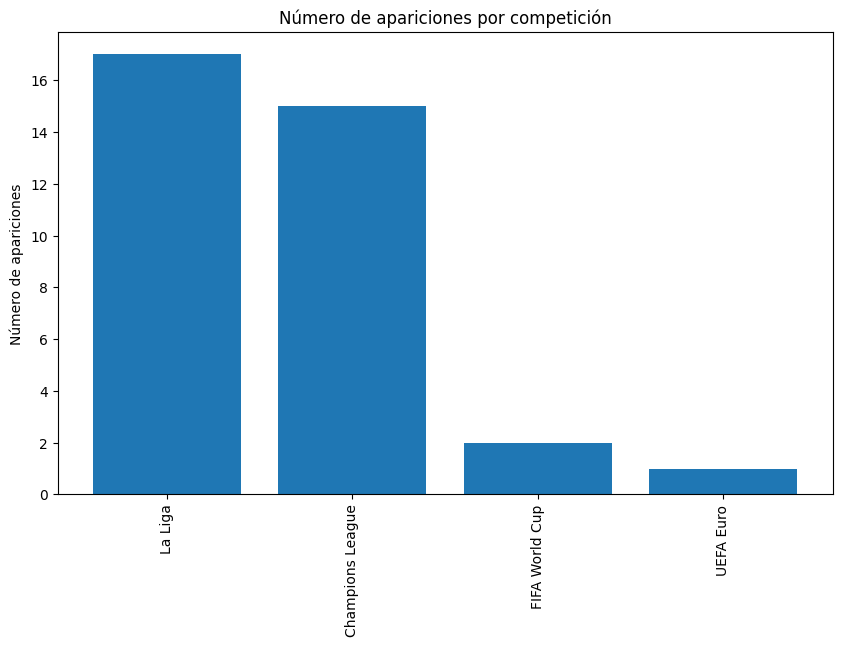

In [180]:
import matplotlib.pyplot as plt

# Ordena el DataFrame por 'numero_de_apariciones' en orden descendente
grafico_competiciones = resumen_competiciones.sort_values('apariciones', ascending=False)

# Crea un gráfico de barras
plt.figure(figsize=(10,6))  # Ajusta el tamaño del gráfico
plt.bar(resumen_competiciones['competicion_nombre'], resumen_competiciones['apariciones'])

# Añade títulos y etiquetas
plt.title('Número de apariciones por competición')
plt.ylabel('Número de apariciones')

# Rota las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()

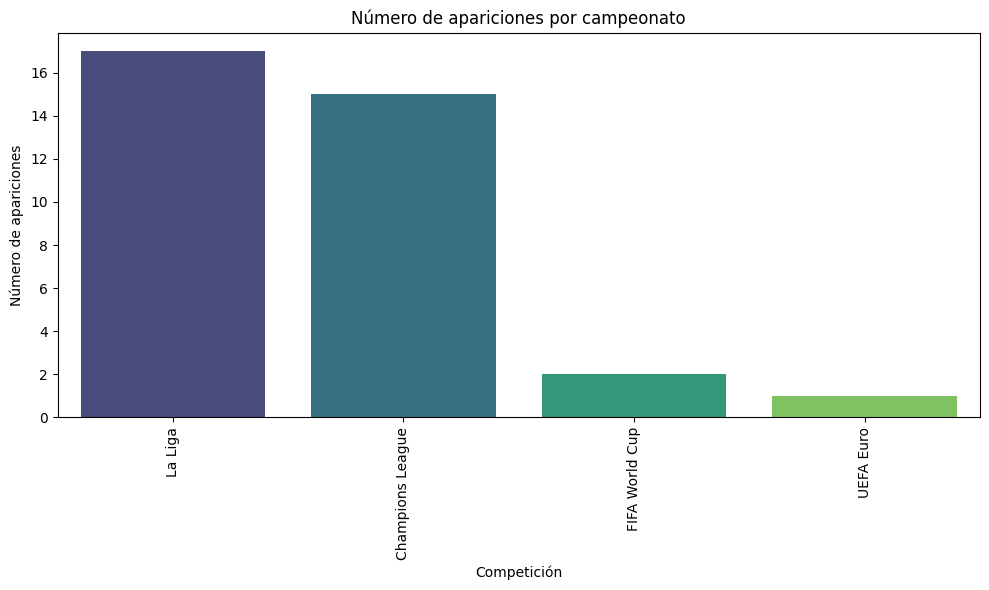

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordena el DataFrame por 'numero_de_apariciones' en orden descendente
grafico_competiciones = resumen_competiciones.sort_values('apariciones', ascending=False)

# Crea un gráfico de barras con colores personalizados
plt.figure(figsize=(10,6))  # Ajusta el tamaño del gráfico
sns.barplot(x=grafico_competiciones['competicion_nombre'],
            y=grafico_competiciones['apariciones'],
            palette="viridis") # utiliza una paleta de colores de seaborn

# Añade títulos y etiquetas
plt.title('Número de apariciones por campeonato')
plt.xlabel('Competición')
plt.ylabel('Número de apariciones')

# Rota las etiquetas del eje x para que sean legibles y ajusta el espaciado
plt.xticks(rotation=90)
plt.tight_layout()  # ajusta automáticamente el espaciado en el gráfico para que todo sea visible y tenga un buen aspecto

plt.savefig('resources/grafico.png', dpi=300, bbox_inches='tight')

# Muestra el gráfico
plt.show()

In [182]:
resumen_temporadas = df_competiciones_filtrado.groupby(['id_temporada', 'temporada']).size().reset_index(name='apariciones')
print(resumen_temporadas)

    id_temporada  temporada  apariciones
0              1  2017/2018            2
1              2  2016/2017            2
2              3       2018            1
3              4  2018/2019            2
4             21  2009/2010            2
5             22  2010/2011            2
6             23  2011/2012            2
7             24  2012/2013            2
8             25  2013/2014            2
9             26  2014/2015            2
10            27  2015/2016            2
11            37  2004/2005            2
12            38  2005/2006            1
13            39  2006/2007            2
14            40  2007/2008            1
15            41  2008/2009            2
16            42  2019/2020            1
17            43       2020            1
18            44  2003/2004            1
19            76  1999/2000            1
20            90  2020/2021            1
21           106       2022            1


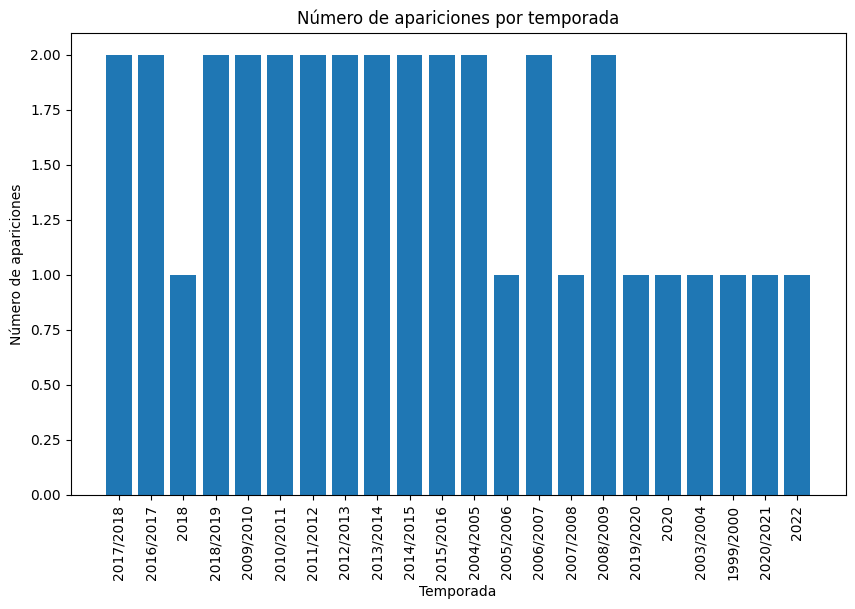

In [183]:
# Ordena el DataFrame por 'numero_de_apariciones' en orden descendente
grafico_temporadas = resumen_temporadas.sort_values('apariciones', ascending=False)

# Crea un gráfico de barras
plt.figure(figsize=(10,6))  # Ajusta el tamaño del gráfico
plt.bar(resumen_temporadas['temporada'], resumen_temporadas['apariciones'])

# Añade títulos y etiquetas
plt.title('Número de apariciones por temporada')
plt.xlabel('Temporada')
plt.ylabel('Número de apariciones')

# Rota las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()

### Calidad de datos

In [184]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores Faltantes', 1 : '% de Valores Totales'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% de Valores Totales', ascending=False).round(1)
        print ("El dataframe tiene " + str(df.shape[1]) + " columnas.\n"
            "Hay " + str(mis_val_table_ren_columns.shape[0]) +
              " columnas que les faltan valores.")
        return mis_val_table_ren_columns

In [185]:
df_competiciones_filtrado.isnull().sum()

competicion_id               0
competicion_nombre           0
id_temporada                 0
temporada                    0
pais                         0
competicion_internacional    0
fecha_subida                 0
fecha_actualizada            0
dtype: int64

In [186]:
missing_values_table(df_competiciones_filtrado)

El dataframe tiene 8 columnas.
Hay 0 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales


In [187]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_competiciones_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
# Drop the columns
df_competiciones_filtrado = df_competiciones_filtrado.drop(list(missing_columns), axis=1)

El dataframe tiene 8 columnas.
Hay 0 columnas que les faltan valores.
Se eliminan 0 columnas.


In [188]:
# TODO:
# VISUALIZAR
# Genero vs competicion
# Competicion vs liga
# - FECHA DE SUBIDA
# - Fecha de actualizacion vs de subida
# Cerrar alcance

CONTINUAR.....

# Partidos

In [189]:
# Find a match id required using statsbomb API
#clasico = 3773497
#clasico_events = sb.events(match_id=clasico)
#df_clasico = pd.DataFrame(clasico_events)
#df_clasico
# Get Matches from La Liga 2021
#matches = sb.matches (competition_id=11, season_id=90)
#matches.to_csv( 'matches.csv', index=False)
#df_matches = pd.DataFrame(matches)
#df_matches

In [190]:
partidos = [pd.read_json(file,convert_dates=['match_date','last_updated']) for file in ruta_partidos]
df_partidos = pd.concat(partidos,sort=False)
df_partidos.reset_index(drop=True,inplace=True)
print('Numero de partidos almacenados en el dataset de Statsbomb:',len(df_partidos))

Numero de partidos almacenados en el dataset de Statsbomb: 1311


In [191]:
df_partidos

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,metadata,match_week,competition_stage,stadium,referee
0,3827767,2022-03-20,16:00:00.000,"{'competition_id': 1238, 'country_name': 'Indi...","{'season_id': 108, 'season_name': '2021/2022'}","{'home_team_id': 7289, 'home_team_name': 'Hyde...","{'away_team_id': 7283, 'away_team_name': 'Kera...",1,1,available,unscheduled,2022-04-14 17:33:06.627987,NaN,"{'data_version': '1.1.0', 'shot_fidelity_versi...",25,"{'id': 74, 'name': 'Championship - Final'}","{'id': 1000400, 'name': 'Pandit Jawaharlal Neh...","{'id': 1004906, 'name': 'Crystal John', 'count..."
1,3827335,2022-03-15,16:00:00.000,"{'competition_id': 1238, 'country_name': 'Indi...","{'season_id': 108, 'season_name': '2021/2022'}","{'home_team_id': 7283, 'home_team_name': 'Kera...","{'away_team_id': 2021, 'away_team_name': 'Jams...",1,1,available,unscheduled,2022-05-17 22:00:48.247246,NaN,"{'data_version': '1.1.0', 'shot_fidelity_versi...",24,"{'id': 158, 'name': 'Play-offs - Semi-Finals'}","{'id': 1000401, 'name': 'Tilak Maidan Stadium'...","{'id': 1004863, 'name': 'Harish Kundu', 'count..."
2,3827336,2022-03-16,16:00:00.000,"{'competition_id': 1238, 'country_name': 'Indi...","{'season_id': 108, 'season_name': '2021/2022'}","{'home_team_id': 7282, 'home_team_name': 'ATK ...","{'away_team_id': 7289, 'away_team_name': 'Hyde...",1,0,available,unscheduled,2022-04-14 17:24:50.569810,NaN,"{'data_version': '1.1.0', 'shot_fidelity_versi...",24,"{'id': 158, 'name': 'Play-offs - Semi-Finals'}","{'id': 5810, 'name': 'GMC Athletic Stadium', '...","{'id': 1004922, 'name': 'Ramachandran Venkates..."
3,3827338,2022-03-12,16:00:00.000,"{'competition_id': 1238, 'country_name': 'Indi...","{'season_id': 108, 'season_name': '2021/2022'}","{'home_team_id': 7289, 'home_team_name': 'Hyde...","{'away_team_id': 7282, 'away_team_name': 'ATK ...",3,1,available,unscheduled,2022-12-01 19:56:17.158053,NaN,"{'data_version': '1.1.0', 'shot_fidelity_versi...",23,"{'id': 158, 'name': 'Play-offs - Semi-Finals'}","{'id': 5810, 'name': 'GMC Athletic Stadium', '...","{'id': 1004912, 'name': 'Raul Gupta', 'country..."
4,3827337,2022-03-11,16:00:00.000,"{'competition_id': 1238, 'country_name': 'Indi...","{'season_id': 108, 'season_name': '2021/2022'}","{'home_team_id': 2021, 'home_team_name': 'Jams...","{'away_team_id': 7283, 'away_team_name': 'Kera...",0,1,available,unscheduled,2022-04-14 17:12:45.886818,NaN,"{'data_version': '1.1.0', 'shot_fidelity_versi...",23,"{'id': 158, 'name': 'Play-offs - Semi-Finals'}","{'id': 1000400, 'name': 'Pandit Jawaharlal Neh...","{'id': 1005422, 'name': 'Tejas Nagvenkar', 'co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,3749108,2003-08-27,20:45:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 1, 'home_team_name': 'Arsenal...","{'away_team_id': 59, 'away_team_name': 'Aston ...",2,0,available,processing,2023-01-28 22:32:37.443603,2021-06-12T16:17:31.694,"{'data_version': '1.1.0', 'shot_fidelity_versi...",3,"{'id': 1, 'name': 'Regular Season'}",NaN,NaN
1307,3749153,2004-01-10,16:00:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 1, 'home_team_name': 'Arsenal...","{'away_team_id': 47, 'away_team_name': 'Middle...",4,1,available,scheduled,2020-08-30 08:12:14.579037,2021-06-13T16:17:31.694,"{'data_version': '1.1.0', 'shot_fidelity_versi...",21,"{'id': 1, 'name': 'Regular Season'}","{'id': 1000243, 'name': 'Highbury Stadium', 'c...",NaN
1308,3749403,2004-03-20,16:00:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 1, 'home_team_name': 'Arsenal...","{'away_team_id': 328, 'away_team_name': 'Bolto...",2,1,available,scheduled,2020-07-29 05:00:00.000000,2021-06-13T16:17:31.694,"{'da

Observamos que la información sobre la competición, la temporada, la jornada, los equipos, el estadio y el arbitro está en diccionarios.
Además, hay información sobre los partidos 360 y metadatos que no nos interesa, por lo que se elimina.

In [192]:
pd.set_option('display.max_info_columns', df_partidos.shape[1])
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   match_id           1311 non-null   int64         
 1   match_date         1311 non-null   datetime64[ns]
 2   kick_off           1309 non-null   object        
 3   competition        1311 non-null   object        
 4   season             1311 non-null   object        
 5   home_team          1311 non-null   object        
 6   away_team          1311 non-null   object        
 7   home_score         1311 non-null   int64         
 8   away_score         1311 non-null   int64         
 9   match_status       1311 non-null   object        
 10  match_status_360   1311 non-null   object        
 11  last_updated       1311 non-null   datetime64[ns]
 12  last_updated_360   1196 non-null   object        
 13  metadata           1311 non-null   object        
 14  match_we

In [193]:
df_partidos_filtrado = df_partidos.copy()
df_partidos_filtrado = df_partidos_filtrado.drop(['match_status_360', 'last_updated_360', 'metadata'], axis=1)
df_partidos_filtrado

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,match_week,competition_stage,stadium,referee
0,3827767,2022-03-20,16:00:00.000,"{'competition_id': 1238, 'country_name': 'Indi...","{'season_id': 108, 'season_name': '2021/2022'}","{'home_team_id': 7289, 'home_team_name': 'Hyde...","{'away_team_id': 7283, 'away_team_name': 'Kera...",1,1,available,2022-04-14 17:33:06.627987,25,"{'id': 74, 'name': 'Championship - Final'}","{'id': 1000400, 'name': 'Pandit Jawaharlal Neh...","{'id': 1004906, 'name': 'Crystal John', 'count..."
1,3827335,2022-03-15,16:00:00.000,"{'competition_id': 1238, 'country_name': 'Indi...","{'season_id': 108, 'season_name': '2021/2022'}","{'home_team_id': 7283, 'home_team_name': 'Kera...","{'away_team_id': 2021, 'away_team_name': 'Jams...",1,1,available,2022-05-17 22:00:48.247246,24,"{'id': 158, 'name': 'Play-offs - Semi-Finals'}","{'id': 1000401, 'name': 'Tilak Maidan Stadium'...","{'id': 1004863, 'name': 'Harish Kundu', 'count..."
2,3827336,2022-03-16,16:00:00.000,"{'competition_id': 1238, 'country_name': 'Indi...","{'season_id': 108, 'season_name': '2021/2022'}","{'home_team_id': 7282, 'home_team_name': 'ATK ...","{'away_team_id': 7289, 'away_team_name': 'Hyde...",1,0,available,2022-04-14 17:24:50.569810,24,"{'id': 158, 'name': 'Play-offs - Semi-Finals'}","{'id': 5810, 'name': 'GMC Athletic Stadium', '...","{'id': 1004922, 'name': 'Ramachandran Venkates..."
3,3827338,2022-03-12,16:00:00.000,"{'competition_id': 1238, 'country_name': 'Indi...","{'season_id': 108, 'season_name': '2021/2022'}","{'home_team_id': 7289, 'home_team_name': 'Hyde...","{'away_team_id': 7282, 'away_team_name': 'ATK ...",3,1,available,2022-12-01 19:56:17.158053,23,"{'id': 158, 'name': 'Play-offs - Semi-Finals'}","{'id': 5810, 'name': 'GMC Athletic Stadium', '...","{'id': 1004912, 'name': 'Raul Gupta', 'country..."
4,3827337,2022-03-11,16:00:00.000,"{'competition_id': 1238, 'country_name': 'Indi...","{'season_id': 108, 'season_name': '2021/2022'}","{'home_team_id': 2021, 'home_team_name': 'Jams...","{'away_team_id': 7283, 'away_team_name': 'Kera...",0,1,available,2022-04-14 17:12:45.886818,23,"{'id': 158, 'name': 'Play-offs - Semi-Finals'}","{'id': 1000400, 'name': 'Pandit Jawaharlal Neh...","{'id': 1005422, 'name': 'Tejas Nagvenkar', 'co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,3749108,2003-08-27,20:45:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 1, 'home_team_name': 'Arsenal...","{'away_team_id': 59, 'away_team_name': 'Aston ...",2,0,available,2023-01-28 22:32:37.443603,3,"{'id': 1, 'name': 'Regular Season'}",NaN,NaN
1307,3749153,2004-01-10,16:00:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 1, 'home_team_name': 'Arsenal...","{'away_team_id': 47, 'away_team_name': 'Middle...",4,1,available,2020-08-30 08:12:14.579037,21,"{'id': 1, 'name': 'Regular Season'}","{'id': 1000243, 'name': 'Highbury Stadium', 'c...",NaN
1308,3749403,2004-03-20,16:00:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 1, 'home_team_name': 'Arsenal...","{'away_team_id': 328, 'away_team_name': 'Bolto...",2,1,available,2020-07-29 05:00:00.000000,29,"{'id': 1, 'name': 'Regular Season'}","{'id': 1000243, 'name': 'Highbury Stadium', 'c...",NaN
1309,3749526,2003-10-26,15:00:00.000,"{'competition_id': 2, 'country_name': 'England...","{'season_id': 44, 'season_name': '2003/2004'}","{'home_team_id': 75, 'home_team_name': 'Charlt...","{'away_team_id': 1, 'away_team_name': 'Arsenal...",1,1,available,2020-07-29 05:00:00.000000,1,"{'id': 1, 'name': 'Regular Season'}","{'id': 31, 'name': 'The Valley', 'country': {'...",NaN


In [194]:
# separamos los diccionarios del dataframe en columnas
def split_dictionary(df,col):
    # TODO: ver
    # handle missings by filling with an empty dictionary
    df[col] = df[col].apply(lambda x: {} if pd.isna(x) else x)
    # split the non missings and change column names
    df_temp_cols = pd.io.json.json_normalize(df[col]).set_index(df.index)
    col_names = df_temp_cols.columns
    # note add column description to column name if doesn't already contain it
    col_names = [(c).replace('.','_') if c[:len(col)]==col else (col+'_'+c).replace('.','_') for c in col_names]
    df[col_names] = df_temp_cols
    # elimina la antigua columna
    df.drop(col,axis=1,inplace=True)
    return df

In [195]:
# bucle que permite separar las columnas diccionarios en columnas del dataframe
columnas_diccionarios = ['competition', 'season', 'home_team', 'away_team', 'competition_stage', 'stadium', 'referee']
for col in columnas_diccionarios:
    df_partidos_filtrado = split_dictionary(df_partidos_filtrado,col)
df_partidos_filtrado

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_9494/2699924206.py:7: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_9494/2699924206.py:7: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_9494/2699924206.py:7: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_9494/2699924206.py:7: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_9494/2699924206.py:7: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_9494/2699924206.py:7: FutureWarning:

pandas.io.jso

,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition_id,competition_country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_managers,home_team_country_id,home_team_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_managers,away_team_country_id,away_team_country_name,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3827767,2022-03-20,16:00:00.000,1,1,available,2022-04-14 17:33:06.627987,25,1238,India,Indian Super league,108,2021/2022,7289,Hyderabad,male,None,"[{'id': 503, 'name': 'Manuel Márquez Roca', 'n...",105,India,7283,Kerala Blasters,male,None,"[{'id': 1000614, 'name': 'Ivan Vukomanović', '...",105,India,74,Championship - Final,1000400.0,Pandit Jawaharlal Nehru Stadium,105.0,India,1004906.0,Crystal John,105.0,India
1,3827335,2022-03-15,16:00:00.000,1,1,available,2022-05-17 22:00:48.247246,24,1238,India,Indian Super league,108,2021/2022,7283,Kerala Blasters,male,None,"[{'id': 1000614, 'name': 'Ivan Vukomanović', '...",105,India,2021,Jamshedpur,male,None,"[{'id': 1000617, 'name': 'Owen Columba Coyle',...",105,India,158,Play-offs - Semi-Finals,1000401.0,Tilak Maidan Stadium,105.0,India,1004863.0,Harish Kundu,105.0,India
2,3827336,2022-03-16,16:00:00.000,1,0,available,2022-04-14 17:24:50.569810,24,1238,India,Indian Super league,108,2021/2022,7282,ATK Mohun Bagan,male,None,"[{'id': 2815, 'name': 'Juan Ferrando Fenol', '...",105,India,7289,Hyderabad,male,None,"[{'id': 503, 'name': 'Manuel Márquez Roca', 'n...",105,India,158,Play-offs - Semi-Finals,5810.0,GMC Athletic Stadium,105.0,India,1004922.0,Ramachandran Venkatesh,105.0,India
3,3827338,2022-03-12,16:00:00.000,3,1,available,2022-12-01 19:56:17.158053,23,1238,India,Indian Super league,108,2021/2022,7289,Hyderabad,male,None,"[{'id': 503, 'name': 'Manuel Márquez Roca', 'n...",105,India,7282,ATK Mohun Bagan,male,None,"[{'id': 2815, 'name': 'Juan Ferrando Fenol', '...",105,India,158,Play-offs - Semi-Finals,5810.0,GMC Athletic Stadium,105.0,India,1004912.0,Raul Gupta,105.0,India
4,3827337,2022-03-11,16:00:00.000,0,1,available,2022-04-14 17:12:45.886818,23,1238,India,Indian Super league,108,2021/2022,2021,Jamshedpur,male,None,"[{'id': 1000617, 'name': 'Owen Columba Coyle',...",105,India,7283,Kerala Blasters,male,None,"[{'id': 1000614, 'name': 'Ivan Vukomanović', '...",105,India,158,Play-offs - Semi-Finals,1000400.0,Pandit Jawaharlal Nehru Stadium,105.0,India,1005422.0,Tejas Nagvenkar,105.0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,3749108,2003-08-27,20:45:00.000,2,0,available,2023-01-28 22:32:37.443603,3,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,"[{'id': 577, 'name': 'Arsène Wenger', 'nicknam...",68,England,59,Aston Villa,male,None,"[{'id': 6094, 'name': 'David O''Leary', 'nickn...",68,England,1,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,3749153,2004-01-10,16:00:00.000,4,1,available,2020-08-30 08:12:14.579037,21,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,"[{'id': 577, 'name': 'Arsène Wenger', 'nicknam...",68,England,47,Middlesbrough,male,None,"[{'id': 40, 'name': 'Steve McClaren', 'nicknam...",68,England,1,Regular Season,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN
1308,3749403,2004-03-20,16:00:00.000,2,1,available,2020-07-29 05:00:00.000000,29,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,"[{'id': 577, 'name': 'Arsène Wenger', 'nicknam...",68,England,328,Bolton Wanderers,male,None,"[{'id': 561, 'name': 'Sam Allardyce', 'nicknam...",68,England,1,Regular Season,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN
1309,3749526,2003-10-26,15:00:00.000,1,1,available,2020-07-29 05:00:00.000000,1,2,England,Premier League,44,2003/2004,

In [196]:
# Refactorizamos los datos resultantes:
# kickoff a datetime - date + kickoff time
df_partidos_filtrado['kick_off'] = pd.to_datetime(df_partidos_filtrado.match_date.astype(str) +' '+ df_partidos_filtrado.kick_off)
# no es necesario 2 columnas de genero ya que son iguales siempre
# match status ssolo tiene 1 valor por lo que se elimina
df_partidos_filtrado.drop(['away_team_gender','match_status'],axis=1,inplace=True)
df_partidos_filtrado.rename({'home_team_gender':'competicion_genero'},axis=1,inplace=True)

In [197]:
# manager is a list (len=1) containing a dictionary so lets split into columns
df_partidos_filtrado['home_team_managers'] = df_partidos_filtrado.home_team_managers.str[0]
df_partidos_filtrado = split_dictionary(df_partidos_filtrado,'home_team_managers')
df_partidos_filtrado['away_team_managers'] = df_partidos_filtrado.away_team_managers.str[0]
df_partidos_filtrado = split_dictionary(df_partidos_filtrado,'away_team_managers')
df_partidos_filtrado['home_team_managers_dob'] = pd.to_datetime(df_partidos_filtrado['home_team_managers_dob'])
df_partidos_filtrado['away_team_managers_dob'] = pd.to_datetime(df_partidos_filtrado['away_team_managers_dob'])
for col in ['competition_id','season_id','home_team_id','competition_stage_id']:
    df_partidos_filtrado[col] = df_partidos_filtrado[col].astype(np.int64)
# sort and reset indexes
df_partidos_filtrado.sort_values('kick_off',inplace=True)
df_partidos_filtrado.reset_index(inplace=True,drop=True)

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_9494/2699924206.py:7: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_9494/2699924206.py:7: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



In [198]:
df_partidos_filtrado

,match_id,match_date,kick_off,home_score,away_score,last_updated,match_week,competition_id,competition_country_name,competition_name,season_id,season_name,home_team_id,home_team_name,competicion_genero,home_team_group,home_team_country_id,home_team_country_name,away_team_id,away_team_name,away_team_group,away_team_country_id,away_team_country_name,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name
0,3749493,2003-08-16,2003-08-16 16:00:00,2,1,2020-07-29 05:00:00.000000,1,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,29,Everton,None,68,England,1,Regular Season,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN,577.0,Arsène Wenger,None,1949-10-22,78.0,France,86.0,David Moyes,None,1963-04-25,201.0,Scotland
1,3749358,2003-08-24,2003-08-24 17:05:00,0,4,2020-07-29 05:00:00.000000,1,2,England,Premier League,44,2003/2004,47,Middlesbrough,male,None,68,England,1,Arsenal,None,68,England,1,Regular Season,214.0,Riverside Stadium,68.0,England,NaN,NaN,NaN,NaN,40.0,Steve McClaren,None,1961-05-03,68.0,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France
2,3749108,2003-08-27,2003-08-27 20:45:00,2,0,2023-01-28 22:32:37.443603,3,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,59,Aston Villa,None,68,England,1,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577.0,Arsène Wenger,None,1949-10-22,78.0,France,6094.0,David O''Leary,None,1958-05-02,109.0,Ireland
3,3749454,2003-08-31,2003-08-31 17:05:00,1,2,2020-07-29 05:00:00.000000,1,2,England,Premier League,44,2003/2004,36,Manchester City,male,None,68,England,1,Arsenal,None,68,England,1,Regular Season,4715.0,Etihad Stadium,68.0,England,NaN,NaN,NaN,NaN,4202.0,Kevin Joseph Keegan,Kevin Keegan,1951-02-14,68.0,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France
4,3749296,2003-09-13,2003-09-13 16:00:00,1,1,2020-07-29 05:00:00.000000,5,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,105,Portsmouth,None,68,England,1,Regular Season,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN,577.0,Arsène Wenger,None,1949-10-22,78.0,France,749.0,Harry Redknapp,None,1947-03-02,68.0,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,3869552,2022-12-14,2022-12-14 21:00:00,2,0,2023-03-18 06:06:29.317928,6,43,International,FIFA World Cup,106,2022,771,France,male,None,78,France,788,Morocco,None,154,Morocco,15,Semi-finals,1001113.0,Al Bayt Stadium,185.0,Qatar,740.0,César Arturo Ramos Palazuelos,147.0,Mexico,545.0,Didier Deschamps,None,1968-10-15,78.0,France,1001086.0,Hoalid Regragui,None,1975-09-23,154.0,Morocco
1307,3869684,2022-12-17,2022-12-17 17:00:00,2,1,2023-02-20 08:56:30.908564,7,43,International,FIFA World Cup,106,2022,785,Croatia,male,None,56,Croatia,788,Morocco,None,154,Morocco,25,3rd Place Final,1000253.0,Sheikh Khalifa International Stadium,185.0,Qatar,2521.0,Abdulrahman Ibrahim Al Jassim,185.0,Qatar,307.0,Zlatko Dalić,None,1966-10-26,56.0,Croatia,1001086.0,Hoalid Regragui,None,1975-09-23,154.0,Morocco
1308,3869685,2022-12-18,2022-12-18 17:00:00,3,3,2023-02-20 07:27:19.374380,7,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,771,France,None,78,France,26,Final,1001114.0,Lusail Stadium,185.0,Qatar,367.0,Szymon Marciniak,182.0,Poland,5677.0,Lionel Sebastián Scaloni,None,1978-05-16,11.0,Argentina,545.0,Didier Deschamps,None,1968-10-15,78.0,France
1309,2302764,2005-05-25,NaT,3,3,2021-04-01 06:18:57.459032,1,16,Europe,Champions League,37,20

In [199]:
pd.set_option('display.max_info_columns', df_partidos_filtrado.shape[1])
df_partidos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         1311 non-null   int64         
 1   match_date                       1311 non-null   datetime64[ns]
 2   kick_off                         1309 non-null   datetime64[ns]
 3   home_score                       1311 non-null   int64         
 4   away_score                       1311 non-null   int64         
 5   last_updated                     1311 non-null   datetime64[ns]
 6   match_week                       1311 non-null   int64         
 7   competition_id                   1311 non-null   int64         
 8   competition_country_name         1311 non-null   object        
 9   competition_name                 1311 non-null   object        
 10  season_id                        1311 non-null   int64      

#### Analizar columnas

In [200]:
df_partidos_filtrado.apply(lambda x: x.nunique())

match_id                           1311
match_date                          895
kick_off                           1179
home_score                           12
away_score                           10
last_updated                        692
match_week                           39
competition_id                       10
competition_country_name              6
competition_name                     10
season_id                            23
season_name                          23
home_team_id                        182
home_team_name                      180
competicion_genero                    2
home_team_group                      16
home_team_country_id                 60
home_team_country_name               60
away_team_id                        178
away_team_name                      176
away_team_group                      16
away_team_country_id                 59
away_team_country_name               59
competition_stage_id                  9
competition_stage_name                9


In [201]:
df_partidos_filtrado

,match_id,match_date,kick_off,home_score,away_score,last_updated,match_week,competition_id,competition_country_name,competition_name,season_id,season_name,home_team_id,home_team_name,competicion_genero,home_team_group,home_team_country_id,home_team_country_name,away_team_id,away_team_name,away_team_group,away_team_country_id,away_team_country_name,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name
0,3749493,2003-08-16,2003-08-16 16:00:00,2,1,2020-07-29 05:00:00.000000,1,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,29,Everton,None,68,England,1,Regular Season,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN,577.0,Arsène Wenger,None,1949-10-22,78.0,France,86.0,David Moyes,None,1963-04-25,201.0,Scotland
1,3749358,2003-08-24,2003-08-24 17:05:00,0,4,2020-07-29 05:00:00.000000,1,2,England,Premier League,44,2003/2004,47,Middlesbrough,male,None,68,England,1,Arsenal,None,68,England,1,Regular Season,214.0,Riverside Stadium,68.0,England,NaN,NaN,NaN,NaN,40.0,Steve McClaren,None,1961-05-03,68.0,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France
2,3749108,2003-08-27,2003-08-27 20:45:00,2,0,2023-01-28 22:32:37.443603,3,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,59,Aston Villa,None,68,England,1,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577.0,Arsène Wenger,None,1949-10-22,78.0,France,6094.0,David O''Leary,None,1958-05-02,109.0,Ireland
3,3749454,2003-08-31,2003-08-31 17:05:00,1,2,2020-07-29 05:00:00.000000,1,2,England,Premier League,44,2003/2004,36,Manchester City,male,None,68,England,1,Arsenal,None,68,England,1,Regular Season,4715.0,Etihad Stadium,68.0,England,NaN,NaN,NaN,NaN,4202.0,Kevin Joseph Keegan,Kevin Keegan,1951-02-14,68.0,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France
4,3749296,2003-09-13,2003-09-13 16:00:00,1,1,2020-07-29 05:00:00.000000,5,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,105,Portsmouth,None,68,England,1,Regular Season,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN,577.0,Arsène Wenger,None,1949-10-22,78.0,France,749.0,Harry Redknapp,None,1947-03-02,68.0,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,3869552,2022-12-14,2022-12-14 21:00:00,2,0,2023-03-18 06:06:29.317928,6,43,International,FIFA World Cup,106,2022,771,France,male,None,78,France,788,Morocco,None,154,Morocco,15,Semi-finals,1001113.0,Al Bayt Stadium,185.0,Qatar,740.0,César Arturo Ramos Palazuelos,147.0,Mexico,545.0,Didier Deschamps,None,1968-10-15,78.0,France,1001086.0,Hoalid Regragui,None,1975-09-23,154.0,Morocco
1307,3869684,2022-12-17,2022-12-17 17:00:00,2,1,2023-02-20 08:56:30.908564,7,43,International,FIFA World Cup,106,2022,785,Croatia,male,None,56,Croatia,788,Morocco,None,154,Morocco,25,3rd Place Final,1000253.0,Sheikh Khalifa International Stadium,185.0,Qatar,2521.0,Abdulrahman Ibrahim Al Jassim,185.0,Qatar,307.0,Zlatko Dalić,None,1966-10-26,56.0,Croatia,1001086.0,Hoalid Regragui,None,1975-09-23,154.0,Morocco
1308,3869685,2022-12-18,2022-12-18 17:00:00,3,3,2023-02-20 07:27:19.374380,7,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,771,France,None,78,France,26,Final,1001114.0,Lusail Stadium,185.0,Qatar,367.0,Szymon Marciniak,182.0,Poland,5677.0,Lionel Sebastián Scaloni,None,1978-05-16,11.0,Argentina,545.0,Didier Deschamps,None,1968-10-15,78.0,France
1309,2302764,2005-05-25,NaT,3,3,2021-04-01 06:18:57.459032,1,16,Europe,Champions League,37,20

In [202]:
df_partidos_filtrado= df_partidos_filtrado.rename(columns={'match_id': 'partido_id','match_date': 'partido_fecha', 'kick_off': 'partido_inicio','home_score': 'resultado_local','away_score': 'resultado_visitante', 'last_updated': 'ultima_actualizacion', 'match_week': 'jornada', 'competition_id': 'competicion_id', 'competition_country_name': 'competicion_pais', 'competition_name': 'competicion_nombre', 'season_id': 'temporada_id', 'season_name': 'temporada_nombre', 'home_team_id': 'equipo_local_id', 'home_team_name': 'equipo_local_nombre', 'home_team_group': 'equipo_local_group', 'home_team_country_id': 'equipo_local_pais_id', 'home_team_country_name': 'equipo_local_pais_nombre', 'away_team_id': 'equipo_visitante_id', 'away_team_name': 'equipo_visitante_nombre', 'away_team_group': 'equipo_visitante_grupo', 'away_team_country_id': 'equipo_visitante_pais_id', 'away_team_country_name': 'equipo_visitante_pais_nombre', 'competition_stage_id': 'competicion_fase_id', 'competition_stage_name': 'competicion_fase_nombre', 'stadium_id': 'estadio_id', 'stadium_name': 'estadio_nombre', 'stadium_country_id': 'estadio_pais_id', 'stadium_country_name': 'estadio_pais_nombre', 'referee_id': 'arbitro_id' ,'referee_name': 'arbitro_nombre', 'referee_country_id': 'arbitro_pais_id', 'referee_country_name': 'arbitro_pais_nombre', 'home_team_managers_id': 'entrenador_local_id', 'home_team_managers_name': 'entrenador_local_nombre', 'home_team_managers_nickname': 'entrenador_local_apodo', 'home_team_managers_dob': 'entrenador_local_nacimiento', 'home_team_managers_country_id': 'entrenador_local_pais_id', 'home_team_managers_country_name': 'entrenador_local_pais_nombre', 'away_team_managers_id': 'entrenador_visitante_id', 'away_team_managers_name': 'entrenador_visitante_nombre', 'away_team_managers_nickname': 'entrenador_visitante_apodo', 'away_team_managers_dob': 'entrenador_visitante_nacimiento', 'away_team_managers_country_id': 'entrenador_visitante_pais_id', 'away_team_managers_country_name': 'entrenador_visitante_pais_nombre' })

In [203]:
df_partidos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   partido_id                        1311 non-null   int64         
 1   partido_fecha                     1311 non-null   datetime64[ns]
 2   partido_inicio                    1309 non-null   datetime64[ns]
 3   resultado_local                   1311 non-null   int64         
 4   resultado_visitante               1311 non-null   int64         
 5   ultima_actualizacion              1311 non-null   datetime64[ns]
 6   jornada                           1311 non-null   int64         
 7   competicion_id                    1311 non-null   int64         
 8   competicion_pais                  1311 non-null   object        
 9   competicion_nombre                1311 non-null   object        
 10  temporada_id                      1311 non-null 

In [204]:
df_partidos_filtrado = df_partidos_filtrado.reindex(columns=['partido_id', 'competicion_id', 'competicion_genero', 'competicion_nombre', 'competicion_pais','competicion_fase_id', 'competicion_fase_nombre', 'temporada_id', 'temporada_nombre', 'jornada',  'resultado_local', 'resultado_visitante','equipo_local_id', 'equipo_local_nombre', 'equipo_local_group', 'equipo_local_pais_id', 'equipo_local_pais_nombre', 'entrenador_local_id', 'entrenador_local_nombre', 'entrenador_local_apodo', 'entrenador_local_nacimiento', 'entrenador_local_pais_id', 'entrenador_local_pais_nombre','equipo_visitante_id', 'equipo_visitante_nombre', 'equipo_visitante_grupo', 'equipo_visitante_pais_id', 'equipo_visitante_pais_nombre', 'entrenador_visitante_id', 'entrenador_visitante_nombre', 'entrenador_visitante_apodo', 'entrenador_visitante_nacimiento', 'entrenador_visitante_pais_id', 'entrenador_visitante_pais_nombre', 'estadio_id', 'estadio_nombre',  'estadio_pais_id', 'estadio_pais_nombre', 'arbitro_id', 'arbitro_nombre', 'arbitro_pais_id', 'arbitro_pais_nombre'    ,'partido_fecha', 'partido_inicio', 'ultima_actualizacion'])
df_partidos_filtrado

,partido_id,competicion_id,competicion_genero,competicion_nombre,competicion_pais,competicion_fase_id,competicion_fase_nombre,temporada_id,temporada_nombre,jornada,resultado_local,resultado_visitante,equipo_local_id,equipo_local_nombre,equipo_local_group,equipo_local_pais_id,equipo_local_pais_nombre,entrenador_local_id,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_nacimiento,entrenador_local_pais_id,entrenador_local_pais_nombre,equipo_visitante_id,equipo_visitante_nombre,equipo_visitante_grupo,equipo_visitante_pais_id,equipo_visitante_pais_nombre,entrenador_visitante_id,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_nacimiento,entrenador_visitante_pais_id,entrenador_visitante_pais_nombre,estadio_id,estadio_nombre,estadio_pais_id,estadio_pais_nombre,arbitro_id,arbitro_nombre,arbitro_pais_id,arbitro_pais_nombre,partido_fecha,partido_inicio,ultima_actualizacion
0,3749493,2,male,Premier League,England,1,Regular Season,44,2003/2004,1,2,1,1,Arsenal,None,68,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France,29,Everton,None,68,England,86.0,David Moyes,None,1963-04-25,201.0,Scotland,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN,2003-08-16,2003-08-16 16:00:00,2020-07-29 05:00:00.000000
1,3749358,2,male,Premier League,England,1,Regular Season,44,2003/2004,1,0,4,47,Middlesbrough,None,68,England,40.0,Steve McClaren,None,1961-05-03,68.0,England,1,Arsenal,None,68,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France,214.0,Riverside Stadium,68.0,England,NaN,NaN,NaN,NaN,2003-08-24,2003-08-24 17:05:00,2020-07-29 05:00:00.000000
2,3749108,2,male,Premier League,England,1,Regular Season,44,2003/2004,3,2,0,1,Arsenal,None,68,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France,59,Aston Villa,None,68,England,6094.0,David O''Leary,None,1958-05-02,109.0,Ireland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-08-27,2003-08-27 20:45:00,2023-01-28 22:32:37.443603
3,3749454,2,male,Premier League,England,1,Regular Season,44,2003/2004,1,1,2,36,Manchester City,None,68,England,4202.0,Kevin Joseph Keegan,Kevin Keegan,1951-02-14,68.0,England,1,Arsenal,None,68,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France,4715.0,Etihad Stadium,68.0,England,NaN,NaN,NaN,NaN,2003-08-31,2003-08-31 17:05:00,2020-07-29 05:00:00.000000
4,3749296,2,male,Premier League,England,1,Regular Season,44,2003/2004,5,1,1,1,Arsenal,None,68,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France,105,Portsmouth,None,68,England,749.0,Harry Redknapp,None,1947-03-02,68.0,England,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN,2003-09-13,2003-09-13 16:00:00,2020-07-29 05:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,3869552,43,male,FIFA World Cup,International,15,Semi-finals,106,2022,6,2,0,771,France,None,78,France,545.0,Didier Deschamps,None,1968-10-15,78.0,France,788,Morocco,None,154,Morocco,1001086.0,Hoalid Regragui,None,1975-09-23,154.0,Morocco,1001113.0,Al Bayt Stadium,185.0,Qatar,740.0,César Arturo Ramos Palazuelos,147.0,Mexico,2022-12-14,2022-12-14 21:00:00,2023-03-18 06:06:29.317928
1307,3869684,43,male,FIFA World Cup,International,25,3rd Place Final,106,2022,7,2,1,785,Croatia,None,56,Croatia,307.0,Zlatko Dalić,None,1966-10-26,56.0,Croatia,788,Morocco,None,154,Morocco,1001086.0,Hoalid Regragui,None,1975-09-23,154.0,Morocco,1000253.0,Sheikh Khalifa International Stadium,185.0,Qatar,2521.0,Abdulrahman Ibrahim Al Jassim,185.0,Qatar,2022-12-17,2022-12-17 17:00:00,2023-02-20 08:56:30.908564
1308,3869685,43,male,FIFA World Cup,International,26,Final,106,2022,7,3,3,779,Argentina,None,11,Argentina,5677.0,Lionel Sebastián Scaloni,None,1978-05-16,11.0,Argentina,771,France,None,78,France,545.0,Didier Deschamps,None,1968-10-15,78.0,France,1001114.0,Lusail Stadium,185.0,Qatar,367.0,Szymon Marciniak,182.0,Poland,2022-12-18,2022-12-18 17:00:00,2023-02-20 07:27:19.374380
1309,2302764,16

In [205]:
print(f"Observamos que hay {len(df_partidos_filtrado)} partidos. De los cuales {len(df_partidos_filtrado.competicion_genero=='female')} son de fútbol masculino.")

Observamos que hay 1311 partidos. De los cuales 1311 son de fútbol masculino.


In [206]:
# se eliminan los partidos de futbol femenino
df_partidos_filtrado.competicion_genero.value_counts()
# Filtrar las filas donde genero_competicion es 'female'
df_partidos_filtrado = df_partidos_filtrado[df_partidos_filtrado['competicion_genero'] != 'female']
df_partidos_filtrado.competicion_genero.value_counts()

# Eliminar la columna genero_competicion
df_partidos_filtrado = df_partidos_filtrado.drop(columns=['competicion_genero'])
df_partidos_filtrado

,partido_id,competicion_id,competicion_nombre,competicion_pais,competicion_fase_id,competicion_fase_nombre,temporada_id,temporada_nombre,jornada,resultado_local,resultado_visitante,equipo_local_id,equipo_local_nombre,equipo_local_group,equipo_local_pais_id,equipo_local_pais_nombre,entrenador_local_id,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_nacimiento,entrenador_local_pais_id,entrenador_local_pais_nombre,equipo_visitante_id,equipo_visitante_nombre,equipo_visitante_grupo,equipo_visitante_pais_id,equipo_visitante_pais_nombre,entrenador_visitante_id,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_nacimiento,entrenador_visitante_pais_id,entrenador_visitante_pais_nombre,estadio_id,estadio_nombre,estadio_pais_id,estadio_pais_nombre,arbitro_id,arbitro_nombre,arbitro_pais_id,arbitro_pais_nombre,partido_fecha,partido_inicio,ultima_actualizacion
0,3749493,2,Premier League,England,1,Regular Season,44,2003/2004,1,2,1,1,Arsenal,None,68,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France,29,Everton,None,68,England,86.0,David Moyes,None,1963-04-25,201.0,Scotland,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN,2003-08-16,2003-08-16 16:00:00,2020-07-29 05:00:00.000000
1,3749358,2,Premier League,England,1,Regular Season,44,2003/2004,1,0,4,47,Middlesbrough,None,68,England,40.0,Steve McClaren,None,1961-05-03,68.0,England,1,Arsenal,None,68,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France,214.0,Riverside Stadium,68.0,England,NaN,NaN,NaN,NaN,2003-08-24,2003-08-24 17:05:00,2020-07-29 05:00:00.000000
2,3749108,2,Premier League,England,1,Regular Season,44,2003/2004,3,2,0,1,Arsenal,None,68,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France,59,Aston Villa,None,68,England,6094.0,David O''Leary,None,1958-05-02,109.0,Ireland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-08-27,2003-08-27 20:45:00,2023-01-28 22:32:37.443603
3,3749454,2,Premier League,England,1,Regular Season,44,2003/2004,1,1,2,36,Manchester City,None,68,England,4202.0,Kevin Joseph Keegan,Kevin Keegan,1951-02-14,68.0,England,1,Arsenal,None,68,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France,4715.0,Etihad Stadium,68.0,England,NaN,NaN,NaN,NaN,2003-08-31,2003-08-31 17:05:00,2020-07-29 05:00:00.000000
4,3749296,2,Premier League,England,1,Regular Season,44,2003/2004,5,1,1,1,Arsenal,None,68,England,577.0,Arsène Wenger,None,1949-10-22,78.0,France,105,Portsmouth,None,68,England,749.0,Harry Redknapp,None,1947-03-02,68.0,England,1000243.0,Highbury Stadium,68.0,England,NaN,NaN,NaN,NaN,2003-09-13,2003-09-13 16:00:00,2020-07-29 05:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,3869552,43,FIFA World Cup,International,15,Semi-finals,106,2022,6,2,0,771,France,None,78,France,545.0,Didier Deschamps,None,1968-10-15,78.0,France,788,Morocco,None,154,Morocco,1001086.0,Hoalid Regragui,None,1975-09-23,154.0,Morocco,1001113.0,Al Bayt Stadium,185.0,Qatar,740.0,César Arturo Ramos Palazuelos,147.0,Mexico,2022-12-14,2022-12-14 21:00:00,2023-03-18 06:06:29.317928
1307,3869684,43,FIFA World Cup,International,25,3rd Place Final,106,2022,7,2,1,785,Croatia,None,56,Croatia,307.0,Zlatko Dalić,None,1966-10-26,56.0,Croatia,788,Morocco,None,154,Morocco,1001086.0,Hoalid Regragui,None,1975-09-23,154.0,Morocco,1000253.0,Sheikh Khalifa International Stadium,185.0,Qatar,2521.0,Abdulrahman Ibrahim Al Jassim,185.0,Qatar,2022-12-17,2022-12-17 17:00:00,2023-02-20 08:56:30.908564
1308,3869685,43,FIFA World Cup,International,26,Final,106,2022,7,3,3,779,Argentina,None,11,Argentina,5677.0,Lionel Sebastián Scaloni,None,1978-05-16,11.0,Argentina,771,France,None,78,France,545.0,Didier Deschamps,None,1968-10-15,78.0,France,1001114.0,Lusail Stadium,185.0,Qatar,367.0,Szymon Marciniak,182.0,Poland,2022-12-18,2022-12-18 17:00:00,2023-02-20 07:27:19.374380
1309,2302764,16,Champions League,Europe,26,Final,37,2004/2005,1,3,3,243,AC Mil

In [207]:
# se eliminan los partidos de ligas que no deseamos
df_partidos_filtrado.competicion_nombre.value_counts()
df_partidos_filtrado = df_partidos_filtrado[df_partidos_filtrado['competicion_nombre'] != 'Indian Super league']
df_partidos_filtrado = df_partidos_filtrado[df_partidos_filtrado['competicion_nombre'] != 'Premier League']
df_partidos_filtrado.competicion_nombre.value_counts()

La Liga             520
FIFA World Cup      128
UEFA Euro            51
Champions League     14
Name: competicion_nombre, dtype: int64

In [208]:
df_partidos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 38 to 1310
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   partido_id                        713 non-null    int64         
 1   competicion_id                    713 non-null    int64         
 2   competicion_nombre                713 non-null    object        
 3   competicion_pais                  713 non-null    object        
 4   competicion_fase_id               713 non-null    int64         
 5   competicion_fase_nombre           713 non-null    object        
 6   temporada_id                      713 non-null    int64         
 7   temporada_nombre                  713 non-null    object        
 8   jornada                           713 non-null    int64         
 9   resultado_local                   713 non-null    int64         
 10  resultado_visitante               713 non-null  

In [209]:
df_partidos_filtrado.competicion_pais.value_counts()

Spain            520
International    128
Europe            65
Name: competicion_pais, dtype: int64

In [210]:
df_partidos_filtrado.competicion_nombre.value_counts()

La Liga             520
FIFA World Cup      128
UEFA Euro            51
Champions League     14
Name: competicion_nombre, dtype: int64

In [211]:
df_partidos_filtrado.competicion_fase_nombre.value_counts()

Regular Season     520
Group Stage        132
Round of 16         24
Final               17
Quarter-finals      12
Semi-finals          6
3rd Place Final      2
Name: competicion_fase_nombre, dtype: int64

In [212]:
df_partidos_filtrado.equipo_local_pais_nombre.value_counts()

Spain                        531
England                       11
France                        11
Croatia                       10
Italy                          9
Belgium                        9
Germany                        7
Netherlands                    7
Portugal                       7
Argentina                      7
Brazil                         7
Sweden                         6
Poland                         5
Denmark                        5
Uruguay                        5
Japan                          5
Korea (South)                  4
Morocco                        4
Russia                         4
Wales                          4
Switzerland                    4
Tunisia                        3
Iran, Islamic Republic of      3
Serbia                         3
Ukraine                        3
Colombia                       2
Cameroon                       2
Qatar                          2
Czech Republic                 2
Finland                        2
Hungary   

In [213]:
df_partidos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 38 to 1310
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   partido_id                        713 non-null    int64         
 1   competicion_id                    713 non-null    int64         
 2   competicion_nombre                713 non-null    object        
 3   competicion_pais                  713 non-null    object        
 4   competicion_fase_id               713 non-null    int64         
 5   competicion_fase_nombre           713 non-null    object        
 6   temporada_id                      713 non-null    int64         
 7   temporada_nombre                  713 non-null    object        
 8   jornada                           713 non-null    int64         
 9   resultado_local                   713 non-null    int64         
 10  resultado_visitante               713 non-null  

In [214]:
resumen_partidos = df_partidos_filtrado.groupby(['competicion_nombre', 'temporada_nombre']).size().reset_index(name='apariciones')
print(resumen_partidos)

   competicion_nombre temporada_nombre  apariciones
0    Champions League        2003/2004            1
1    Champions League        2004/2005            1
2    Champions League        2006/2007            1
3    Champions League        2008/2009            1
4    Champions League        2009/2010            1
5    Champions League        2010/2011            1
6    Champions League        2011/2012            1
7    Champions League        2012/2013            1
8    Champions League        2013/2014            1
9    Champions League        2014/2015            1
10   Champions League        2015/2016            1
11   Champions League        2016/2017            1
12   Champions League        2017/2018            1
13   Champions League        2018/2019            1
14     FIFA World Cup             2018           64
15     FIFA World Cup             2022           64
16            La Liga        2004/2005            7
17            La Liga        2005/2006           17
18          

In [215]:
#resumen_equipos = df_partidos_filtrado.groupby(['competicion_nombre', 'temporada_nombre']).size().reset_index(name='apariciones')
#print(resumen_equipos)

# Cuenta las apariciones como equipo local
apariciones_local = df_partidos_filtrado['equipo_local_nombre'].value_counts()

# Cuenta las apariciones como equipo visitante
apariciones_visitante = df_partidos_filtrado['equipo_visitante_nombre'].value_counts()

# Suma los conteos
apariciones_totales = apariciones_local.add(apariciones_visitante, fill_value=0)

# Convierte a DataFrame y resetea el índice
apariciones_totales = apariciones_totales.reset_index()
apariciones_totales.columns = ['Equipo', 'Apariciones']

apariciones_totales = apariciones_totales.sort_values('Apariciones', ascending=False)

print(apariciones_totales)

                 Equipo  Apariciones
9             Barcelona        523.0
73          Real Madrid         33.0
6       Atlético Madrid         32.0
98             Valencia         29.0
84              Sevilla         29.0
..                  ...          ...
92    Tottenham Hotspur          1.0
39  Gimnàstic Tarragona          1.0
33             FC Porto          1.0
18              Chelsea          1.0
12    Borussia Dortmund          1.0

[102 rows x 2 columns]


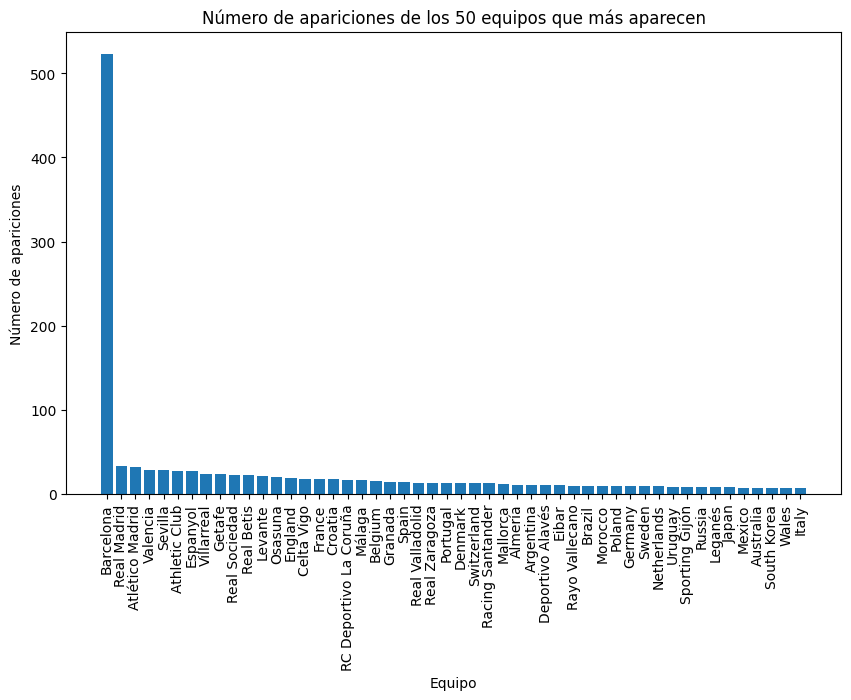

In [216]:
# Selecciona los 50 equipos que más aparecen
top_50_equipos = apariciones_totales.head(50)

# Crea un gráfico de barras
plt.figure(figsize=(10,6))  # Ajusta el tamaño del gráfico
plt.bar(top_50_equipos['Equipo'], top_50_equipos['Apariciones'])

# Añade títulos y etiquetas
plt.title('Número de apariciones de los 50 equipos que más aparecen')
plt.xlabel('Equipo')
plt.ylabel('Número de apariciones')

# Rota las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()

In [217]:
df_partidos_filtrado = df_partidos_filtrado.drop(['competicion_fase_id', 'equipo_local_id', 'equipo_local_pais_id', 'entrenador_local_id', 'entrenador_local_pais_id', 'equipo_visitante_id', 'equipo_visitante_pais_id', 'entrenador_visitante_id', 'entrenador_visitante_pais_id', 'estadio_pais_id', 'arbitro_pais_id'], axis=1)
df_partidos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 38 to 1310
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   partido_id                        713 non-null    int64         
 1   competicion_id                    713 non-null    int64         
 2   competicion_nombre                713 non-null    object        
 3   competicion_pais                  713 non-null    object        
 4   competicion_fase_nombre           713 non-null    object        
 5   temporada_id                      713 non-null    int64         
 6   temporada_nombre                  713 non-null    object        
 7   jornada                           713 non-null    int64         
 8   resultado_local                   713 non-null    int64         
 9   resultado_visitante               713 non-null    int64         
 10  equipo_local_nombre               713 non-null  

### Calidad de datos


In [218]:
df_partidos_filtrado.isnull().sum()

partido_id                            0
competicion_id                        0
competicion_nombre                    0
competicion_pais                      0
competicion_fase_nombre               0
temporada_id                          0
temporada_nombre                      0
jornada                               0
resultado_local                       0
resultado_visitante                   0
equipo_local_nombre                   0
equipo_local_group                  581
equipo_local_pais_nombre              0
entrenador_local_nombre              44
entrenador_local_apodo              259
entrenador_local_nacimiento          46
entrenador_local_pais_nombre         44
equipo_visitante_nombre               0
equipo_visitante_grupo              581
equipo_visitante_pais_nombre          0
entrenador_visitante_nombre          44
entrenador_visitante_apodo          249
entrenador_visitante_nacimiento      45
entrenador_visitante_pais_nombre     44
estadio_id                            0


In [219]:
missing_values_table(df_partidos_filtrado)

El dataframe tiene 33 columnas.
Hay 14 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales
equipo_local_group,581,81.5
equipo_visitante_grupo,581,81.5
entrenador_local_apodo,259,36.3
entrenador_visitante_apodo,249,34.9
arbitro_id,108,15.1
arbitro_nombre,108,15.1
arbitro_pais_nombre,108,15.1
entrenador_local_nacimiento,46,6.5
entrenador_visitante_nacimiento,45,6.3
entrenador_local_nombre,44,6.2


<AxesSubplot: >

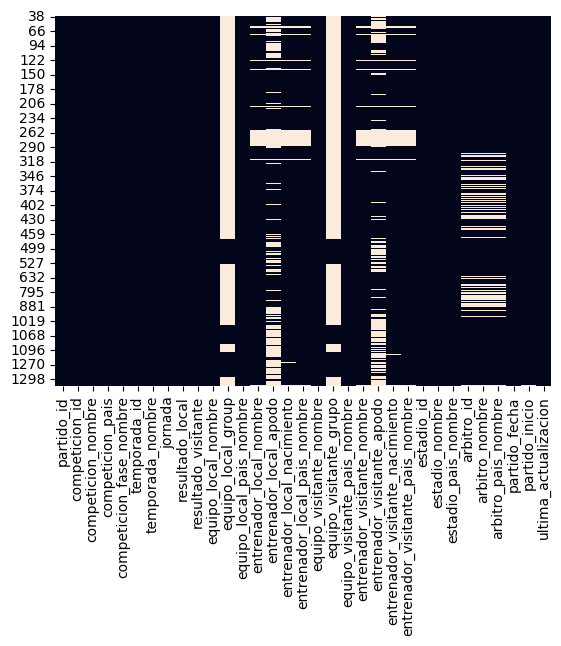

In [220]:
sns.heatmap(df_partidos_filtrado.isnull(), cbar=False)

In [221]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_partidos_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
print(f'Son: {missing_columns}')

# Drop the columns
df_partidos_filtrado = df_partidos_filtrado.drop(list(missing_columns),axis=1)

El dataframe tiene 33 columnas.
Hay 14 columnas que les faltan valores.
Se eliminan 2 columnas.
Son: ['equipo_local_group', 'equipo_visitante_grupo']


In [222]:
df_partidos_filtrado

,partido_id,competicion_id,competicion_nombre,competicion_pais,competicion_fase_nombre,temporada_id,temporada_nombre,jornada,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_nacimiento,entrenador_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_nacimiento,entrenador_visitante_pais_nombre,estadio_id,estadio_nombre,estadio_pais_nombre,arbitro_id,arbitro_nombre,arbitro_pais_nombre,partido_fecha,partido_inicio,ultima_actualizacion
38,68353,11,La Liga,Spain,Regular Season,37,2004/2005,7,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,1957-06-18,Spain,Barcelona,Spain,Frank Rijkaard,None,1962-09-30,Netherlands,4635.0,Estadi Olímpic Lluís Companys,Spain,996.0,Carlos Megía Dávila,Spain,2004-10-16,2004-10-16 22:00:00,2020-07-29 05:00:00.000000
39,68313,11,La Liga,Spain,Regular Season,37,2004/2005,8,3,0,Barcelona,Spain,Frank Rijkaard,None,1962-09-30,Netherlands,Osasuna,Spain,Javier Aguirre Onaindía,Javier Aguirre,1958-12-01,Mexico,342.0,Spotify Camp Nou,Spain,994.0,Vicente José Lizondo Cortés,Spain,2004-10-24,2004-10-24 21:00:00,2020-07-29 05:00:00.000000
40,68314,11,La Liga,Spain,Regular Season,37,2004/2005,14,4,0,Barcelona,Spain,Frank Rijkaard,None,1962-09-30,Netherlands,Málaga,Spain,Gregorio Manzano Ballesteros,Gregorio Manzano,1956-03-11,Spain,342.0,Spotify Camp Nou,Spain,993.0,José Omar Losantos,Spain,2004-12-04,2004-12-04 20:00:00,2020-07-29 05:00:00.000000
41,69153,11,La Liga,Spain,Regular Season,37,2004/2005,15,1,2,Albacete,Spain,José Manuel González López,José González,1966-10-14,Spain,Barcelona,Spain,Frank Rijkaard,None,1962-09-30,Netherlands,4448.0,Estadio Carlos Belmonte,Spain,1007.0,Alfonso Perez Burrull,Spain,2004-12-11,2004-12-11 20:00:00,2020-07-29 05:00:00.000000
42,68315,11,La Liga,Spain,Regular Season,37,2004/2005,17,2,1,Barcelona,Spain,Frank Rijkaard,None,1962-09-30,Netherlands,Levante,Spain,Bernd Schuster,None,1959-12-22,Germany,342.0,Spotify Camp Nou,Spain,222.0,David Fernández Borbalan,Spain,2004-12-21,2004-12-21 20:00:00,2020-07-29 05:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,3869552,43,FIFA World Cup,International,Semi-finals,106,2022,6,2,0,France,France,Didier Deschamps,None,1968-10-15,France,Morocco,Morocco,Hoalid Regragui,None,1975-09-23,Morocco,1001113.0,Al Bayt Stadium,Qatar,740.0,César Arturo Ramos Palazuelos,Mexico,2022-12-14,2022-12-14 21:00:00,2023-03-18 06:06:29.317928
1307,3869684,43,FIFA World Cup,International,3rd Place Final,106,2022,7,2,1,Croatia,Croatia,Zlatko Dalić,None,1966-10-26,Croatia,Morocco,Morocco,Hoalid Regragui,None,1975-09-23,Morocco,1000253.0,Sheikh Khalifa International Stadium,Qatar,2521.0,Abdulrahman Ibrahim Al Jassim,Qatar,2022-12-17,2022-12-17 17:00:00,2023-02-20 08:56:30.908564
1308,3869685,43,FIFA World Cup,International,Final,106,2022,7,3,3,Argentina,Argentina,Lionel Sebastián Scaloni,None,1978-05-16,Argentina,France,France,Didier Deschamps,None,1968-10-15,France,1001114.0,Lusail Stadium,Qatar,367.0,Szymon Marciniak,Poland,2022-12-18,2022-12-18 17:00:00,2023-02-20 07:27:19.374380
1309,2302764,16,Champions League,Europe,Final,37,2004/2005,1,3,3,AC Milan,Italy,NaN,NaN,NaT,NaN,Liverpool,England,NaN,NaN,NaT,NaN,5666.0,Atatürk Olimpiyat Stadı,Turkey,NaN,NaN,NaN,2005-05-25,NaT,2021-04-01 06:18:57.459032


In [223]:
len(df_partidos_filtrado.loc[df_partidos_filtrado['competicion_nombre'] == 'La Liga'])

520

In [224]:
df_partidos_filtrado.competicion_nombre.value_counts()

La Liga             520
FIFA World Cup      128
UEFA Euro            51
Champions League     14
Name: competicion_nombre, dtype: int64

In [225]:
len(df_partidos_filtrado.loc[df_partidos_filtrado['competicion_nombre'] == 'UEFA Euro'])

51

In [226]:
df_partidos_filtrado.loc[df_partidos_filtrado['competicion_nombre'] == 'UEFA Euro']

,partido_id,competicion_id,competicion_nombre,competicion_pais,competicion_fase_nombre,temporada_id,temporada_nombre,jornada,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_nacimiento,entrenador_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_nacimiento,entrenador_visitante_pais_nombre,estadio_id,estadio_nombre,estadio_pais_nombre,arbitro_id,arbitro_nombre,arbitro_pais_nombre,partido_fecha,partido_inicio,ultima_actualizacion
1048,3788741,55,UEFA Euro,Europe,Group Stage,43,2020,1,0,3,Turkey,Turkey,Şenol Güneş,None,1952-06-01,Turkey,Italy,Italy,Roberto Mancini,None,1964-11-27,Italy,381.0,Estadio Olímpico,Italy,293.0,Danny Desmond Makkelie,Netherlands,2021-06-11,2021-06-11 21:00:00,2022-12-01 16:06:42.263441
1049,3788744,55,UEFA Euro,Europe,Group Stage,43,2020,1,1,1,Wales,Wales,Robert Page,None,1974-09-03,Wales,Switzerland,Switzerland,Vladimir Petković,None,1963-08-15,Bosnia and Herzegovina,4549.0,Bakı Olimpiya Stadionu,Azerbaijan,76.0,Clément Turpin,France,2021-06-12,2021-06-12 15:00:00,2022-12-01 16:07:37.022146
1050,3788742,55,UEFA Euro,Europe,Group Stage,43,2020,1,0,1,Denmark,Denmark,Kasper Hjulmand,None,1972-04-09,Denmark,Finland,Finland,Markku Kanerva,None,1964-05-24,Finland,495.0,Parken,Denmark,8.0,Anthony Taylor,England,2021-06-12,2021-06-12 18:00:00,2021-06-14 12:52:32.995000
1051,3788743,55,UEFA Euro,Europe,Group Stage,43,2020,1,3,0,Belgium,Belgium,Roberto Martínez Montoliú,Roberto Martínez,1973-07-13,Spain,Russia,Russia,Stanislav Cherchesov,None,1963-09-02,Russia,4726.0,Saint-Petersburg Stadium,Russia,180.0,Antonio Miguel Mateu Lahoz,Spain,2021-06-12,2021-06-12 21:00:00,2022-12-01 16:08:33.870037
1052,3788745,55,UEFA Euro,Europe,Group Stage,43,2020,1,1,0,England,England,Gareth Southgate,None,1970-09-03,England,Croatia,Croatia,Zlatko Dalić,None,1966-10-26,Croatia,4666.0,Wembley Stadium,England,269.0,Daniele Orsato,Italy,2021-06-13,2021-06-13 15:00:00,2021-07-19 16:25:28.955000
1053,3788747,55,UEFA Euro,Europe,Group Stage,43,2020,1,3,1,Austria,Austria,Franco Foda,None,1966-04-23,Germany,North Macedonia,"Macedonia, Republic of",Igor Angelovski,None,1976-06-02,"Macedonia, Republic of",4365.0,Arena Naţională,Romania,591.0,Lars Christian Andreas Ekberg,Sweden,2021-06-13,2021-06-13 18:00:00,2021-07-07 13:09:42.891000
1054,3788746,55,UEFA Euro,Europe,Group Stage,43,2020,1,3,2,Netherlands,Netherlands,Frank de Boer,None,1970-05-15,Netherlands,Ukraine,Ukraine,Andrii Shevchenko,None,1976-09-29,Ukraine,4815.0,Johan Cruijff Arena (Amsterdam),Netherlands,186.0,Felix Brych,Germany,2021-06-13,2021-06-13 21:00:00,2022-12-01 16:09:42.196374
1055,3788748,55,UEFA Euro,Europe,Group Stage,43,2020,1,0,2,Scotland,Scotland,Steve Clarke,None,1963-08-29,Scotland,Czech Republic,Czech Republic,Jaroslav Šilhavý,None,1961-11-03,Czech Republic,52986.0,Hampden Park,Scotland,225.0,Daniel Siebert,Germany,2021-06-14,2021-06-14 15:00:00,2021-08-08 19:08:28.233000
1056,3788749,55,UEFA Euro,Europe,Group Stage,43,2020,1,1,2,Poland,Poland,Paulo Manuel Carvalho de Sousa,Paulo Sousa,1970-08-30,Portugal,Slovakia,Slovakia,Štefan Tarkovič,None,1973-02-18,Slovakia,4726.0,Saint-Petersburg Stadium,Russia,448.0,Ovidiu Alin Hațegan,Romania,2021-06-14,2021-06-14 18:00:00,2022-12-01 16:11:41.934071
1057,3788750,55,UEFA Euro,Europe,Group Stage,43,2020,1,0,0,Spain,Spain,Luis Enrique Martínez García,Luis Enrique,1970-05-08,Spain,Sweden,Sweden,Jan Olof Andersson,None,1962-09-29,Sweden,117374.0,Estadio de La Cartuja,Spain,943.0,Slavko Vinčić,Slovenia,2021-06-14,2021-06-14 21:00:00,2022-12-01 16:10:41.361390


In [227]:
print(len(df_partidos_filtrado.loc[df_partidos_filtrado['competicion_nombre'] == 'FIFA World Cup']))
mundiales = df_partidos_filtrado.loc[df_partidos_filtrado['competicion_nombre'] == 'FIFA World Cup']
mundiales.temporada_nombre.value_counts()

128


2018    64
2022    64
Name: temporada_nombre, dtype: int64

In [228]:
len(df_partidos_filtrado.loc[df_partidos_filtrado['competicion_nombre'] == 'Champions League'])

14

In [229]:
df_partidos_filtrado.loc[df_partidos_filtrado['competicion_nombre'] == 'Champions League']

,partido_id,competicion_id,competicion_nombre,competicion_pais,competicion_fase_nombre,temporada_id,temporada_nombre,jornada,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_nacimiento,entrenador_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_nacimiento,entrenador_visitante_pais_nombre,estadio_id,estadio_nombre,estadio_pais_nombre,arbitro_id,arbitro_nombre,arbitro_pais_nombre,partido_fecha,partido_inicio,ultima_actualizacion
85,3750200,16,Champions League,Europe,Final,39,2006/2007,1,2,1,AC Milan,Italy,Carlo Ancelotti,None,1959-06-10,Italy,Liverpool,England,Rafael Benítez Maudes,Rafael Benítez,1960-04-16,Spain,1454.0,Olympiako Stadio Spyros Louis,Greece,700.0,Herbert Fandel,Germany,2007-05-23,2007-05-23 20:45:00,2021-03-31 04:18:30.437060
148,3750201,16,Champions League,Europe,Final,41,2008/2009,1,2,0,Barcelona,Spain,Josep Guardiola i Sala,Pep Guardiola,1971-01-18,Spain,Manchester United,England,Alex Ferguson,None,1941-12-31,Scotland,381.0,Estadio Olímpico,Italy,705.0,Massimo Busacca,Switzerland,2009-05-27,2009-05-27 20:45:00,2021-11-07 14:20:01.699993
184,18235,16,Champions League,Europe,Final,21,2009/2010,1,0,2,Bayern Munich,Germany,Louis van Gaal,None,1951-08-08,Netherlands,Inter Milan,Italy,José Mario Felix dos Santos Mourinho,José Mourinho,1963-01-26,Portugal,353.0,Estadio Santiago Bernabéu,Spain,708.0,Howard Webb,England,2010-05-22,2010-05-22 20:45:00,2022-11-15 17:26:10.871011
218,18236,16,Champions League,Europe,Final,22,2010/2011,1,3,1,Barcelona,Spain,Josep Guardiola i Sala,Pep Guardiola,1971-01-18,Spain,Manchester United,England,Alex Ferguson,None,1941-12-31,Scotland,4666.0,Wembley Stadium,England,449.0,Viktor Kassai,Hungary,2011-05-28,2011-05-28 20:45:00,2022-01-26 21:07:11.033473
256,18237,16,Champions League,Europe,Final,23,2011/2012,1,1,1,Bayern Munich,Germany,Josef Heynckes,None,1945-05-09,Germany,Chelsea,England,Roberto Di Matteo,None,1970-05-29,Italy,4867.0,Allianz Arena,Germany,717.0,Pedro Proença,Portugal,2012-05-19,2012-05-19 20:45:00,2020-07-29 05:00:00.000000
289,18240,16,Champions League,Europe,Final,24,2012/2013,1,1,2,Borussia Dortmund,Germany,Jürgen Klopp,None,1967-06-16,Germany,Bayern Munich,Germany,Josef Heynckes,None,1945-05-09,Germany,4666.0,Wembley Stadium,England,419.0,Nicola Rizzoli,Italy,2013-05-25,2013-05-25 20:45:00,2021-07-10 13:41:45.751000
321,18241,16,Champions League,Europe,Final,25,2013/2014,1,4,1,Real Madrid,Spain,Carlo Ancelotti,None,1959-06-10,Italy,Atlético Madrid,Spain,Diego Pablo Simeone,Diego Simeone,1970-04-28,Argentina,611.0,Estádio do Sport Lisboa e Benfica,Portugal,287.0,Björn Kuipers,Netherlands,2014-05-24,2014-05-24 20:45:00,2020-07-29 05:00:00.000000
360,18242,16,Champions League,Europe,Final,26,2014/2015,1,1,3,Juventus,Italy,Massimiliano Allegri,None,1967-08-11,Italy,Barcelona,Spain,Luis Enrique Martínez García,Luis Enrique,1970-05-08,Spain,367.0,Olympiastadion Berlin,Germany,581.0,Cüneyt Çakιr,Turkey,2015-06-06,2015-06-06 20:45:00,2020-07-29 05:00:00.000000
394,18243,16,Champions League,Europe,Final,27,2015/2016,1,1,1,Real Madrid,Spain,Zinédine Zidane,None,1972-06-23,France,Atlético Madrid,Spain,Diego Pablo Simeone,Diego Simeone,1970-04-28,Argentina,388.0,Stadio Giuseppe Meazza,Italy,728.0,Mark Clattenburg,England,2016-05-28,2016-05-28 20:45:00,2020-07-29 05:00:00.000000
429,18244,16,Champions League,Europe,Final,2,2016/2017,7,1,4,Juventus,Italy,Massimiliano Allegri,None,1967-08-11,Italy,Real Madrid,Spain,Zinédine Zidane,None,1972-06-23,France,113891.0,Principality Stadium,Wales,186.0,Felix Brych,Germany,2017-06-03,2017-06-03 20:45:00,2020-07-29 05:00:00.000000


In [230]:
df_champions= df_partidos_filtrado.loc[df_partidos_filtrado['competicion_nombre'] == 'Champions League']
df_champions = df_champions[['competicion_fase_nombre', 'temporada_nombre', 'equipo_local_nombre', 'equipo_visitante_nombre']]
df_champions = df_champions.sort_values(by='temporada_nombre')
print(len(df_champions))
df_champions

14


,competicion_fase_nombre,temporada_nombre,equipo_local_nombre,equipo_visitante_nombre
1310,Final,2003/2004,AS Monaco,FC Porto
1309,Final,2004/2005,AC Milan,Liverpool
85,Final,2006/2007,AC Milan,Liverpool
148,Final,2008/2009,Barcelona,Manchester United
184,Final,2009/2010,Bayern Munich,Inter Milan
218,Final,2010/2011,Barcelona,Manchester United
256,Final,2011/2012,Bayern Munich,Chelsea
289,Final,2012/2013,Borussia Dortmund,Bayern Munich
321,Final,2013/2014,Real Madrid,Atlético Madrid
360,Final,2014/2015,Juventus,Barcelona


In [231]:
#df_premier=df_partidos_filtrado.loc[df_partidos_filtrado['competicion_nombre'] == 'Premier League']
#df_premier

In [232]:
#print(len(df_premier))
#print(len(df_premier.loc[(df_premier['equipo_local_nombre'] == 'Arsenal') | (df_premier['equipo_visitante_nombre'] == 'Arsenal')]))
#print(len(df_premier.loc[(df_premier['temporada_nombre'] == '2003/2004')]))

In [233]:
# TODO:
# - crear dfs con los valores de entrenadores, equipos y estadio??
# - Cargarme los cmapos de id
# Mostrar los paises en mapa

# Alineaciones

In [234]:
# Find a lineup required using statsbomb API
#alineaciones = sb.lineups(3773497)
#print(alineaciones)

In [235]:
print('Number of lineup files in data:',len(ruta_alineaciones))
alineaciones = []
for file in ruta_alineaciones:
    df_temp = pd.read_json(file)
    df_temp['match_id'] = os.path.basename(file[:-5])
    alineaciones.append(df_temp)
df_alineaciones = pd.concat(alineaciones,sort=False)
df_alineaciones.reset_index(inplace=True,drop=True)
df_alineaciones

Number of lineup files in data: 1321


,team_id,team_name,lineup,match_id
0,974,Reading WFC,"[{'player_id': 10190, 'player_name': 'Jade Moo...",2275050
1,969,Birmingham City WFC,"[{'player_id': 10193, 'player_name': 'Chloe Ar...",2275050
2,972,West Ham United LFC,"[{'player_id': 4653, 'player_name': 'Jane Ross...",19795
3,974,Reading WFC,"[{'player_id': 10190, 'player_name': 'Jade Moo...",19795
4,971,Chelsea FCW,"[{'player_id': 4633, 'player_name': 'Magdalena...",7298
...,...,...,...,...
2637,217,Barcelona,"[{'player_id': 4320, 'player_name': 'Neymar da...",266033
2638,859,Austria Women's,"[{'player_id': 10231, 'player_name': 'Lisa Mak...",3844385
2639,857,Germany Women's,"[{'player_id': 10258, 'player_name': 'Linda Da...",3844385
2640,772,Spain,"[{'player_id': 3333, 'player_name': 'David de ...",3795108


In [236]:
# each line has a column named player that contains a list of dictionaries
# we split into seperate columns and then create a new row for each player using melt
df_alineaciones_jugadores = df_alineaciones.lineup.apply(pd.Series)
df_alineaciones = df_alineaciones.merge(df_alineaciones_jugadores,left_index=True,right_index=True)
df_alineaciones.drop('lineup',axis=1,inplace=True)
df_alineaciones = df_alineaciones.melt(id_vars = ['team_id','team_name','match_id'], value_name = 'player')
df_alineaciones.drop('variable',axis=1,inplace=True)
df_alineaciones = df_alineaciones[df_alineaciones.player.notnull()].copy()
df_alineaciones = split_dictionary(df_alineaciones,'player')
# turn ids to integers if no missings
df_alineaciones['match_id'] = df_alineaciones.match_id.astype(np.int64)
df_alineaciones['player_id'] = df_alineaciones.player_id.astype(np.int64)
# sort and reset index: ready for exporting to feather
df_alineaciones.sort_values('player_id',inplace=True)
df_alineaciones.reset_index(inplace=True,drop=True)
df_alineaciones

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_9494/2699924206.py:7: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.



,team_id,team_name,match_id,player_id,player_name,player_nickname,player_jersey_number,player_cards,player_positions,player_country_id,player_country_name
0,787,Senegal,3857285,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
1,787,Senegal,3869118,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
2,787,Senegal,7539,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
3,787,Senegal,7571,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
4,787,Senegal,7556,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
...,...,...,...,...,...,...,...,...,...,...,...
46056,221,Levante,68360,392553,Armando Lozano Sánchez,None,32,[],[],214.0,Spain
46057,218,Real Betis,69166,392554,Francisco Javier Muñoz Llompart,Xisco Muñoz,19,[],[],214.0,Spain
46058,1230,Real Murcia CF,69186,392555,Héctor Fabián Carini Hernández,None,1,[],[],242.0,Uruguay
46059,223,Málaga,69142,392556,Pablo de Barros Paulino,None,22,[],[],31.0,Brazil


In [237]:
df_alineaciones

,team_id,team_name,match_id,player_id,player_name,player_nickname,player_jersey_number,player_cards,player_positions,player_country_id,player_country_name
0,787,Senegal,3857285,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
1,787,Senegal,3869118,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
2,787,Senegal,7539,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
3,787,Senegal,7571,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
4,787,Senegal,7556,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
...,...,...,...,...,...,...,...,...,...,...,...
46056,221,Levante,68360,392553,Armando Lozano Sánchez,None,32,[],[],214.0,Spain
46057,218,Real Betis,69166,392554,Francisco Javier Muñoz Llompart,Xisco Muñoz,19,[],[],214.0,Spain
46058,1230,Real Murcia CF,69186,392555,Héctor Fabián Carini Hernández,None,1,[],[],242.0,Uruguay
46059,223,Málaga,69142,392556,Pablo de Barros Paulino,None,22,[],[],31.0,Brazil


In [238]:
df_alineaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46061 entries, 0 to 46060
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team_id               46061 non-null  int64  
 1   team_name             46061 non-null  object 
 2   match_id              46061 non-null  int64  
 3   player_id             46061 non-null  int64  
 4   player_name           46061 non-null  object 
 5   player_nickname       19765 non-null  object 
 6   player_jersey_number  46061 non-null  int64  
 7   player_cards          45739 non-null  object 
 8   player_positions      45739 non-null  object 
 9   player_country_id     46056 non-null  float64
 10  player_country_name   46056 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.9+ MB


In [239]:
df_alineaciones.team_id.value_counts()
df_alineaciones.team_name.value_counts()

Barcelona                     8358
Manchester City WFC           1002
Chelsea FCW                    978
Brighton & Hove Albion WFC     949
Bristol City WFC               941
                              ... 
Real Murcia CF                  18
Sky Blue FC                     17
AS Monaco                       14
FC Porto                        14
Gimnàstic Tarragona             14
Name: team_name, Length: 184, dtype: int64

In [240]:
df_alineaciones.player_id.value_counts()
df_alineaciones.player_name.value_counts()
df_alineaciones.player_nickname.value_counts()

Lionel Messi       534
Sergio Busquets    409
Andrés Iniesta     349
Gerard Piqué       348
Xavi               266
                  ... 
Pablo Barrera        1
David Mateos         1
Rafa García          1
Mikel Labaka         1
Pere Martí           1
Name: player_nickname, Length: 2536, dtype: int64

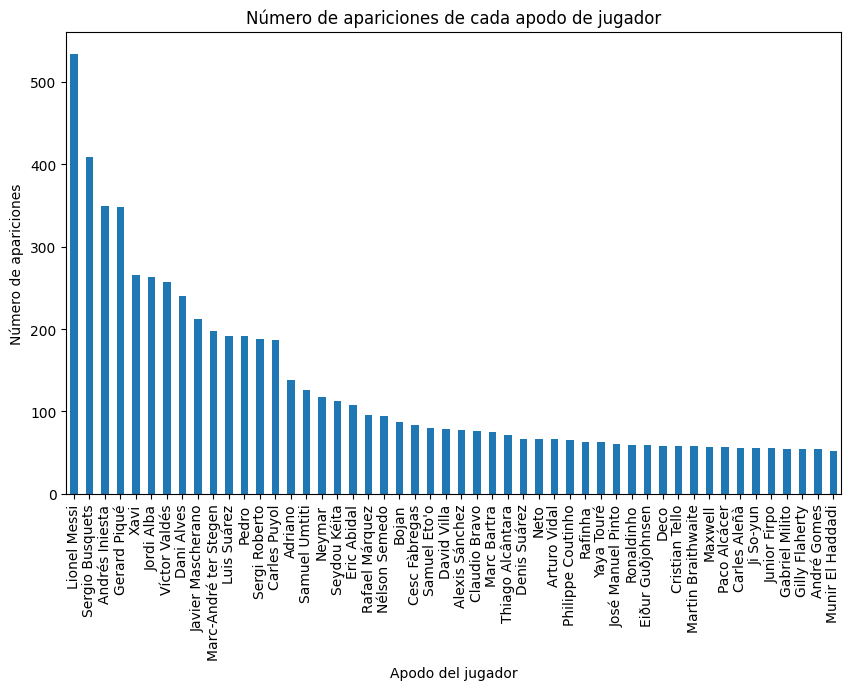

In [241]:
jugadores_apariciones = df_alineaciones['player_nickname'].value_counts()

# Crea un gráfico de barras
plt.figure(figsize=(10,6))  # Ajusta el tamaño del gráfico
jugadores_apariciones.head(50).plot(kind='bar')

# Añade títulos y etiquetas
plt.title('Número de apariciones de cada apodo de jugador')
plt.xlabel('Apodo del jugador')
plt.ylabel('Número de apariciones')

# Rota las etiquetas del eje x para que sean legibles
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()

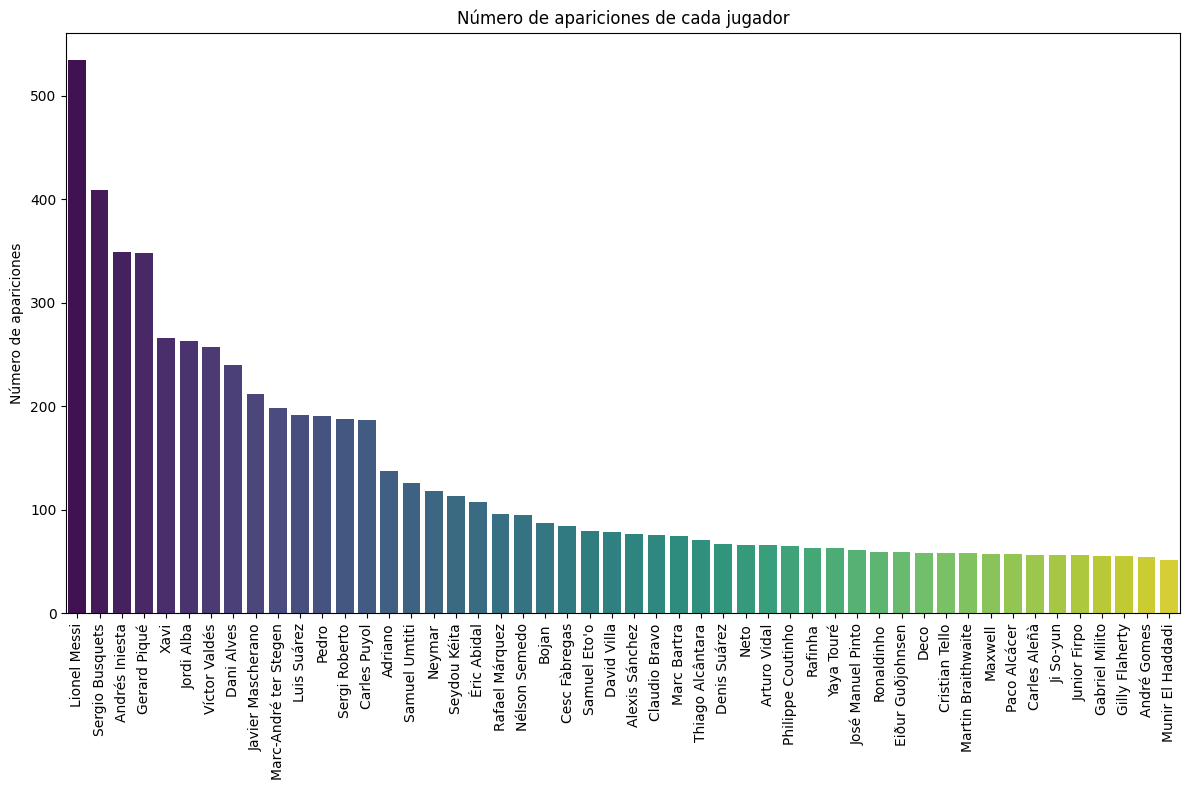

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cálculo del número de apariciones de cada apodo de jugador
jugadores_apariciones = df_alineaciones['player_nickname'].value_counts()

# Crea un gráfico de barras con colores personalizados
plt.figure(figsize=(12,8))  # Ajusta el tamaño del gráfico
sns.barplot(x=jugadores_apariciones.index[:50],
            y=jugadores_apariciones.values[:50],
            palette="viridis") # utiliza una paleta de colores de seaborn

# Añade títulos y etiquetas
plt.title('Número de apariciones de cada jugador')
plt.ylabel('Número de apariciones')

# Rota las etiquetas del eje x para que sean legibles y ajusta el espaciado
plt.xticks(rotation=90)
plt.tight_layout()  # ajusta automáticamente el espaciado en el gráfico para que todo sea visible y tenga un buen aspecto

# Guarda el gráfico como PNG
plt.savefig('resources/jugadores_apariciones.png', dpi=300, bbox_inches='tight')

# Muestra el gráfico
plt.show()

In [243]:
df_alineaciones.player_jersey_number.value_counts()

10      2131
1       2080
8       2066
9       1961
7       1958
        ... 
78         3
100        2
58         1
62         1
1000       1
Name: player_jersey_number, Length: 68, dtype: int64

In [244]:
df_alineaciones.player_cards.value_counts()

[]                                                                                          41099
[{'time': '47:46', 'card_type': 'Yellow Card', 'reason': 'Foul Committed', 'period': 2}]        5
[{'time': '71:46', 'card_type': 'Yellow Card', 'reason': 'Foul Committed', 'period': 2}]        5
[{'time': '55:12', 'card_type': 'Yellow Card', 'reason': 'Foul Committed', 'period': 2}]        5
[{'time': '74:01', 'card_type': 'Yellow Card', 'reason': 'Foul Committed', 'period': 2}]        5
                                                                                            ...  
[{'time': '19:08', 'card_type': 'Yellow Card', 'reason': 'Foul Committed', 'period': 1}]        1
[{'time': '59:53', 'card_type': 'Yellow Card', 'reason': 'Foul Committed', 'period': 2}]        1
[{'time': '40:29', 'card_type': 'Yellow Card', 'reason': 'Foul Committed', 'period': 1}]        1
[{'time': '38:47', 'card_type': 'Yellow Card', 'reason': 'Bad Behaviour', 'period': 1}]         1
[{'time': '95:26', '

In [245]:
df_alineaciones.player_positions.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                 8620
[{'position_id': 1, 'position': 'Goalkeeper', 'from': '00:00', 'to': None, 'from_period': 1, 'to_period': None, 'start_reason': 'Starting XI', 'end_reason': 'Final Whistle'}]                                                                                                                                                                                                                     2591
[{'position_id': 5, 'position': 'Left Center Back', 'from': '00:00', 'to': None, 'from_period': 1, 'to_period': None, 'start_reason': 'Starting XI', 'end_reason': 'Final Whistle'}]                                    

In [246]:
df_alineaciones.player_country_id.value_counts()
df_alineaciones.player_country_name.value_counts()

Spain         9568
England       6731
India         3400
Brazil        2046
France        1956
              ... 
Haiti            1
Suriname         1
Bolivia          1
Azerbaijan       1
Estonia          1
Name: player_country_name, Length: 113, dtype: int64

In [247]:
df_alineaciones_filtrado = df_alineaciones.copy()
df_alineaciones_filtrado

,team_id,team_name,match_id,player_id,player_name,player_nickname,player_jersey_number,player_cards,player_positions,player_country_id,player_country_name
0,787,Senegal,3857285,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
1,787,Senegal,3869118,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
2,787,Senegal,7539,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
3,787,Senegal,7571,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
4,787,Senegal,7556,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
...,...,...,...,...,...,...,...,...,...,...,...
46056,221,Levante,68360,392553,Armando Lozano Sánchez,None,32,[],[],214.0,Spain
46057,218,Real Betis,69166,392554,Francisco Javier Muñoz Llompart,Xisco Muñoz,19,[],[],214.0,Spain
46058,1230,Real Murcia CF,69186,392555,Héctor Fabián Carini Hernández,None,1,[],[],242.0,Uruguay
46059,223,Málaga,69142,392556,Pablo de Barros Paulino,None,22,[],[],31.0,Brazil


In [248]:
df_alineaciones_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46061 entries, 0 to 46060
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team_id               46061 non-null  int64  
 1   team_name             46061 non-null  object 
 2   match_id              46061 non-null  int64  
 3   player_id             46061 non-null  int64  
 4   player_name           46061 non-null  object 
 5   player_nickname       19765 non-null  object 
 6   player_jersey_number  46061 non-null  int64  
 7   player_cards          45739 non-null  object 
 8   player_positions      45739 non-null  object 
 9   player_country_id     46056 non-null  float64
 10  player_country_name   46056 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.9+ MB


In [249]:
df_alineaciones_filtrado = df_alineaciones_filtrado.rename(columns={'team_id': 'equipo_id','team_name': 'equipo_nombre','match_id': 'partido_id','player_id': 'jugador_id','player_name': 'jugador_nombre','player_nickname': 'jugador_apodo','player_jersey_number': 'jugador_dorsal','player_cards': 'jugador_tarjetas','player_positions': 'jugador_posiciones','player_country_id': 'jugador_id_nacionalidad','player_country_name': 'jugador_nacionalidad'})

In [250]:
# eliminar a jugadoras y jugadores de ligar que no me interesan del dataset:
print(len(df_alineaciones_filtrado))
equipos= pd.concat([df_partidos_filtrado['equipo_local_nombre'], df_partidos_filtrado['equipo_visitante_nombre']]).unique()
df_alineaciones_filtrado = df_alineaciones_filtrado[df_alineaciones_filtrado['equipo_nombre'].isin(equipos)]
print(len(df_alineaciones_filtrado))

46061
25688


In [251]:
df_alineaciones_filtrado.equipo_nombre.value_counts()

Barcelona              8358
Manchester United       721
Real Madrid             524
Atlético Madrid         510
Sevilla                 463
                       ... 
Real Murcia CF           18
Inter Milan              18
FC Porto                 14
AS Monaco                14
Gimnàstic Tarragona      14
Name: equipo_nombre, Length: 102, dtype: int64

In [252]:
df_alineaciones_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25688 entries, 0 to 46060
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   equipo_id                25688 non-null  int64  
 1   equipo_nombre            25688 non-null  object 
 2   partido_id               25688 non-null  int64  
 3   jugador_id               25688 non-null  int64  
 4   jugador_nombre           25688 non-null  object 
 5   jugador_apodo            17448 non-null  object 
 6   jugador_dorsal           25688 non-null  int64  
 7   jugador_tarjetas         25688 non-null  object 
 8   jugador_posiciones       25688 non-null  object 
 9   jugador_id_nacionalidad  25683 non-null  float64
 10  jugador_nacionalidad     25683 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.4+ MB


In [253]:
resumen_jugadores = df_alineaciones_filtrado.groupby(['equipo_nombre', 'jugador_apodo']).size().reset_index(name='apariciones')
resumen_jugadores = resumen_jugadores.sort_values('apariciones', ascending=False)

print(resumen_jugadores)

     equipo_nombre     jugador_apodo  apariciones
370      Barcelona      Lionel Messi          523
416      Barcelona   Sergio Busquets          397
315      Barcelona    Andrés Iniesta          345
346      Barcelona      Gerard Piqué          342
425      Barcelona              Xavi          266
...            ...               ...          ...
1284        Girona  Valery Fernández            1
1286        Girona       Álex Pachón            1
2544   Real Madrid    Júlio Baptista            1
1287        Girona       Èric Montes            1
3509         Xerez  Álex Bergantiños            1

[3510 rows x 3 columns]


In [254]:
# Agrupar por 'jugador_id', 'jugador_nombre' y 'equipo_nombre'
jugadores_partidos = df_alineaciones_filtrado.groupby(['jugador_id', 'jugador_nombre', 'equipo_nombre'])

# Contar el número de partidos que ha jugado cada jugador
df_contador_partidos = jugadores_partidos['partido_id'].nunique().reset_index()

# Renombrar la columna 'partido_id' a 'numero_partidos'
df_contador_partidos = df_contador_partidos.rename(columns={'partido_id': 'numero_partidos'})

# Ordenar por 'numero_partidos' de forma descendente
df_contador_partidos = df_contador_partidos.sort_values('numero_partidos', ascending=False)

# Encontrar los 15 equipos que más aparecen
top_equipos = df_alineaciones_filtrado['equipo_nombre'].value_counts().head(15).index

# Filtrar el DataFrame para incluir solo los jugadores de los 15 equipos que más aparecen
df_contador_partidos_top_equipos = df_contador_partidos[df_contador_partidos['equipo_nombre'].isin(top_equipos)]

# Crear un gráfico de dispersión
import plotly.express as px
fig = px.scatter(df_contador_partidos_top_equipos,
                 x='equipo_nombre',
                 y='numero_partidos',
                 hover_data={'jugador_nombre':True},
                 hover_name='jugador_nombre',
                 size='numero_partidos',
                 title='Número de partidos jugados por jugador y equipo')

fig.update_traces(hovertemplate='Nombre del Jugador: %{hovertext}<br>Número de partidos: %{y}<br>Equipo: %{x}')

# Actualizar las leyendas
fig.update_layout(
    xaxis_title="Nombre del Equipo",
    yaxis_title="Cantidad de Partidos Jugados",
    legend_title="Leyenda",
)

!pip install -U kaleido
#!pip show kaleido
#fig.write_image("resources/partidos_apariciones.png")

# Mostrar el gráfico
fig.show()

You should consider upgrading via the '/Users/Santana/PycharmProjects/TFM_/venv/bin/python -m pip install --upgrade pip' command.


### Calidad de datos

In [255]:
df_alineaciones_filtrado

,equipo_id,equipo_nombre,partido_id,jugador_id,jugador_nombre,jugador_apodo,jugador_dorsal,jugador_tarjetas,jugador_posiciones,jugador_id_nacionalidad,jugador_nacionalidad
0,787,Senegal,3857285,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
1,787,Senegal,3869118,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
2,787,Senegal,7539,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
3,787,Senegal,7571,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
4,787,Senegal,7556,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
...,...,...,...,...,...,...,...,...,...,...,...
46056,221,Levante,68360,392553,Armando Lozano Sánchez,None,32,[],[],214.0,Spain
46057,218,Real Betis,69166,392554,Francisco Javier Muñoz Llompart,Xisco Muñoz,19,[],[],214.0,Spain
46058,1230,Real Murcia CF,69186,392555,Héctor Fabián Carini Hernández,None,1,[],[],242.0,Uruguay
46059,223,Málaga,69142,392556,Pablo de Barros Paulino,None,22,[],[],31.0,Brazil


In [256]:
df_alineaciones_filtrado.isnull().sum()

equipo_id                     0
equipo_nombre                 0
partido_id                    0
jugador_id                    0
jugador_nombre                0
jugador_apodo              8240
jugador_dorsal                0
jugador_tarjetas              0
jugador_posiciones            0
jugador_id_nacionalidad       5
jugador_nacionalidad          5
dtype: int64

In [257]:
missing_values_table(df_alineaciones_filtrado)

El dataframe tiene 11 columnas.
Hay 3 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales
jugador_apodo,8240,32.1
jugador_id_nacionalidad,5,0.0
jugador_nacionalidad,5,0.0


In [258]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_alineaciones_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se elimina %d columnas.' % len(missing_columns))
print(f'Es: {missing_columns}')

El dataframe tiene 11 columnas.
Hay 3 columnas que les faltan valores.
Se elimina 0 columnas.
Es: []


In [259]:
# Drop the columns
df_alineaciones_filtrado = df_alineaciones_filtrado.drop(list(missing_columns), axis=1)

In [260]:
df_alineaciones_filtrado

,equipo_id,equipo_nombre,partido_id,jugador_id,jugador_nombre,jugador_apodo,jugador_dorsal,jugador_tarjetas,jugador_posiciones,jugador_id_nacionalidad,jugador_nacionalidad
0,787,Senegal,3857285,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
1,787,Senegal,3869118,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
2,787,Senegal,7539,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
3,787,Senegal,7571,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
4,787,Senegal,7556,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
...,...,...,...,...,...,...,...,...,...,...,...
46056,221,Levante,68360,392553,Armando Lozano Sánchez,None,32,[],[],214.0,Spain
46057,218,Real Betis,69166,392554,Francisco Javier Muñoz Llompart,Xisco Muñoz,19,[],[],214.0,Spain
46058,1230,Real Murcia CF,69186,392555,Héctor Fabián Carini Hernández,None,1,[],[],242.0,Uruguay
46059,223,Málaga,69142,392556,Pablo de Barros Paulino,None,22,[],[],31.0,Brazil


## Resumen

In [261]:
df_competiciones_filtrado

,competicion_id,competicion_nombre,id_temporada,temporada,pais,competicion_internacional,fecha_subida,fecha_actualizada
7,16,Champions League,1,2017/2018,Europe,False,2021-01-23 21:55:30.425330,2021-08-27 11:26:39.802832
8,16,Champions League,2,2016/2017,Europe,False,2020-07-29 05:00:00.000000,2021-08-27 11:26:39.802832
9,16,Champions League,4,2018/2019,Europe,False,2023-03-07 12:20:48.118250,2023-03-07 12:20:48.118250
10,16,Champions League,21,2009/2010,Europe,False,2022-11-15 17:26:10.871011,2022-11-15 17:26:10.871011
11,16,Champions League,22,2010/2011,Europe,False,2022-01-26 21:07:11.033473,2022-01-26 21:07:11.033473
12,16,Champions League,23,2011/2012,Europe,False,2020-07-29 05:00:00.000000,2021-08-27 11:26:39.802832
13,16,Champions League,24,2012/2013,Europe,False,2021-07-10 13:41:45.751000,2021-08-27 11:26:39.802832
14,16,Champions League,25,2013/2014,Europe,False,2020-07-29 05:00:00.000000,2021-08-27 11:26:39.802832
15,16,Champions League,26,2014/2015,Europe,False,2020-07-29 05:00:00.000000,2021-08-27 11:26:39.802832
16,16,Champions League,27,2015/2016,Europe,False,2020-07-29 05:00:00.000000,2021-08-27 11:26:39.802832


In [262]:
df_competiciones_filtrado = df_competiciones_filtrado.drop(['id_temporada','fecha_subida', 'fecha_actualizada'], axis=1)
df_partidos_filtrado=df_partidos_filtrado.reset_index(drop=True)
df_competiciones_filtrado

,competicion_id,competicion_nombre,temporada,pais,competicion_internacional
7,16,Champions League,2017/2018,Europe,False
8,16,Champions League,2016/2017,Europe,False
9,16,Champions League,2018/2019,Europe,False
10,16,Champions League,2009/2010,Europe,False
11,16,Champions League,2010/2011,Europe,False
12,16,Champions League,2011/2012,Europe,False
13,16,Champions League,2012/2013,Europe,False
14,16,Champions League,2013/2014,Europe,False
15,16,Champions League,2014/2015,Europe,False
16,16,Champions League,2015/2016,Europe,False


In [263]:
df_partidos_filtrado

,partido_id,competicion_id,competicion_nombre,competicion_pais,competicion_fase_nombre,temporada_id,temporada_nombre,jornada,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_nacimiento,entrenador_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_nacimiento,entrenador_visitante_pais_nombre,estadio_id,estadio_nombre,estadio_pais_nombre,arbitro_id,arbitro_nombre,arbitro_pais_nombre,partido_fecha,partido_inicio,ultima_actualizacion
0,68353,11,La Liga,Spain,Regular Season,37,2004/2005,7,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,1957-06-18,Spain,Barcelona,Spain,Frank Rijkaard,None,1962-09-30,Netherlands,4635.0,Estadi Olímpic Lluís Companys,Spain,996.0,Carlos Megía Dávila,Spain,2004-10-16,2004-10-16 22:00:00,2020-07-29 05:00:00.000000
1,68313,11,La Liga,Spain,Regular Season,37,2004/2005,8,3,0,Barcelona,Spain,Frank Rijkaard,None,1962-09-30,Netherlands,Osasuna,Spain,Javier Aguirre Onaindía,Javier Aguirre,1958-12-01,Mexico,342.0,Spotify Camp Nou,Spain,994.0,Vicente José Lizondo Cortés,Spain,2004-10-24,2004-10-24 21:00:00,2020-07-29 05:00:00.000000
2,68314,11,La Liga,Spain,Regular Season,37,2004/2005,14,4,0,Barcelona,Spain,Frank Rijkaard,None,1962-09-30,Netherlands,Málaga,Spain,Gregorio Manzano Ballesteros,Gregorio Manzano,1956-03-11,Spain,342.0,Spotify Camp Nou,Spain,993.0,José Omar Losantos,Spain,2004-12-04,2004-12-04 20:00:00,2020-07-29 05:00:00.000000
3,69153,11,La Liga,Spain,Regular Season,37,2004/2005,15,1,2,Albacete,Spain,José Manuel González López,José González,1966-10-14,Spain,Barcelona,Spain,Frank Rijkaard,None,1962-09-30,Netherlands,4448.0,Estadio Carlos Belmonte,Spain,1007.0,Alfonso Perez Burrull,Spain,2004-12-11,2004-12-11 20:00:00,2020-07-29 05:00:00.000000
4,68315,11,La Liga,Spain,Regular Season,37,2004/2005,17,2,1,Barcelona,Spain,Frank Rijkaard,None,1962-09-30,Netherlands,Levante,Spain,Bernd Schuster,None,1959-12-22,Germany,342.0,Spotify Camp Nou,Spain,222.0,David Fernández Borbalan,Spain,2004-12-21,2004-12-21 20:00:00,2020-07-29 05:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,3869552,43,FIFA World Cup,International,Semi-finals,106,2022,6,2,0,France,France,Didier Deschamps,None,1968-10-15,France,Morocco,Morocco,Hoalid Regragui,None,1975-09-23,Morocco,1001113.0,Al Bayt Stadium,Qatar,740.0,César Arturo Ramos Palazuelos,Mexico,2022-12-14,2022-12-14 21:00:00,2023-03-18 06:06:29.317928
709,3869684,43,FIFA World Cup,International,3rd Place Final,106,2022,7,2,1,Croatia,Croatia,Zlatko Dalić,None,1966-10-26,Croatia,Morocco,Morocco,Hoalid Regragui,None,1975-09-23,Morocco,1000253.0,Sheikh Khalifa International Stadium,Qatar,2521.0,Abdulrahman Ibrahim Al Jassim,Qatar,2022-12-17,2022-12-17 17:00:00,2023-02-20 08:56:30.908564
710,3869685,43,FIFA World Cup,International,Final,106,2022,7,3,3,Argentina,Argentina,Lionel Sebastián Scaloni,None,1978-05-16,Argentina,France,France,Didier Deschamps,None,1968-10-15,France,1001114.0,Lusail Stadium,Qatar,367.0,Szymon Marciniak,Poland,2022-12-18,2022-12-18 17:00:00,2023-02-20 07:27:19.374380
711,2302764,16,Champions League,Europe,Final,37,2004/2005,1,3,3,AC Milan,Italy,NaN,NaN,NaT,NaN,Liverpool,England,NaN,NaN,NaT,NaN,5666.0,Atatürk Olimpiyat Stadı,Turkey,NaN,NaN,NaN,2005-05-25,NaT,2021-04-01 06:18:57.459032


In [264]:
df_partidos_filtrado = df_partidos_filtrado.drop(['temporada_id','jornada', 'entrenador_local_nacimiento', 'entrenador_visitante_nacimiento', 'estadio_id', 'arbitro_id', 'partido_inicio', 'ultima_actualizacion'], axis=1)
df_partidos_filtrado=df_partidos_filtrado.reset_index(drop=True)
df_partidos_filtrado

,partido_id,competicion_id,competicion_nombre,competicion_pais,competicion_fase_nombre,temporada_nombre,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_pais_nombre,estadio_nombre,estadio_pais_nombre,arbitro_nombre,arbitro_pais_nombre,partido_fecha
0,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16
1,68313,11,La Liga,Spain,Regular Season,2004/2005,3,0,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Osasuna,Spain,Javier Aguirre Onaindía,Javier Aguirre,Mexico,Spotify Camp Nou,Spain,Vicente José Lizondo Cortés,Spain,2004-10-24
2,68314,11,La Liga,Spain,Regular Season,2004/2005,4,0,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Málaga,Spain,Gregorio Manzano Ballesteros,Gregorio Manzano,Spain,Spotify Camp Nou,Spain,José Omar Losantos,Spain,2004-12-04
3,69153,11,La Liga,Spain,Regular Season,2004/2005,1,2,Albacete,Spain,José Manuel González López,José González,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadio Carlos Belmonte,Spain,Alfonso Perez Burrull,Spain,2004-12-11
4,68315,11,La Liga,Spain,Regular Season,2004/2005,2,1,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Levante,Spain,Bernd Schuster,None,Germany,Spotify Camp Nou,Spain,David Fernández Borbalan,Spain,2004-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,3869552,43,FIFA World Cup,International,Semi-finals,2022,2,0,France,France,Didier Deschamps,None,France,Morocco,Morocco,Hoalid Regragui,None,Morocco,Al Bayt Stadium,Qatar,César Arturo Ramos Palazuelos,Mexico,2022-12-14
709,3869684,43,FIFA World Cup,International,3rd Place Final,2022,2,1,Croatia,Croatia,Zlatko Dalić,None,Croatia,Morocco,Morocco,Hoalid Regragui,None,Morocco,Sheikh Khalifa International Stadium,Qatar,Abdulrahman Ibrahim Al Jassim,Qatar,2022-12-17
710,3869685,43,FIFA World Cup,International,Final,2022,3,3,Argentina,Argentina,Lionel Sebastián Scaloni,None,Argentina,France,France,Didier Deschamps,None,France,Lusail Stadium,Qatar,Szymon Marciniak,Poland,2022-12-18
711,2302764,16,Champions League,Europe,Final,2004/2005,3,3,AC Milan,Italy,NaN,NaN,NaN,Liverpool,England,NaN,NaN,NaN,Atatürk Olimpiyat Stadı,Turkey,NaN,NaN,2005-05-25


In [265]:
df_alineaciones_filtrado

,equipo_id,equipo_nombre,partido_id,jugador_id,jugador_nombre,jugador_apodo,jugador_dorsal,jugador_tarjetas,jugador_posiciones,jugador_id_nacionalidad,jugador_nacionalidad
0,787,Senegal,3857285,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
1,787,Senegal,3869118,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 21, 'position': 'Left Wing', ...",202.0,Senegal
2,787,Senegal,7539,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
3,787,Senegal,7571,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
4,787,Senegal,7556,2941,Ismaïla Sarr,None,18,[],"[{'position_id': 17, 'position': 'Right Wing',...",202.0,Senegal
...,...,...,...,...,...,...,...,...,...,...,...
46056,221,Levante,68360,392553,Armando Lozano Sánchez,None,32,[],[],214.0,Spain
46057,218,Real Betis,69166,392554,Francisco Javier Muñoz Llompart,Xisco Muñoz,19,[],[],214.0,Spain
46058,1230,Real Murcia CF,69186,392555,Héctor Fabián Carini Hernández,None,1,[],[],242.0,Uruguay
46059,223,Málaga,69142,392556,Pablo de Barros Paulino,None,22,[],[],31.0,Brazil


In [266]:
df_alineaciones_filtrado = df_alineaciones_filtrado.drop(['jugador_id_nacionalidad', 'jugador_tarjetas'], axis=1)
df_alineaciones_filtrado=df_alineaciones_filtrado.reset_index(drop=True)
df_alineaciones_filtrado

,equipo_id,equipo_nombre,partido_id,jugador_id,jugador_nombre,jugador_apodo,jugador_dorsal,jugador_posiciones,jugador_nacionalidad
0,787,Senegal,3857285,2941,Ismaïla Sarr,None,18,"[{'position_id': 21, 'position': 'Left Wing', ...",Senegal
1,787,Senegal,3869118,2941,Ismaïla Sarr,None,18,"[{'position_id': 21, 'position': 'Left Wing', ...",Senegal
2,787,Senegal,7539,2941,Ismaïla Sarr,None,18,"[{'position_id': 17, 'position': 'Right Wing',...",Senegal
3,787,Senegal,7571,2941,Ismaïla Sarr,None,18,"[{'position_id': 17, 'position': 'Right Wing',...",Senegal
4,787,Senegal,7556,2941,Ismaïla Sarr,None,18,"[{'position_id': 17, 'position': 'Right Wing',...",Senegal
...,...,...,...,...,...,...,...,...,...
25683,221,Levante,68360,392553,Armando Lozano Sánchez,None,32,[],Spain
25684,218,Real Betis,69166,392554,Francisco Javier Muñoz Llompart,Xisco Muñoz,19,[],Spain
25685,1230,Real Murcia CF,69186,392555,Héctor Fabián Carini Hernández,None,1,[],Uruguay
25686,223,Málaga,69142,392556,Pablo de Barros Paulino,None,22,[],Brazil


## Integrar dataframes

In [267]:
df_competiciones_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 7 to 42
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competicion_id             35 non-null     int64 
 1   competicion_nombre         35 non-null     object
 2   temporada                  35 non-null     object
 3   pais                       35 non-null     object
 4   competicion_internacional  35 non-null     bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ KB


In [268]:
pd.set_option('display.max_columns', None)
df_partidos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   partido_id                        713 non-null    int64         
 1   competicion_id                    713 non-null    int64         
 2   competicion_nombre                713 non-null    object        
 3   competicion_pais                  713 non-null    object        
 4   competicion_fase_nombre           713 non-null    object        
 5   temporada_nombre                  713 non-null    object        
 6   resultado_local                   713 non-null    int64         
 7   resultado_visitante               713 non-null    int64         
 8   equipo_local_nombre               713 non-null    object        
 9   equipo_local_pais_nombre          713 non-null    object        
 10  entrenador_local_nombre           669 non-null    

In [269]:
# Realizar un outer join
df_outer = df_partidos_filtrado.merge(df_alineaciones_filtrado, on='partido_id', how='outer')

# Realizar un inner join
df_inner = df_partidos_filtrado.merge(df_alineaciones_filtrado, on='partido_id', how='inner')

# Encontrar las filas que están en df_outer pero no en df_inner
df_diff = df_outer.loc[~df_outer.index.isin(df_inner.index)]


In [270]:
# Primero, combina el DataFrame alineaciones con el DataFrame partidos
df_merge1 = df_partidos_filtrado.merge(df_alineaciones_filtrado, on='partido_id', how='inner')

In [271]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24919 entries, 0 to 24918
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   partido_id                        24919 non-null  int64         
 1   competicion_id                    24919 non-null  int64         
 2   competicion_nombre                24919 non-null  object        
 3   competicion_pais                  24919 non-null  object        
 4   competicion_fase_nombre           24919 non-null  object        
 5   temporada_nombre                  24919 non-null  object        
 6   resultado_local                   24919 non-null  int64         
 7   resultado_visitante               24919 non-null  int64         
 8   equipo_local_nombre               24919 non-null  object        
 9   equipo_local_pais_nombre          24919 non-null  object        
 10  entrenador_local_nombre           23659 non-nu

In [272]:
df_merge1

,partido_id,competicion_id,competicion_nombre,competicion_pais,competicion_fase_nombre,temporada_nombre,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_pais_nombre,estadio_nombre,estadio_pais_nombre,arbitro_nombre,arbitro_pais_nombre,partido_fecha,equipo_id,equipo_nombre,jugador_id,jugador_nombre,jugador_apodo,jugador_dorsal,jugador_posiciones,jugador_nacionalidad
0,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,217,Barcelona,5216,Andrés Iniesta Luján,Andrés Iniesta,24,"[{'position_id': 17, 'position': 'Right Wing',...",Spain
1,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,30,"[{'position_id': 13, 'position': 'Right Center...",Argentina
2,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,217,Barcelona,5558,Rafael Márquez Álvarez,Rafael Márquez,4,"[{'position_id': 10, 'position': 'Center Defen...",Mexico
3,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,214,Espanyol,13811,José Emilio Amavisca Gárate,José Amavisca,24,"[{'position_id': 17, 'position': 'Right Wing',...",Spain
4,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,217,Barcelona,15743,Henrik Larsson,None,7,"[{'position_id': 23, 'position': 'Center Forwa...",Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24914,3752619,16,Champions League,Europe,Final,2003/2004,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,129,AS Monaco,40848,Andreas Vasilios Zikos,None,15,"[{'position_id': 15, 'position': 'Left Center ...",Greece
24915,3752619,16,Champions League,Europe,Final,2003/2004,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,256,FC Porto,40849,Vanderlei Fernandes Silva,Derlei,11,"[{'position_id': 22, 'position': 'Right Center...",Portugal
24916,3752619,16,Champions League,Europe,Final,2003/2004,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,256,FC Porto,40850,Carlos Alberto Gomes de Jesus,Carlos Alberto,19,"[{'position_id': 24, 'position': 'Left Center ...",Brazil
24917,3752619,16,Champions League,Europe,Final,2003/2004,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,256,FC Porto,40851,Pedro Emanuel dos Santos Martins Silva,Pedro Emanuel,3,"[{'position_id': 19, 'position': 'Center Attac...",Portugal


In [273]:
df_merge1.competicion_nombre.value_counts()

La Liga             16661
FIFA World Cup       5415
UEFA Euro            2345
Champions League      498
Name: competicion_nombre, dtype: int64

In [274]:
df_competiciones_filtrado

,competicion_id,competicion_nombre,temporada,pais,competicion_internacional
7,16,Champions League,2017/2018,Europe,False
8,16,Champions League,2016/2017,Europe,False
9,16,Champions League,2018/2019,Europe,False
10,16,Champions League,2009/2010,Europe,False
11,16,Champions League,2010/2011,Europe,False
12,16,Champions League,2011/2012,Europe,False
13,16,Champions League,2012/2013,Europe,False
14,16,Champions League,2013/2014,Europe,False
15,16,Champions League,2014/2015,Europe,False
16,16,Champions League,2015/2016,Europe,False


In [275]:
df_competiciones_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 7 to 42
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competicion_id             35 non-null     int64 
 1   competicion_nombre         35 non-null     object
 2   temporada                  35 non-null     object
 3   pais                       35 non-null     object
 4   competicion_internacional  35 non-null     bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ KB


In [276]:
df_merge1 = df_merge1.rename(columns={'temporada_nombre': 'temporada'})
df_merge1
df_competiciones_filtrado = df_competiciones_filtrado.rename(columns={'pais': 'competicion_pais'})

In [277]:
# Luego, combina df_merge1 con el DataFrame df_competiciones_filtrado
#df_final = df_merge1.merge(df_competiciones_filtrado, left_on='partido_id', right_on='partido_id', how='outer')

df_final = df_merge1.merge(df_competiciones_filtrado,
                          left_on=['competicion_id', 'competicion_nombre', 'temporada', 'competicion_pais'],
                          right_on=['competicion_id', 'competicion_nombre', 'temporada', 'competicion_pais'])
df_final

,partido_id,competicion_id,competicion_nombre,competicion_pais,competicion_fase_nombre,temporada,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_pais_nombre,estadio_nombre,estadio_pais_nombre,arbitro_nombre,arbitro_pais_nombre,partido_fecha,equipo_id,equipo_nombre,jugador_id,jugador_nombre,jugador_apodo,jugador_dorsal,jugador_posiciones,jugador_nacionalidad,competicion_internacional
0,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,217,Barcelona,5216,Andrés Iniesta Luján,Andrés Iniesta,24,"[{'position_id': 17, 'position': 'Right Wing',...",Spain,False
1,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,217,Barcelona,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,30,"[{'position_id': 13, 'position': 'Right Center...",Argentina,False
2,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,217,Barcelona,5558,Rafael Márquez Álvarez,Rafael Márquez,4,"[{'position_id': 10, 'position': 'Center Defen...",Mexico,False
3,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,214,Espanyol,13811,José Emilio Amavisca Gárate,José Amavisca,24,"[{'position_id': 17, 'position': 'Right Wing',...",Spain,False
4,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,217,Barcelona,15743,Henrik Larsson,None,7,"[{'position_id': 23, 'position': 'Center Forwa...",Sweden,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24914,3752619,16,Champions League,Europe,Final,2003/2004,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,129,AS Monaco,40848,Andreas Vasilios Zikos,None,15,"[{'position_id': 15, 'position': 'Left Center ...",Greece,False
24915,3752619,16,Champions League,Europe,Final,2003/2004,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,256,FC Porto,40849,Vanderlei Fernandes Silva,Derlei,11,"[{'position_id': 22, 'position': 'Right Center...",Portugal,False
24916,3752619,16,Champions League,Europe,Final,2003/2004,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,256,FC Porto,40850,Carlos Alberto Gomes de Jesus,Carlos Alberto,19,"[{'position_id': 24, 'position': 'Left Center ...",Brazil,False
24917,3752619,16,Champions League,Europe,Final,2003/2004,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,256,FC Porto,40851,Pedro Emanuel dos Santos Martins Silva,Pedro Emanuel,3,"[{'position_id': 19, 'position': 'Center Attac...",Portugal,False


In [278]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24919 entries, 0 to 24918
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   partido_id                        24919 non-null  int64         
 1   competicion_id                    24919 non-null  int64         
 2   competicion_nombre                24919 non-null  object        
 3   competicion_pais                  24919 non-null  object        
 4   competicion_fase_nombre           24919 non-null  object        
 5   temporada                         24919 non-null  object        
 6   resultado_local                   24919 non-null  int64         
 7   resultado_visitante               24919 non-null  int64         
 8   equipo_local_nombre               24919 non-null  object        
 9   equipo_local_pais_nombre          24919 non-null  object        
 10  entrenador_local_nombre           23659 non-nu

In [279]:
df_final.competicion_internacional.value_counts()

False    17159
True      7760
Name: competicion_internacional, dtype: int64

In [280]:
column_list = df_final.columns.tolist()
print(column_list)

['partido_id', 'competicion_id', 'competicion_nombre', 'competicion_pais', 'competicion_fase_nombre', 'temporada', 'resultado_local', 'resultado_visitante', 'equipo_local_nombre', 'equipo_local_pais_nombre', 'entrenador_local_nombre', 'entrenador_local_apodo', 'entrenador_local_pais_nombre', 'equipo_visitante_nombre', 'equipo_visitante_pais_nombre', 'entrenador_visitante_nombre', 'entrenador_visitante_apodo', 'entrenador_visitante_pais_nombre', 'estadio_nombre', 'estadio_pais_nombre', 'arbitro_nombre', 'arbitro_pais_nombre', 'partido_fecha', 'equipo_id', 'equipo_nombre', 'jugador_id', 'jugador_nombre', 'jugador_apodo', 'jugador_dorsal', 'jugador_posiciones', 'jugador_nacionalidad', 'competicion_internacional']


In [281]:
df_final = df_final.reindex(columns=['competicion_id', 'competicion_nombre', 'competicion_internacional', 'competicion_pais', 'competicion_fase_nombre', 'temporada', 'partido_id', 'resultado_local', 'resultado_visitante', 'equipo_local_nombre', 'equipo_local_pais_nombre', 'entrenador_local_nombre', 'entrenador_local_apodo', 'entrenador_local_pais_nombre', 'equipo_visitante_nombre', 'equipo_visitante_pais_nombre', 'entrenador_visitante_nombre', 'entrenador_visitante_apodo', 'entrenador_visitante_pais_nombre', 'estadio_nombre', 'estadio_pais_nombre', 'arbitro_nombre', 'arbitro_pais_nombre', 'partido_fecha', 'equipo_id', 'equipo_nombre', 'jugador_id', 'jugador_nombre', 'jugador_apodo', 'jugador_dorsal', 'jugador_posiciones', 'jugador_nacionalidad'])

entrenador_local_nombre             1260
entrenador_local_apodo              9738
entrenador_local_pais_nombre        1260
entrenador_visitante_nombre         1260
entrenador_visitante_apodo          9359
entrenador_visitante_pais_nombre    1260
arbitro_nombre                      3643
arbitro_pais_nombre                 3643
jugador_apodo                       7512
jugador_nacionalidad                   5


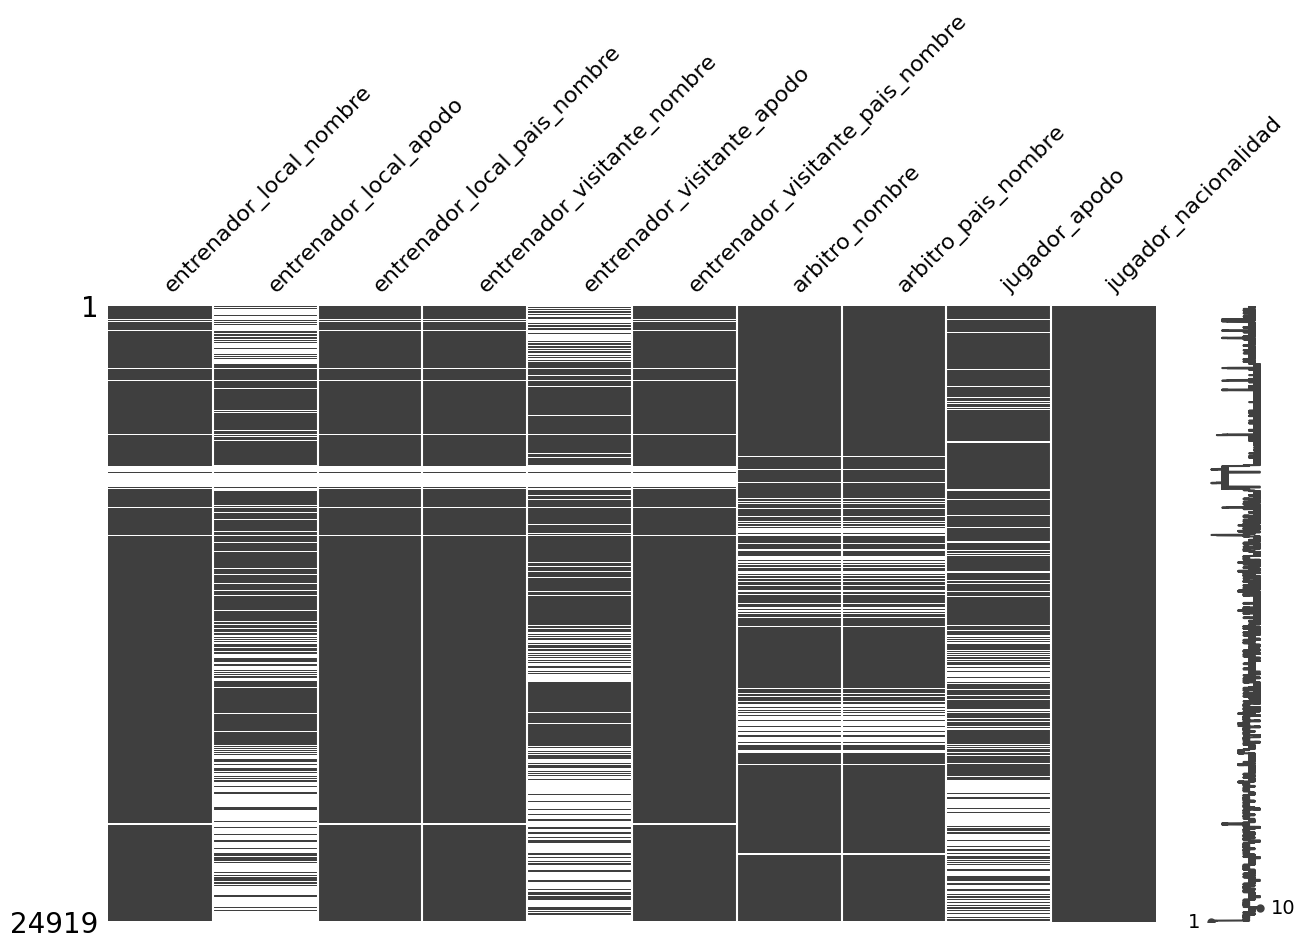

In [282]:
## Visualizing the columns with missing values using the missingno library.
null_values_series = df_final.isnull().sum().where(lambda x : x > 0).dropna().astype('Int32')
print(null_values_series.to_string()) # to_string() removes the name and dtype from the output
msno.matrix(df_final[null_values_series.index.tolist()], figsize=(15, 8));

In [283]:
missing_values_table(df_final)

El dataframe tiene 32 columnas.
Hay 10 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales
entrenador_local_apodo,9738,39.1
entrenador_visitante_apodo,9359,37.6
jugador_apodo,7512,30.1
arbitro_nombre,3643,14.6
arbitro_pais_nombre,3643,14.6
entrenador_local_nombre,1260,5.1
entrenador_local_pais_nombre,1260,5.1
entrenador_visitante_nombre,1260,5.1
entrenador_visitante_pais_nombre,1260,5.1
jugador_nacionalidad,5,0.0


In [284]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_final);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
# Drop the columns
df_final = df_final.drop(list(missing_columns), axis=1)

El dataframe tiene 32 columnas.
Hay 10 columnas que les faltan valores.
Se eliminan 0 columnas.


In [285]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24919 entries, 0 to 24918
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   competicion_id                    24919 non-null  int64         
 1   competicion_nombre                24919 non-null  object        
 2   competicion_internacional         24919 non-null  bool          
 3   competicion_pais                  24919 non-null  object        
 4   competicion_fase_nombre           24919 non-null  object        
 5   temporada                         24919 non-null  object        
 6   partido_id                        24919 non-null  int64         
 7   resultado_local                   24919 non-null  int64         
 8   resultado_visitante               24919 non-null  int64         
 9   equipo_local_nombre               24919 non-null  object        
 10  equipo_local_pais_nombre          24919 non-nu

In [286]:
column_list = df_final.columns.tolist()
print(column_list)

['competicion_id', 'competicion_nombre', 'competicion_internacional', 'competicion_pais', 'competicion_fase_nombre', 'temporada', 'partido_id', 'resultado_local', 'resultado_visitante', 'equipo_local_nombre', 'equipo_local_pais_nombre', 'entrenador_local_nombre', 'entrenador_local_apodo', 'entrenador_local_pais_nombre', 'equipo_visitante_nombre', 'equipo_visitante_pais_nombre', 'entrenador_visitante_nombre', 'entrenador_visitante_apodo', 'entrenador_visitante_pais_nombre', 'estadio_nombre', 'estadio_pais_nombre', 'arbitro_nombre', 'arbitro_pais_nombre', 'partido_fecha', 'equipo_id', 'equipo_nombre', 'jugador_id', 'jugador_nombre', 'jugador_apodo', 'jugador_dorsal', 'jugador_posiciones', 'jugador_nacionalidad']


In [287]:
# eliminar las columnas de id
df_final = df_final.drop(['competicion_id', 'temporada', 'partido_id', 'equipo_id', 'jugador_id'], axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24919 entries, 0 to 24918
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   competicion_nombre                24919 non-null  object        
 1   competicion_internacional         24919 non-null  bool          
 2   competicion_pais                  24919 non-null  object        
 3   competicion_fase_nombre           24919 non-null  object        
 4   resultado_local                   24919 non-null  int64         
 5   resultado_visitante               24919 non-null  int64         
 6   equipo_local_nombre               24919 non-null  object        
 7   equipo_local_pais_nombre          24919 non-null  object        
 8   entrenador_local_nombre           23659 non-null  object        
 9   entrenador_local_apodo            15181 non-null  object        
 10  entrenador_local_pais_nombre      23659 non-nu

In [288]:
#TODO: PONER ids

In [289]:
df_final

,competicion_nombre,competicion_internacional,competicion_pais,competicion_fase_nombre,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_pais_nombre,estadio_nombre,estadio_pais_nombre,arbitro_nombre,arbitro_pais_nombre,partido_fecha,equipo_nombre,jugador_nombre,jugador_apodo,jugador_dorsal,jugador_posiciones,jugador_nacionalidad
0,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Andrés Iniesta Luján,Andrés Iniesta,24,"[{'position_id': 17, 'position': 'Right Wing',...",Spain
1,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Lionel Andrés Messi Cuccittini,Lionel Messi,30,"[{'position_id': 13, 'position': 'Right Center...",Argentina
2,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Rafael Márquez Álvarez,Rafael Márquez,4,"[{'position_id': 10, 'position': 'Center Defen...",Mexico
3,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Espanyol,José Emilio Amavisca Gárate,José Amavisca,24,"[{'position_id': 17, 'position': 'Right Wing',...",Spain
4,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Henrik Larsson,None,7,"[{'position_id': 23, 'position': 'Center Forwa...",Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24914,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,AS Monaco,Andreas Vasilios Zikos,None,15,"[{'position_id': 15, 'position': 'Left Center ...",Greece
24915,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,FC Porto,Vanderlei Fernandes Silva,Derlei,11,"[{'position_id': 22, 'position': 'Right Center...",Portugal
24916,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,FC Porto,Carlos Alberto Gomes de Jesus,Carlos Alberto,19,"[{'position_id': 24, 'position': 'Left Center ...",Brazil
24917,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,FC Porto,Pedro Emanuel dos Santos Martins Silva,Pedro Emanuel,3,"[{'position_id': 19, 'position': 'Center Attac...",Portugal


In [290]:
column_list = df_final.columns.tolist()
print(column_list)

['competicion_nombre', 'competicion_internacional', 'competicion_pais', 'competicion_fase_nombre', 'resultado_local', 'resultado_visitante', 'equipo_local_nombre', 'equipo_local_pais_nombre', 'entrenador_local_nombre', 'entrenador_local_apodo', 'entrenador_local_pais_nombre', 'equipo_visitante_nombre', 'equipo_visitante_pais_nombre', 'entrenador_visitante_nombre', 'entrenador_visitante_apodo', 'entrenador_visitante_pais_nombre', 'estadio_nombre', 'estadio_pais_nombre', 'arbitro_nombre', 'arbitro_pais_nombre', 'partido_fecha', 'equipo_nombre', 'jugador_nombre', 'jugador_apodo', 'jugador_dorsal', 'jugador_posiciones', 'jugador_nacionalidad']


In [291]:
df_competiciones_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 7 to 42
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competicion_id             35 non-null     int64 
 1   competicion_nombre         35 non-null     object
 2   temporada                  35 non-null     object
 3   competicion_pais           35 non-null     object
 4   competicion_internacional  35 non-null     bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ KB


In [292]:
df_partidos_filtrado

,partido_id,competicion_id,competicion_nombre,competicion_pais,competicion_fase_nombre,temporada_nombre,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_pais_nombre,estadio_nombre,estadio_pais_nombre,arbitro_nombre,arbitro_pais_nombre,partido_fecha
0,68353,11,La Liga,Spain,Regular Season,2004/2005,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16
1,68313,11,La Liga,Spain,Regular Season,2004/2005,3,0,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Osasuna,Spain,Javier Aguirre Onaindía,Javier Aguirre,Mexico,Spotify Camp Nou,Spain,Vicente José Lizondo Cortés,Spain,2004-10-24
2,68314,11,La Liga,Spain,Regular Season,2004/2005,4,0,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Málaga,Spain,Gregorio Manzano Ballesteros,Gregorio Manzano,Spain,Spotify Camp Nou,Spain,José Omar Losantos,Spain,2004-12-04
3,69153,11,La Liga,Spain,Regular Season,2004/2005,1,2,Albacete,Spain,José Manuel González López,José González,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadio Carlos Belmonte,Spain,Alfonso Perez Burrull,Spain,2004-12-11
4,68315,11,La Liga,Spain,Regular Season,2004/2005,2,1,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Levante,Spain,Bernd Schuster,None,Germany,Spotify Camp Nou,Spain,David Fernández Borbalan,Spain,2004-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,3869552,43,FIFA World Cup,International,Semi-finals,2022,2,0,France,France,Didier Deschamps,None,France,Morocco,Morocco,Hoalid Regragui,None,Morocco,Al Bayt Stadium,Qatar,César Arturo Ramos Palazuelos,Mexico,2022-12-14
709,3869684,43,FIFA World Cup,International,3rd Place Final,2022,2,1,Croatia,Croatia,Zlatko Dalić,None,Croatia,Morocco,Morocco,Hoalid Regragui,None,Morocco,Sheikh Khalifa International Stadium,Qatar,Abdulrahman Ibrahim Al Jassim,Qatar,2022-12-17
710,3869685,43,FIFA World Cup,International,Final,2022,3,3,Argentina,Argentina,Lionel Sebastián Scaloni,None,Argentina,France,France,Didier Deschamps,None,France,Lusail Stadium,Qatar,Szymon Marciniak,Poland,2022-12-18
711,2302764,16,Champions League,Europe,Final,2004/2005,3,3,AC Milan,Italy,NaN,NaN,NaN,Liverpool,England,NaN,NaN,NaN,Atatürk Olimpiyat Stadı,Turkey,NaN,NaN,2005-05-25


In [293]:
df_alineaciones_filtrado

,equipo_id,equipo_nombre,partido_id,jugador_id,jugador_nombre,jugador_apodo,jugador_dorsal,jugador_posiciones,jugador_nacionalidad
0,787,Senegal,3857285,2941,Ismaïla Sarr,None,18,"[{'position_id': 21, 'position': 'Left Wing', ...",Senegal
1,787,Senegal,3869118,2941,Ismaïla Sarr,None,18,"[{'position_id': 21, 'position': 'Left Wing', ...",Senegal
2,787,Senegal,7539,2941,Ismaïla Sarr,None,18,"[{'position_id': 17, 'position': 'Right Wing',...",Senegal
3,787,Senegal,7571,2941,Ismaïla Sarr,None,18,"[{'position_id': 17, 'position': 'Right Wing',...",Senegal
4,787,Senegal,7556,2941,Ismaïla Sarr,None,18,"[{'position_id': 17, 'position': 'Right Wing',...",Senegal
...,...,...,...,...,...,...,...,...,...
25683,221,Levante,68360,392553,Armando Lozano Sánchez,None,32,[],Spain
25684,218,Real Betis,69166,392554,Francisco Javier Muñoz Llompart,Xisco Muñoz,19,[],Spain
25685,1230,Real Murcia CF,69186,392555,Héctor Fabián Carini Hernández,None,1,[],Uruguay
25686,223,Málaga,69142,392556,Pablo de Barros Paulino,None,22,[],Brazil


In [294]:
df_final

,competicion_nombre,competicion_internacional,competicion_pais,competicion_fase_nombre,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_pais_nombre,estadio_nombre,estadio_pais_nombre,arbitro_nombre,arbitro_pais_nombre,partido_fecha,equipo_nombre,jugador_nombre,jugador_apodo,jugador_dorsal,jugador_posiciones,jugador_nacionalidad
0,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Andrés Iniesta Luján,Andrés Iniesta,24,"[{'position_id': 17, 'position': 'Right Wing',...",Spain
1,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Lionel Andrés Messi Cuccittini,Lionel Messi,30,"[{'position_id': 13, 'position': 'Right Center...",Argentina
2,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Rafael Márquez Álvarez,Rafael Márquez,4,"[{'position_id': 10, 'position': 'Center Defen...",Mexico
3,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Espanyol,José Emilio Amavisca Gárate,José Amavisca,24,"[{'position_id': 17, 'position': 'Right Wing',...",Spain
4,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Henrik Larsson,None,7,"[{'position_id': 23, 'position': 'Center Forwa...",Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24914,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,AS Monaco,Andreas Vasilios Zikos,None,15,"[{'position_id': 15, 'position': 'Left Center ...",Greece
24915,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,FC Porto,Vanderlei Fernandes Silva,Derlei,11,"[{'position_id': 22, 'position': 'Right Center...",Portugal
24916,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,FC Porto,Carlos Alberto Gomes de Jesus,Carlos Alberto,19,"[{'position_id': 24, 'position': 'Left Center ...",Brazil
24917,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,FC Porto,Pedro Emanuel dos Santos Martins Silva,Pedro Emanuel,3,"[{'position_id': 19, 'position': 'Center Attac...",Portugal


### CRISP-DM: FASE 3

In [295]:
df_final = df_final.drop(['jugador_posiciones'], axis=1)
df_final

,competicion_nombre,competicion_internacional,competicion_pais,competicion_fase_nombre,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,entrenador_local_nombre,entrenador_local_apodo,entrenador_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,entrenador_visitante_nombre,entrenador_visitante_apodo,entrenador_visitante_pais_nombre,estadio_nombre,estadio_pais_nombre,arbitro_nombre,arbitro_pais_nombre,partido_fecha,equipo_nombre,jugador_nombre,jugador_apodo,jugador_dorsal,jugador_nacionalidad
0,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Andrés Iniesta Luján,Andrés Iniesta,24,Spain
1,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Lionel Andrés Messi Cuccittini,Lionel Messi,30,Argentina
2,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Rafael Márquez Álvarez,Rafael Márquez,4,Mexico
3,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Espanyol,José Emilio Amavisca Gárate,José Amavisca,24,Spain
4,La Liga,False,Spain,Regular Season,0,1,Espanyol,Spain,Miguel Ángel Lotina Oruecheberría,Miguel Ángel Lotina,Spain,Barcelona,Spain,Frank Rijkaard,None,Netherlands,Estadi Olímpic Lluís Companys,Spain,Carlos Megía Dávila,Spain,2004-10-16,Barcelona,Henrik Larsson,None,7,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24914,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,AS Monaco,Andreas Vasilios Zikos,None,15,Greece
24915,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,FC Porto,Vanderlei Fernandes Silva,Derlei,11,Portugal
24916,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,FC Porto,Carlos Alberto Gomes de Jesus,Carlos Alberto,19,Brazil
24917,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,NaN,NaN,NaN,FC Porto,Portugal,NaN,NaN,NaN,VELTINS-Arena,Germany,NaN,NaN,2004-05-26,FC Porto,Pedro Emanuel dos Santos Martins Silva,Pedro Emanuel,3,Portugal


In [296]:
columnas_entrenador = ['entrenador_local_nombre', 'entrenador_local_apodo', 'entrenador_local_pais_nombre', 'entrenador_visitante_nombre','entrenador_visitante_apodo','entrenador_visitante_pais_nombre']

df_entrenadores = pd.DataFrame()
for column in columnas_entrenador:
    df_entrenadores[column] = df_final.pop(column)

print("Nuevo DataFrame entrenadores:")
print(df_entrenadores)

Nuevo DataFrame entrenadores:
                 entrenador_local_nombre entrenador_local_apodo  \
0      Miguel Ángel Lotina Oruecheberría    Miguel Ángel Lotina   
1      Miguel Ángel Lotina Oruecheberría    Miguel Ángel Lotina   
2      Miguel Ángel Lotina Oruecheberría    Miguel Ángel Lotina   
3      Miguel Ángel Lotina Oruecheberría    Miguel Ángel Lotina   
4      Miguel Ángel Lotina Oruecheberría    Miguel Ángel Lotina   
...                                  ...                    ...   
24914                                NaN                    NaN   
24915                                NaN                    NaN   
24916                                NaN                    NaN   
24917                                NaN                    NaN   
24918                                NaN                    NaN   

      entrenador_local_pais_nombre entrenador_visitante_nombre  \
0                            Spain              Frank Rijkaard   
1                            Spai

In [297]:
columnas_arbitro = ['arbitro_nombre', 'arbitro_pais_nombre']

df_arbitros = pd.DataFrame()
for column in columnas_arbitro:
    df_arbitros[column] = df_final.pop(column)

print("Nuevo DataFrame arbitros:")
print(df_arbitros)

columnas_estadio = ['estadio_nombre', 'estadio_pais_nombre']
df_estadio = pd.DataFrame()
for column in columnas_estadio:
    df_estadio[column] = df_final.pop(column)
print("Nuevo DataFrame estadio:")
print(df_estadio)

Nuevo DataFrame arbitros:
            arbitro_nombre arbitro_pais_nombre
0      Carlos Megía Dávila               Spain
1      Carlos Megía Dávila               Spain
2      Carlos Megía Dávila               Spain
3      Carlos Megía Dávila               Spain
4      Carlos Megía Dávila               Spain
...                    ...                 ...
24914                  NaN                 NaN
24915                  NaN                 NaN
24916                  NaN                 NaN
24917                  NaN                 NaN
24918                  NaN                 NaN

[24919 rows x 2 columns]
Nuevo DataFrame estadio:
                      estadio_nombre estadio_pais_nombre
0      Estadi Olímpic Lluís Companys               Spain
1      Estadi Olímpic Lluís Companys               Spain
2      Estadi Olímpic Lluís Companys               Spain
3      Estadi Olímpic Lluís Companys               Spain
4      Estadi Olímpic Lluís Companys               Spain
...              

In [298]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24919 entries, 0 to 24918
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   competicion_nombre            24919 non-null  object        
 1   competicion_internacional     24919 non-null  bool          
 2   competicion_pais              24919 non-null  object        
 3   competicion_fase_nombre       24919 non-null  object        
 4   resultado_local               24919 non-null  int64         
 5   resultado_visitante           24919 non-null  int64         
 6   equipo_local_nombre           24919 non-null  object        
 7   equipo_local_pais_nombre      24919 non-null  object        
 8   equipo_visitante_nombre       24919 non-null  object        
 9   equipo_visitante_pais_nombre  24919 non-null  object        
 10  partido_fecha                 24919 non-null  datetime64[ns]
 11  equipo_nombre               

In [299]:
# Recorre las columnas y calcula los valores únicos
for column in df_final.columns:
    unique_values = df_final[column].nunique()
    print(f'La columna {column} tiene {unique_values} valores únicos.')

La columna competicion_nombre tiene 4 valores únicos.
La columna competicion_internacional tiene 2 valores únicos.
La columna competicion_pais tiene 3 valores únicos.
La columna competicion_fase_nombre tiene 7 valores únicos.
La columna resultado_local tiene 9 valores únicos.
La columna resultado_visitante tiene 9 valores únicos.
La columna equipo_local_nombre tiene 97 valores únicos.
La columna equipo_local_pais_nombre tiene 51 valores únicos.
La columna equipo_visitante_nombre tiene 95 valores únicos.
La columna equipo_visitante_pais_nombre tiene 50 valores únicos.
La columna partido_fecha tiene 604 valores únicos.
La columna equipo_nombre tiene 102 valores únicos.
La columna jugador_nombre tiene 3870 valores únicos.
La columna jugador_apodo tiene 2308 valores únicos.
La columna jugador_dorsal tiene 52 valores únicos.
La columna jugador_nacionalidad tiene 101 valores únicos.


In [300]:
for column in df_final.columns:
    unique_values = df_final[column].unique()
    print(f'Los valores únicos de la columna {column} son: {unique_values}')

Los valores únicos de la columna competicion_nombre son: ['La Liga' 'Champions League' 'FIFA World Cup' 'UEFA Euro']
Los valores únicos de la columna competicion_internacional son: [False  True]
Los valores únicos de la columna competicion_pais son: ['Spain' 'Europe' 'International']
Los valores únicos de la columna competicion_fase_nombre son: ['Regular Season' 'Final' 'Group Stage' 'Round of 16' 'Quarter-finals'
 'Semi-finals' '3rd Place Final']
Los valores únicos de la columna resultado_local son: [0 3 4 1 2 5 6 8 7]
Los valores únicos de la columna resultado_visitante son: [1 0 2 3 4 6 5 8 7]
Los valores únicos de la columna equipo_local_nombre son: ['Espanyol' 'Barcelona' 'Albacete' 'Getafe' 'Real Madrid' 'Villarreal'
 'Cádiz' 'Mallorca' 'Real Zaragoza' 'Celta Vigo' 'Racing Santander'
 'Athletic Club' 'RC Deportivo La Coruña' 'Valencia' 'Sevilla'
 'Recreativo Huelva' 'Real Sociedad' 'Atlético Madrid'
 'Gimnàstic Tarragona' 'AC Milan' 'Levante' 'Real Valladolid'
 'Real Murcia CF' '

In [301]:
df_final = df_final.drop(['jugador_dorsal'], axis=1)

In [302]:
# Encuentra las filas donde 'competicion_nombre' es 'La Liga'
mask = df_final['competicion_nombre'] == 'La Liga'

# Elimina estas filas
df_final = df_final[~mask]

df_final = df_final.reset_index(drop=True)
df_final

,competicion_nombre,competicion_internacional,competicion_pais,competicion_fase_nombre,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,partido_fecha,equipo_nombre,jugador_nombre,jugador_apodo,jugador_nacionalidad
0,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,Peter Crouch,None,England
1,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,Javier Alejandro Mascherano,Javier Mascherano,Argentina
2,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,José Manuel Reina Páez,Pepe Reina,Spain
3,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,AC Milan,Clarence Seedorf,None,Netherlands
4,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,AC Milan,Paolo Maldini,None,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8253,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,AS Monaco,Andreas Vasilios Zikos,None,Greece
8254,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Vanderlei Fernandes Silva,Derlei,Portugal
8255,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Carlos Alberto Gomes de Jesus,Carlos Alberto,Brazil
8256,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Pedro Emanuel dos Santos Martins Silva,Pedro Emanuel,Portugal


In [303]:
# Verificando datos faltantes
print("Datos faltantes:")
print(df_final.isnull().sum())

# Verificando duplicados
print("Duplicados:")
print(df_final.duplicated().sum())

# Identificando outliers
# Aquí usamos el método del rango intercuartil (IQR) para identificar outliers
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1

#print("Outliers:")
#print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())

Datos faltantes:
competicion_nombre                 0
competicion_internacional          0
competicion_pais                   0
competicion_fase_nombre            0
resultado_local                    0
resultado_visitante                0
equipo_local_nombre                0
equipo_local_pais_nombre           0
equipo_visitante_nombre            0
equipo_visitante_pais_nombre       0
partido_fecha                      0
equipo_nombre                      0
jugador_nombre                     0
jugador_apodo                   5197
jugador_nacionalidad               0
dtype: int64
Duplicados:
0


In [304]:
# codificamos con ordinal_encoding por importancia de competicion
competicion_nombre_map = {
    'FIFA World Cup': 3,
    'Champions League': 2,
    'UEFA Euro': 1
}
df_final['competicion_nombre_encoded'] = df_final['competicion_nombre'].map(competicion_nombre_map)

# competicion_internacional ya está codificado

competicion_pais_map = {'Europe': 1, 'International': 2}
df_final['competicion_pais_encoded'] = df_final['competicion_pais'].map(competicion_pais_map)

competicion_fase_nombre_map = {
    'Regular Season': 0,
    'Group Stage': 1,
    'Round of 16': 2,
    'Quarter-finals': 3,
    'Semi-finals': 4,
    '3rd Place Final': 5,
    'Final': 6
}
df_final['competicion_fase_nombre_encoded'] = df_final['competicion_fase_nombre'].map(competicion_fase_nombre_map)
df_final

,competicion_nombre,competicion_internacional,competicion_pais,competicion_fase_nombre,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,partido_fecha,equipo_nombre,jugador_nombre,jugador_apodo,jugador_nacionalidad,competicion_nombre_encoded,competicion_pais_encoded,competicion_fase_nombre_encoded
0,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,Peter Crouch,None,England,2,1,6
1,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,Javier Alejandro Mascherano,Javier Mascherano,Argentina,2,1,6
2,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,José Manuel Reina Páez,Pepe Reina,Spain,2,1,6
3,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,AC Milan,Clarence Seedorf,None,Netherlands,2,1,6
4,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,AC Milan,Paolo Maldini,None,Italy,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8253,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,AS Monaco,Andreas Vasilios Zikos,None,Greece,2,1,6
8254,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Vanderlei Fernandes Silva,Derlei,Portugal,2,1,6
8255,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Carlos Alberto Gomes de Jesus,Carlos Alberto,Brazil,2,1,6
8256,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Pedro Emanuel dos Santos Martins Silva,Pedro Emanuel,Portugal,2,1,6


In [305]:
# Función para determinar el resultado del partido
def resultado_partido(row):
    if row['resultado_local'] > row['resultado_visitante']:
        return 'Victoria' if row['equipo_nombre'] == row['equipo_local_nombre'] else 'Derrota'
    elif row['resultado_local'] < row['resultado_visitante']:
        return 'Victoria' if row['equipo_nombre'] == row['equipo_visitante_nombre'] else 'Derrota'
    else:
        return 'Empate'

# Aplicar la función resultado_partido y codificar la columna resultado_partido
df_final['resultado_partido'] = df_final.apply(resultado_partido, axis=1)
df_final['resultado_partido'] = df_final['resultado_partido'].map({'Derrota': 0, 'Empate': 1, 'Victoria': 2})

# Mostrar el resultado
df_final

,competicion_nombre,competicion_internacional,competicion_pais,competicion_fase_nombre,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,partido_fecha,equipo_nombre,jugador_nombre,jugador_apodo,jugador_nacionalidad,competicion_nombre_encoded,competicion_pais_encoded,competicion_fase_nombre_encoded,resultado_partido
0,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,Peter Crouch,None,England,2,1,6,0
1,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,Javier Alejandro Mascherano,Javier Mascherano,Argentina,2,1,6,0
2,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,José Manuel Reina Páez,Pepe Reina,Spain,2,1,6,0
3,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,AC Milan,Clarence Seedorf,None,Netherlands,2,1,6,2
4,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,AC Milan,Paolo Maldini,None,Italy,2,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8253,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,AS Monaco,Andreas Vasilios Zikos,None,Greece,2,1,6,0
8254,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Vanderlei Fernandes Silva,Derlei,Portugal,2,1,6,2
8255,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Carlos Alberto Gomes de Jesus,Carlos Alberto,Brazil,2,1,6,2
8256,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Pedro Emanuel dos Santos Martins Silva,Pedro Emanuel,Portugal,2,1,6,2


In [306]:
df_final.resultado_partido.value_counts()

0    3229
2    3219
1    1810
Name: resultado_partido, dtype: int64

In [307]:
from sklearn.preprocessing import LabelEncoder

# Crear instancia del codificador
label_encoder = LabelEncoder()

# Codificar la columna 'equipo_nombre' y almacenar los valores codificados en una nueva columna 'equipo_nombre_encoded'
df_final['equipo_nombre_encoded'] = label_encoder.fit_transform(df_final['equipo_nombre'])

# Mostrar los valores asignados a cada equipo
equipo_valores = df_final['equipo_nombre'].unique()
valores_asignados = df_final['equipo_nombre_encoded'].unique()

for equipo, valor in zip(equipo_valores, valores_asignados):
    print(f'Equipo: {equipo} - Valor asignado: {valor}')

df_final

Equipo: Liverpool - Valor asignado: 34
Equipo: AC Milan - Valor asignado: 0
Equipo: Barcelona - Valor asignado: 6
Equipo: Manchester United - Valor asignado: 35
Equipo: Inter Milan - Valor asignado: 29
Equipo: Bayern Munich - Valor asignado: 7
Equipo: Chelsea - Valor asignado: 13
Equipo: Borussia Dortmund - Valor asignado: 9
Equipo: Real Madrid - Valor asignado: 46
Equipo: Atlético Madrid - Valor asignado: 3
Equipo: Juventus - Valor asignado: 33
Equipo: Russia - Valor asignado: 47
Equipo: Saudi Arabia - Valor asignado: 48
Equipo: Egypt - Valor asignado: 20
Equipo: Uruguay - Valor asignado: 62
Equipo: Morocco - Valor asignado: 37
Equipo: Iran - Valor asignado: 30
Equipo: Portugal - Valor asignado: 44
Equipo: Spain - Valor asignado: 54
Equipo: France - Valor asignado: 24
Equipo: Australia - Valor asignado: 4
Equipo: Argentina - Valor asignado: 2
Equipo: Iceland - Valor asignado: 28
Equipo: Denmark - Valor asignado: 18
Equipo: Peru - Valor asignado: 42
Equipo: Nigeria - Valor asignado: 39

,competicion_nombre,competicion_internacional,competicion_pais,competicion_fase_nombre,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,partido_fecha,equipo_nombre,jugador_nombre,jugador_apodo,jugador_nacionalidad,competicion_nombre_encoded,competicion_pais_encoded,competicion_fase_nombre_encoded,resultado_partido,equipo_nombre_encoded
0,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,Peter Crouch,None,England,2,1,6,0,34
1,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,Javier Alejandro Mascherano,Javier Mascherano,Argentina,2,1,6,0,34
2,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,José Manuel Reina Páez,Pepe Reina,Spain,2,1,6,0,34
3,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,AC Milan,Clarence Seedorf,None,Netherlands,2,1,6,2,0
4,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,AC Milan,Paolo Maldini,None,Italy,2,1,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8253,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,AS Monaco,Andreas Vasilios Zikos,None,Greece,2,1,6,0,1
8254,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Vanderlei Fernandes Silva,Derlei,Portugal,2,1,6,2,22
8255,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Carlos Alberto Gomes de Jesus,Carlos Alberto,Brazil,2,1,6,2,22
8256,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Pedro Emanuel dos Santos Martins Silva,Pedro Emanuel,Portugal,2,1,6,2,22


In [308]:
# Obtener la frecuencia de aparición de cada jugador
jugador_frecuencia = df_final['jugador_nombre'].value_counts()

# Crear la columna 'jugador_frecuencia' basada en la frecuencia de aparición
df_final['jugador_frecuencia'] = df_final['jugador_nombre'].map(jugador_frecuencia)

# Mostrar los valores asignados a cada jugador
valores_jugadores = df_final[['jugador_nombre', 'jugador_frecuencia']].drop_duplicates().sort_values(by='jugador_frecuencia', ascending=False)
print(valores_jugadores)

                           jugador_nombre  jugador_frecuencia
226                           Luka Modrić                  22
227                        Raphaël Varane                  21
853                           John Stones                  19
860                       Jordan Pickford                  19
300                     Antoine Griezmann                  19
...                                   ...                 ...
864                          Jack Butland                   1
846           Alex Raúl Rodríguez Ledezma                   1
845   Valentin Enrique Pimentel Armuelles                   1
844          José De Jesús Calderón Frías                   1
8257                       Lucas Bernardi                   1

[1902 rows x 2 columns]


In [309]:
df_final

,competicion_nombre,competicion_internacional,competicion_pais,competicion_fase_nombre,resultado_local,resultado_visitante,equipo_local_nombre,equipo_local_pais_nombre,equipo_visitante_nombre,equipo_visitante_pais_nombre,partido_fecha,equipo_nombre,jugador_nombre,jugador_apodo,jugador_nacionalidad,competicion_nombre_encoded,competicion_pais_encoded,competicion_fase_nombre_encoded,resultado_partido,equipo_nombre_encoded,jugador_frecuencia
0,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,Peter Crouch,None,England,2,1,6,0,34,1
1,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,Javier Alejandro Mascherano,Javier Mascherano,Argentina,2,1,6,0,34,7
2,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,Liverpool,José Manuel Reina Páez,Pepe Reina,Spain,2,1,6,0,34,2
3,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,AC Milan,Clarence Seedorf,None,Netherlands,2,1,6,2,0,2
4,Champions League,False,Europe,Final,2,1,AC Milan,Italy,Liverpool,England,2007-05-23,AC Milan,Paolo Maldini,None,Italy,2,1,6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8253,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,AS Monaco,Andreas Vasilios Zikos,None,Greece,2,1,6,0,1,1
8254,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Vanderlei Fernandes Silva,Derlei,Portugal,2,1,6,2,22,1
8255,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Carlos Alberto Gomes de Jesus,Carlos Alberto,Brazil,2,1,6,2,22,1
8256,Champions League,False,Europe,Final,0,3,AS Monaco,Monaco,FC Porto,Portugal,2004-05-26,FC Porto,Pedro Emanuel dos Santos Martins Silva,Pedro Emanuel,Portugal,2,1,6,2,22,1


In [310]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8258 entries, 0 to 8257
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   competicion_nombre               8258 non-null   object        
 1   competicion_internacional        8258 non-null   bool          
 2   competicion_pais                 8258 non-null   object        
 3   competicion_fase_nombre          8258 non-null   object        
 4   resultado_local                  8258 non-null   int64         
 5   resultado_visitante              8258 non-null   int64         
 6   equipo_local_nombre              8258 non-null   object        
 7   equipo_local_pais_nombre         8258 non-null   object        
 8   equipo_visitante_nombre          8258 non-null   object        
 9   equipo_visitante_pais_nombre     8258 non-null   object        
 10  partido_fecha                    8258 non-null   datetime64[

In [311]:
df_encoded = df_final.copy()
eliminar = ['competicion_nombre', 'competicion_pais', 'competicion_fase_nombre', 'equipo_local_nombre','equipo_local_pais_nombre','equipo_visitante_nombre','equipo_visitante_pais_nombre', 'partido_fecha', 'jugador_apodo']
df_encoded = df_encoded.drop(columns=eliminar)
df_encoded

,competicion_internacional,resultado_local,resultado_visitante,equipo_nombre,jugador_nombre,jugador_nacionalidad,competicion_nombre_encoded,competicion_pais_encoded,competicion_fase_nombre_encoded,resultado_partido,equipo_nombre_encoded,jugador_frecuencia
0,False,2,1,Liverpool,Peter Crouch,England,2,1,6,0,34,1
1,False,2,1,Liverpool,Javier Alejandro Mascherano,Argentina,2,1,6,0,34,7
2,False,2,1,Liverpool,José Manuel Reina Páez,Spain,2,1,6,0,34,2
3,False,2,1,AC Milan,Clarence Seedorf,Netherlands,2,1,6,2,0,2
4,False,2,1,AC Milan,Paolo Maldini,Italy,2,1,6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8253,False,0,3,AS Monaco,Andreas Vasilios Zikos,Greece,2,1,6,0,1,1
8254,False,0,3,FC Porto,Vanderlei Fernandes Silva,Portugal,2,1,6,2,22,1
8255,False,0,3,FC Porto,Carlos Alberto Gomes de Jesus,Brazil,2,1,6,2,22,1
8256,False,0,3,FC Porto,Pedro Emanuel dos Santos Martins Silva,Portugal,2,1,6,2,22,1


In [312]:
df_encoded.describe()

,resultado_local,resultado_visitante,competicion_nombre_encoded,competicion_pais_encoded,competicion_fase_nombre_encoded,resultado_partido,equipo_nombre_encoded,jugador_frecuencia
count,8258.000000,8258.000000,8258.000000,8258.000000,8258.000000,8258.000000,8258.000000,8258.000000
mean,1.404214,1.321749,2.371761,1.655728,1.748123,0.998789,32.747760,6.625817
std,1.349208,1.134853,0.895313,0.475159,1.452660,0.883692,18.149713,4.247716
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,18.000000,3.000000
50%,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,32.000000,5.000000
75%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,49.750000,9.000000
max,7.000000,5.000000,3.000000,2.000000,6.000000,2.000000,63.000000,22.000000


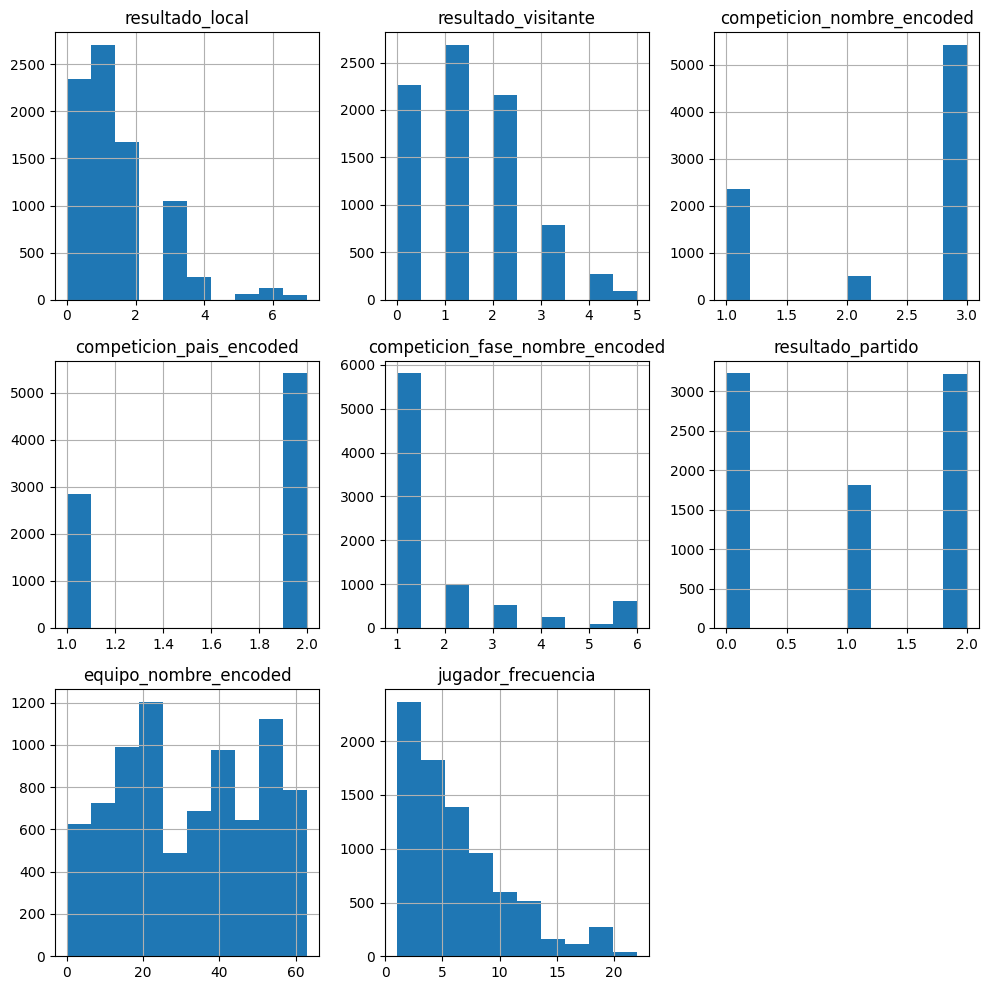

In [313]:
# Gráficos de histogramas para variables numéricas
df_encoded.select_dtypes(include=['int64', 'float64']).hist(figsize=(10, 10))
plt.tight_layout()  # Para evitar la superposición de gráficos
plt.show()

/var/folders/28/lrrh8hnd1vn50xgrqs2vv4_40000gn/T/ipykernel_9494/134268805.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



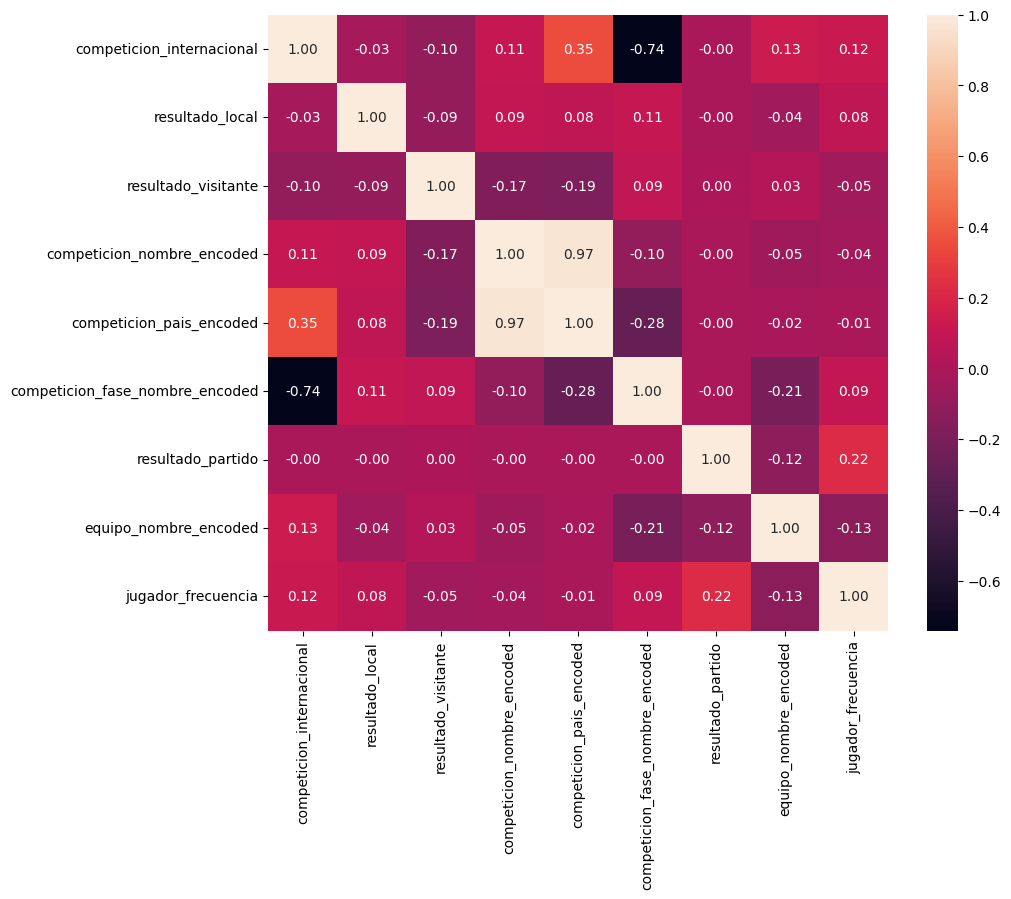

In [314]:
# Matriz de correlación para variables numéricas
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f")
plt.show()

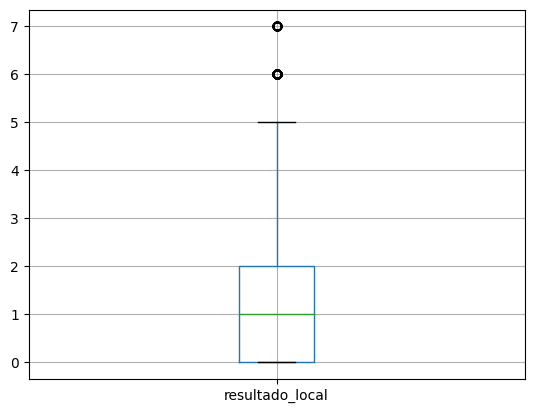

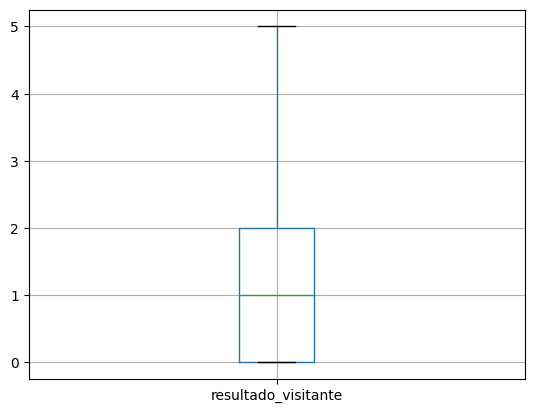

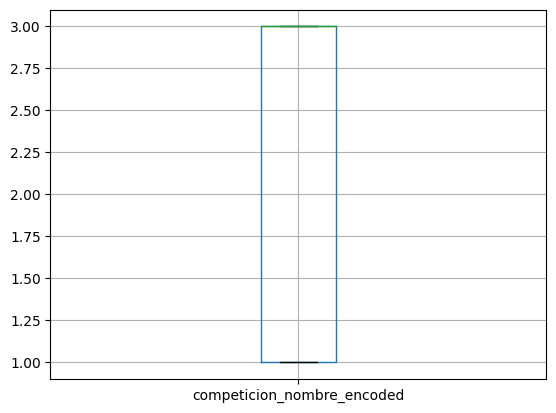

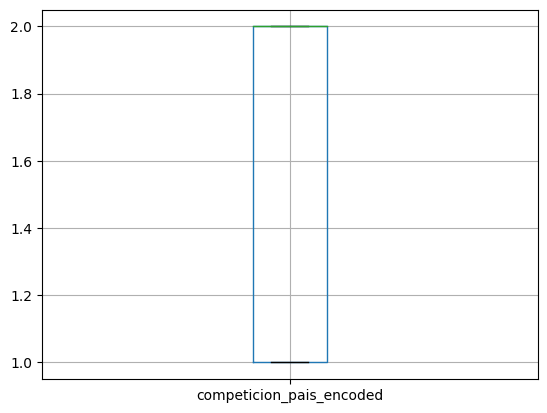

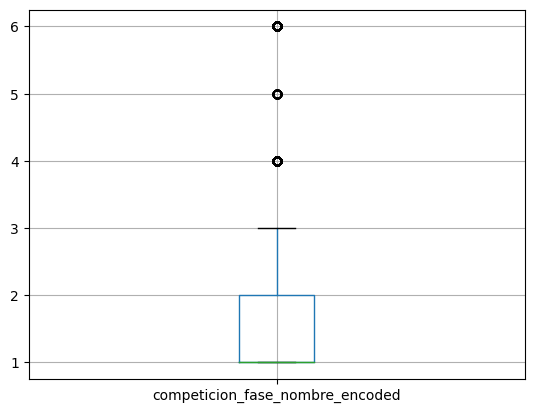

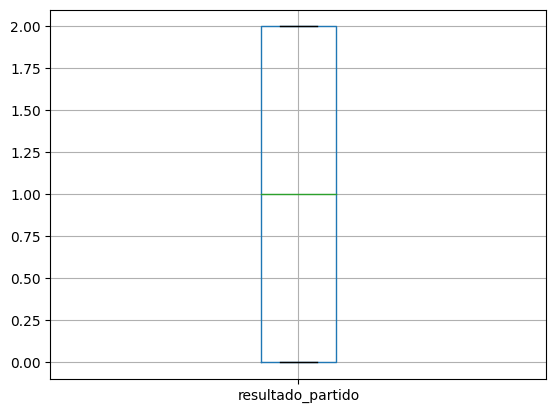

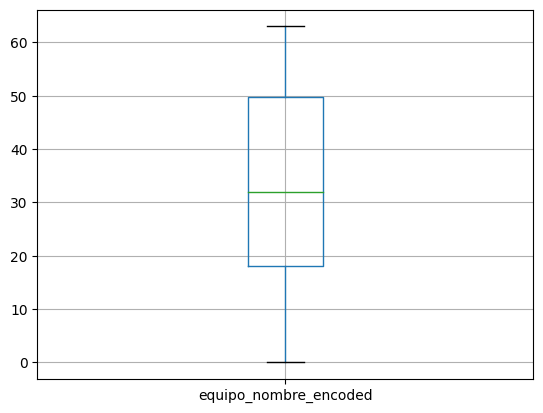

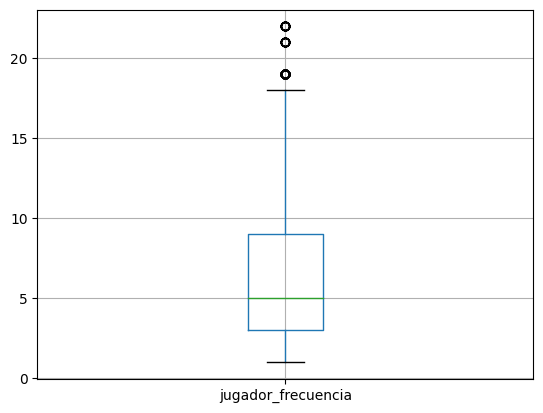

In [315]:
# Gráfico de cajas (boxplot) para cada variable numérica
for col in df_encoded.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure()
    df_encoded.boxplot([col])
plt.show()

In [316]:
for column in df_encoded.columns:
    unique_values = df_encoded[column].unique()
    print(f'Los valores únicos de la columna {column} son: {unique_values}')

Los valores únicos de la columna competicion_internacional son: [False  True]
Los valores únicos de la columna resultado_local son: [2 0 3 1 4 5 6 7]
Los valores únicos de la columna resultado_visitante son: [1 0 2 3 4 5]
Los valores únicos de la columna equipo_nombre son: ['Liverpool' 'AC Milan' 'Barcelona' 'Manchester United' 'Inter Milan'
 'Bayern Munich' 'Chelsea' 'Borussia Dortmund' 'Real Madrid'
 'Atlético Madrid' 'Juventus' 'Russia' 'Saudi Arabia' 'Egypt' 'Uruguay'
 'Morocco' 'Iran' 'Portugal' 'Spain' 'France' 'Australia' 'Argentina'
 'Iceland' 'Denmark' 'Peru' 'Nigeria' 'Croatia' 'Serbia' 'Costa Rica'
 'Mexico' 'Germany' 'Brazil' 'Switzerland' 'South Korea' 'Sweden'
 'Belgium' 'Panama' 'Tunisia' 'England' 'Japan' 'Colombia' 'Senegal'
 'Poland' 'Tottenham Hotspur' 'Italy' 'Turkey' 'Wales' 'Finland' 'Austria'
 'North Macedonia' 'Netherlands' 'Ukraine' 'Scotland' 'Czech Republic'
 'Slovakia' 'Hungary' 'Ecuador' 'Qatar' 'United States' 'Canada'
 'Cameroon' 'Ghana' 'FC Porto' 'AS Mo

In [317]:
frecuencia_jugadores = df_encoded['equipo_nombre'].value_counts()
df_encoded['equipo_frecuencia'] = df_encoded['equipo_nombre'].map(frecuencia_jugadores)
df_encoded

,competicion_internacional,resultado_local,resultado_visitante,equipo_nombre,jugador_nombre,jugador_nacionalidad,competicion_nombre_encoded,competicion_pais_encoded,competicion_fase_nombre_encoded,resultado_partido,equipo_nombre_encoded,jugador_frecuencia,equipo_frecuencia
0,False,2,1,Liverpool,Peter Crouch,England,2,1,6,0,34,1,73
1,False,2,1,Liverpool,Javier Alejandro Mascherano,Argentina,2,1,6,0,34,7,73
2,False,2,1,Liverpool,José Manuel Reina Páez,Spain,2,1,6,0,34,2,73
3,False,2,1,AC Milan,Clarence Seedorf,Netherlands,2,1,6,2,0,2,32
4,False,2,1,AC Milan,Paolo Maldini,Italy,2,1,6,2,0,2,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8253,False,0,3,AS Monaco,Andreas Vasilios Zikos,Greece,2,1,6,0,1,1,14
8254,False,0,3,FC Porto,Vanderlei Fernandes Silva,Portugal,2,1,6,2,22,1,14
8255,False,0,3,FC Porto,Carlos Alberto Gomes de Jesus,Brazil,2,1,6,2,22,1,14
8256,False,0,3,FC Porto,Pedro Emanuel dos Santos Martins Silva,Portugal,2,1,6,2,22,1,14


In [318]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8258 entries, 0 to 8257
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   competicion_internacional        8258 non-null   bool  
 1   resultado_local                  8258 non-null   int64 
 2   resultado_visitante              8258 non-null   int64 
 3   equipo_nombre                    8258 non-null   object
 4   jugador_nombre                   8258 non-null   object
 5   jugador_nacionalidad             8258 non-null   object
 6   competicion_nombre_encoded       8258 non-null   int64 
 7   competicion_pais_encoded         8258 non-null   int64 
 8   competicion_fase_nombre_encoded  8258 non-null   int64 
 9   resultado_partido                8258 non-null   int64 
 10  equipo_nombre_encoded            8258 non-null   int64 
 11  jugador_frecuencia               8258 non-null   int64 
 12  equipo_frecuencia                8

In [319]:
print(f'En el dataset de Statsbomb hay: {len(pd.unique(df_encoded["competicion_nombre_encoded"]))} competiciones, correspondiente a {len(pd.unique(df_encoded["jugador_nombre"]))} jugadores. '
      f'Sumando un total de {len(df_encoded)} torneos.')

En el dataset de Statsbomb hay: 3 competiciones, correspondiente a 1902 jugadores. Sumando un total de 8258 torneos.


In [320]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Definición del modelo
modelo = LogisticRegression(max_iter=1000)

# Definición de los hiperparámetros a probar
hiperparametros = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] }

# Columnas a utilizar para el entrenamiento
columnas_entrenamiento = ['competicion_internacional', 'competicion_nombre_encoded',
                          'competicion_fase_nombre_encoded', 'jugador_frecuencia', 'equipo_frecuencia']

X = df_encoded[columnas_entrenamiento]
y = df_encoded['resultado_partido']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo y búsqueda de los mejores hiperparámetros
clf = GridSearchCV(modelo, hiperparametros, cv=5)
clf.fit(X_train, y_train)

print(f"Best parameters: {clf.best_params_}")

/Users/Santana/PycharmProjects/TFM_/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/Santana/PycharmProjects/TFM_/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Best parameters: {'C': 1000}


In [321]:
# Predicción con los datos de prueba
y_pred = clf.predict(X_test)

In [322]:
# Imprime el informe de clasificación en formato texto
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.49      0.70      0.58       627
           1       0.33      0.05      0.08       366
           2       0.49      0.53      0.51       659

    accuracy                           0.49      1652
   macro avg       0.44      0.42      0.39      1652
weighted avg       0.46      0.49      0.44      1652



Confusion matrix:


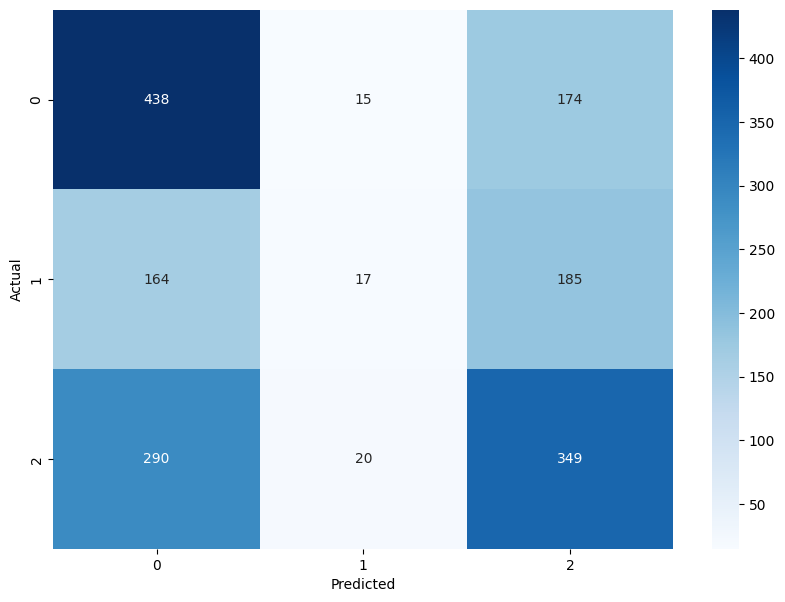

In [323]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
# Visualiza la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [324]:
# Realiza la predicción de las probabilidades
probabilidades = clf.predict_proba(X)

# Obtén las probabilidades de victoria (clase 2)
probabilidades_victoria = probabilidades[:, 2]

# Crea un DataFrame con las probabilidades de victoria
df_probabilidades = pd.DataFrame(probabilidades_victoria, columns=['probabilidad_victoria'])

# Añade una columna con las frecuencias de los jugadores
df_probabilidades['jugador_frecuencia'] = X['jugador_frecuencia'].reset_index(drop=True)

# Une el DataFrame de las probabilidades con el DataFrame original para obtener las columnas adicionales
df_probabilidades = df_probabilidades.merge(df_encoded[['jugador_nombre', 'jugador_frecuencia', 'equipo_nombre', 'jugador_nacionalidad']],
                                            on='jugador_frecuencia',
                                            how='left')

# Comprueba si hay duplicados
print("Número de duplicados antes de eliminarlos:", df_probabilidades.duplicated().sum())

# Elimina los duplicados
df_probabilidades.drop_duplicates(inplace=True)

# Comprueba si hay duplicados después de eliminarlos
print("Número de duplicados después de eliminarlos:", df_probabilidades.duplicated().sum())

# Ordena el DataFrame por probabilidad de victoria en orden descendente
df_probabilidades.sort_values('probabilidad_victoria', ascending=False, inplace=True)

# Selecciona solo las columnas de interés
df_probabilidades = df_probabilidades[['probabilidad_victoria', 'jugador_nombre', 'equipo_nombre', 'jugador_nacionalidad']]

df_probabilidades

Número de duplicados antes de eliminarlos: 6702815
Número de duplicados después de eliminarlos: 0


,probabilidad_victoria,jugador_nombre,equipo_nombre,jugador_nacionalidad
427220,0.677385,Luka Modrić,Real Madrid,Croatia
427224,0.677385,Luka Modrić,Croatia,Croatia
318387,0.669288,Raphaël Varane,Real Madrid,France
318390,0.669288,Raphaël Varane,France,France
572831,0.663137,Kieran Trippier,Tottenham Hotspur,England
...,...,...,...,...
3798740,0.103927,Nemanja Gudelj,Serbia,Serbia
3798741,0.103927,Dušan Vlahović,Serbia,Serbia
3798742,0.103927,Srđan Babić,Serbia,Serbia
3798743,0.103927,Vanja Milinković Savić,Serbia,Serbia


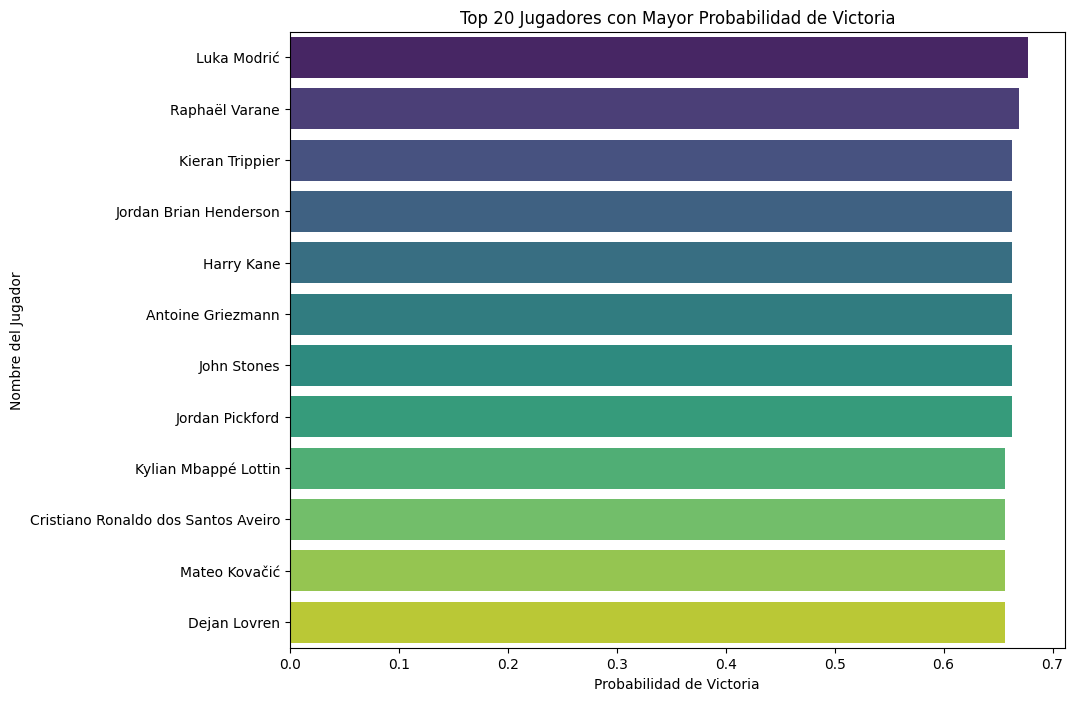

In [325]:
# Tomamos los primeros 20 jugadores con mayor probabilidad de victoria
top_20_jugadores = df_probabilidades.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_20_jugadores, y='jugador_nombre', x='probabilidad_victoria', orient='h', palette='viridis')
plt.xlabel('Probabilidad de Victoria')
plt.ylabel('Nombre del Jugador')
plt.title('Top 20 Jugadores con Mayor Probabilidad de Victoria')
plt.show()

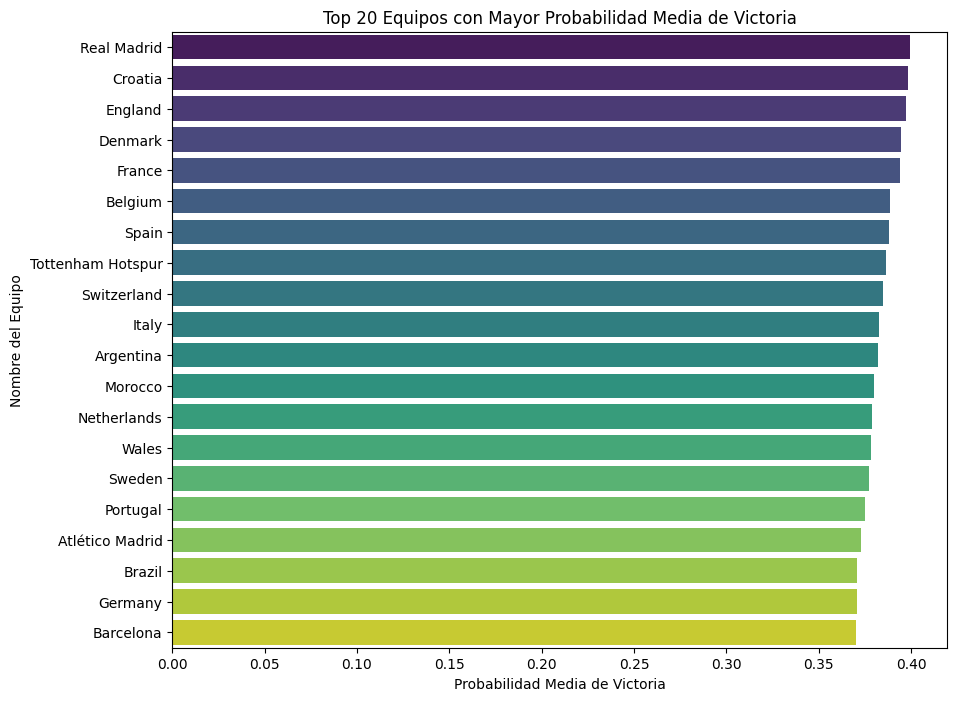

In [326]:
# Calcula la probabilidad media de victoria de cada equipo
df_equipo_probabilidades = df_probabilidades.groupby('equipo_nombre')['probabilidad_victoria'].mean().reset_index()

# Ordena los equipos por probabilidad media de victoria en orden descendente
df_equipo_probabilidades.sort_values('probabilidad_victoria', ascending=False, inplace=True)

# Selecciona los 20 equipos con mayor probabilidad media de victoria
top_20_equipos = df_equipo_probabilidades.head(20)
plt.figure(figsize=(10, 8))
sns.barplot(data=top_20_equipos, y='equipo_nombre', x='probabilidad_victoria', orient='h', palette='viridis')
plt.xlabel('Probabilidad Media de Victoria')
plt.ylabel('Nombre del Equipo')
plt.title('Top 20 Equipos con Mayor Probabilidad Media de Victoria')
plt.show()

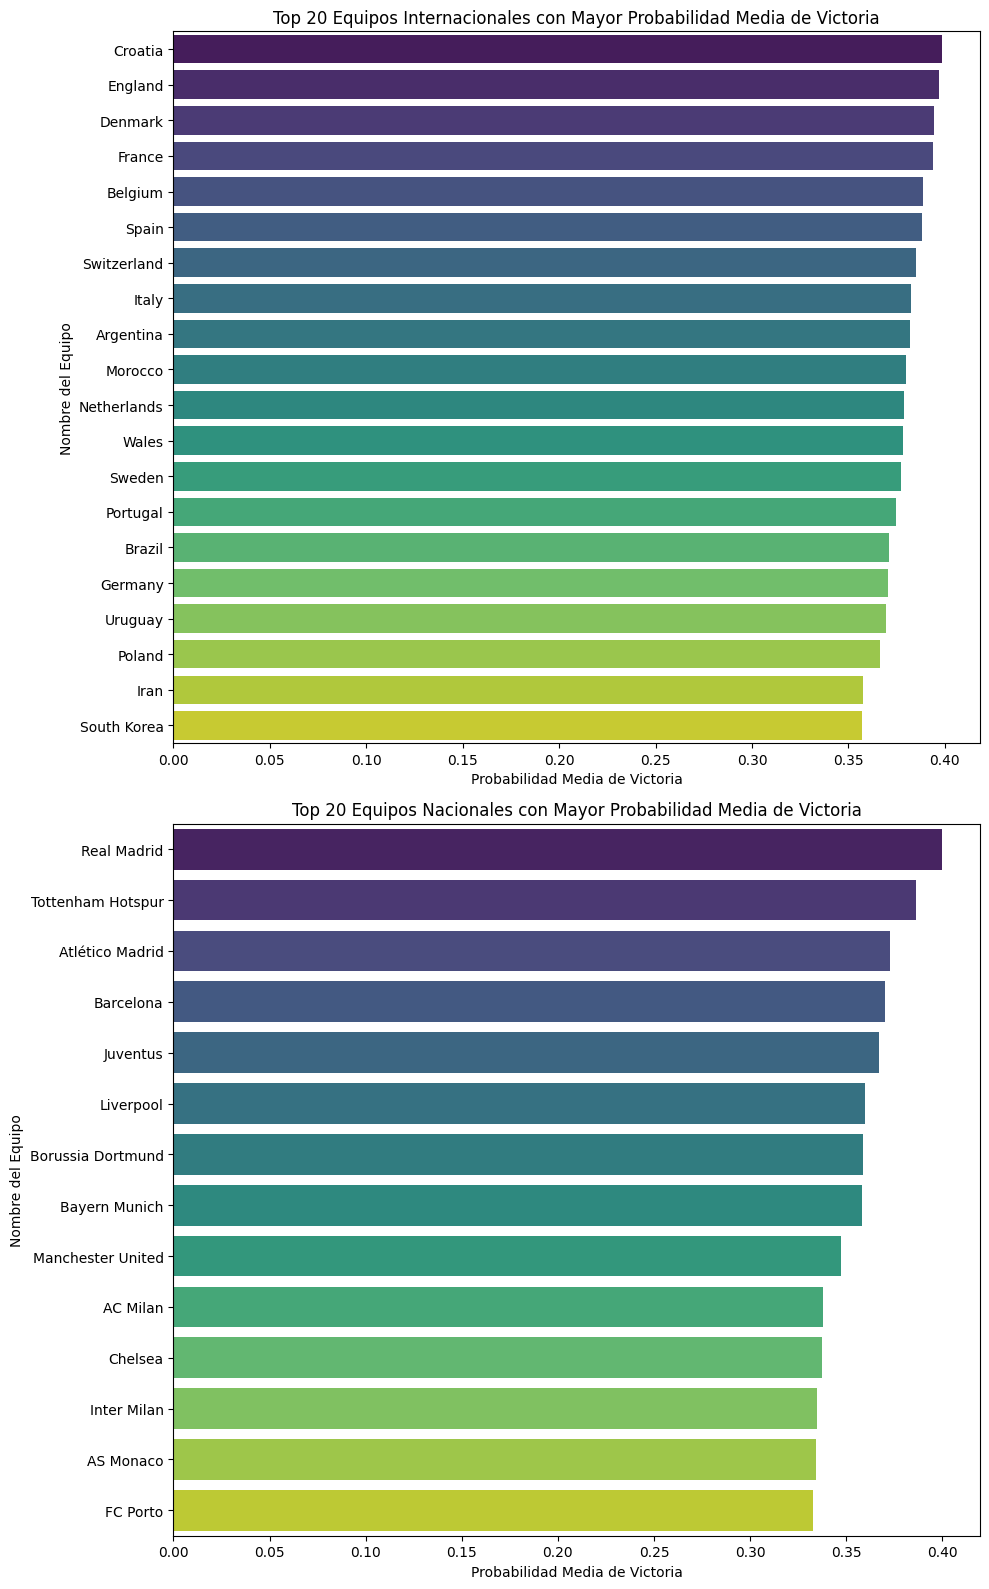

In [327]:
df_probabilidades = df_probabilidades.merge(df_encoded[['equipo_nombre', 'competicion_internacional']],
                                            on='equipo_nombre',
                                            how='left')
# Calcula la probabilidad media de victoria de cada equipo por competicion internacional
df_equipo_probabilidades = df_probabilidades.groupby(['equipo_nombre', 'competicion_internacional'])['probabilidad_victoria'].mean().reset_index()

# Selecciona los 20 equipos con mayor probabilidad media de victoria que juegan competiciones internacionales
top_20_equipos_internacionales = df_equipo_probabilidades[df_equipo_probabilidades['competicion_internacional'] == True].sort_values('probabilidad_victoria', ascending=False).head(20)

# Selecciona los 20 equipos con mayor probabilidad media de victoria que no juegan competiciones internacionales
top_20_equipos_nacionales = df_equipo_probabilidades[df_equipo_probabilidades['competicion_internacional'] == False].sort_values('probabilidad_victoria', ascending=False).head(20)
fig, axes = plt.subplots(2, 1, figsize=(10, 16))

sns.barplot(ax=axes[0], data=top_20_equipos_internacionales, y='equipo_nombre', x='probabilidad_victoria', orient='h', palette='viridis')
axes[0].set_title('Top 20 Equipos Internacionales con Mayor Probabilidad Media de Victoria')
axes[0].set_xlabel('Probabilidad Media de Victoria')
axes[0].set_ylabel('Nombre del Equipo')

sns.barplot(ax=axes[1], data=top_20_equipos_nacionales, y='equipo_nombre', x='probabilidad_victoria', orient='h', palette='viridis')
axes[1].set_title('Top 20 Equipos Nacionales con Mayor Probabilidad Media de Victoria')
axes[1].set_xlabel('Probabilidad Media de Victoria')
axes[1].set_ylabel('Nombre del Equipo')

plt.tight_layout()
plt.show()

0    3229
2    3219
1    1810
Name: resultado_partido, dtype: int64


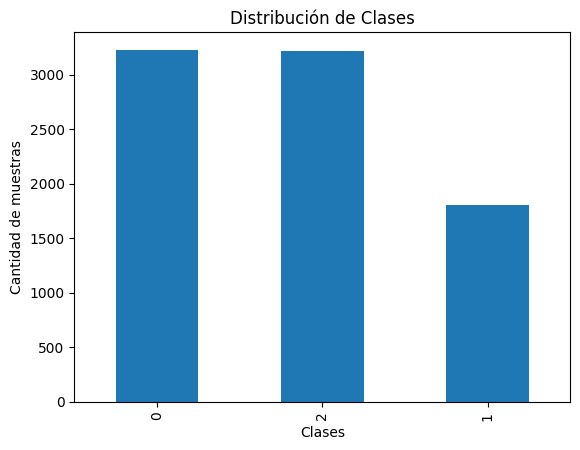

0    0.391015
2    0.389804
1    0.219181
Name: resultado_partido, dtype: float64


In [328]:

# Contar los valores de cada clase
class_counts = df_encoded['resultado_partido'].value_counts()
print(class_counts)

# Visualizar la distribución de clases
class_counts.plot(kind='bar')
plt.xlabel('Clases')
plt.ylabel('Cantidad de muestras')
plt.title('Distribución de Clases')
plt.show()
plt.savefig('resources/model_features.png', bbox_inches='tight')

# Calcular la proporción de clases
class_proportions = df_encoded['resultado_partido'].value_counts(normalize=True)
print(class_proportions)


In [329]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

modelos = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=2000),
        'params': {'C': [0.1, 1, 10]}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'C': [1, 10], 'gamma': [0.1, 1]}
    },
    'NeuralNetwork': {
        'model': MLPClassifier(max_iter=2000),
        'params': {'hidden_layer_sizes': [(50,50,50), (100,)],
                   'activation': ['tanh', 'relu'],
                   'solver': ['adam'],
                   'alpha': [0.0001, 0.01],
                   'learning_rate': ['constant']}
    }
}

columnas_entrenamiento = ['competicion_internacional', 'competicion_nombre_encoded',
                          'competicion_fase_nombre_encoded', 'jugador_frecuencia', 'equipo_frecuencia']

X = df_encoded[columnas_entrenamiento]
y = df_encoded['resultado_partido']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mejor_score = 0.0
mejor_clasificador = None
resultados_modelos = []

for nombre_modelo, mp in modelos.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_train, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': clf.best_score_,
        'Mejores Parámetros': clf.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if clf.best_score_ > mejor_score:
        mejor_score = clf.best_score_
        mejor_clasificador = clf

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_clasificador.best_estimator_} con un score de: {mejor_score}")

from joblib import dump
# Guardar el mejor modelo
dump(mejor_clasificador, 'mejor_modelo.joblib')

               Modelo  Mejor Score  \
0  LogisticRegression     0.502877   
1        DecisionTree     0.646532   
2                 SVM     0.659250   
3       NeuralNetwork     0.551928   

                                  Mejores Parámetros  
0                                           {'C': 1}  
1                                  {'max_depth': 12}  
2                            {'C': 10, 'gamma': 0.1}  
3  {'activation': 'tanh', 'alpha': 0.0001, 'hidde...  

El mejor modelo es: SVC(C=10, gamma=0.1, probability=True) con un score de: 0.6592501440136695


['mejor_modelo.joblib']

In [330]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

modelos = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=2000),
        'params': {'C': [0.1, 1, 10]}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'C': [1, 10], 'gamma': [0.1, 1]}
    },
    'NeuralNetwork': {
        'model': MLPClassifier(max_iter=2000),
        'params': {'hidden_layer_sizes': [(50,50,50), (100,)],
                   'activation': ['tanh', 'relu'],
                   'solver': ['adam'],
                   'alpha': [0.0001, 0.01],
                   'learning_rate': ['constant']}
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [100, 200, 300],
                   'max_depth': [4, 8, 12]}
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    }
}

columnas_entrenamiento = ['competicion_internacional', 'competicion_nombre_encoded',
                          'competicion_fase_nombre_encoded', 'jugador_frecuencia', 'equipo_frecuencia']

X = df_encoded[columnas_entrenamiento]
y = df_encoded['resultado_partido']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mejor_score = 0.0
mejor_clasificador = None
resultados_modelos = []

for nombre_modelo, mp in modelos.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_train, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': clf.best_score_,
        'Mejores Parámetros': clf.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if clf.best_score_ > mejor_score:
        mejor_score = clf.best_score_
        mejor_clasificador = clf

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_clasificador.best_estimator_} con un score de: {mejor_score}")

from joblib import dump
# Guardar el mejor modelo
dump(mejor_clasificador, 'mejor_modelo.joblib')

               Modelo  Mejor Score  \
0  LogisticRegression     0.502877   
1        DecisionTree     0.646078   
2                 SVM     0.659250   
3       NeuralNetwork     0.527702   
4        RandomForest     0.659250   
5          GaussianNB     0.491827   

                                  Mejores Parámetros  
0                                           {'C': 1}  
1                                  {'max_depth': 12}  
2                            {'C': 10, 'gamma': 0.1}  
3  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...  
4             {'max_depth': 12, 'n_estimators': 200}  
5                                                 {}  

El mejor modelo es: RandomForestClassifier(max_depth=12, n_estimators=200) con un score de: 0.6592503730612553


['mejor_modelo.joblib']


Classification report:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       627
           1       0.65      0.46      0.54       366
           2       0.65      0.66      0.66       659

    accuracy                           0.65      1652
   macro avg       0.65      0.62      0.63      1652
weighted avg       0.65      0.65      0.64      1652



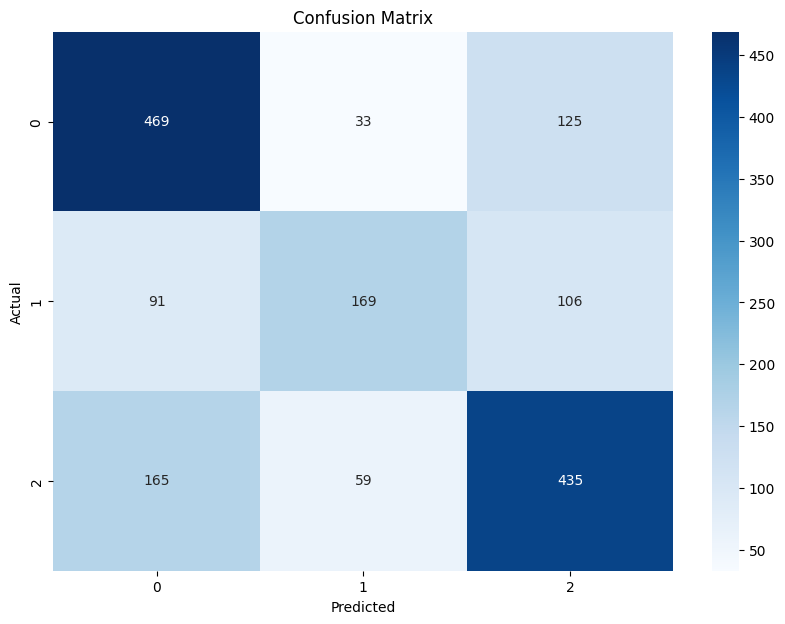

In [333]:
# Predicción con los datos de prueba
y_pred = mejor_clasificador.predict(X_test)

# Imprime el informe de clasificación en formato texto
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('resources/matriz_confusion.png', bbox_inches='tight')

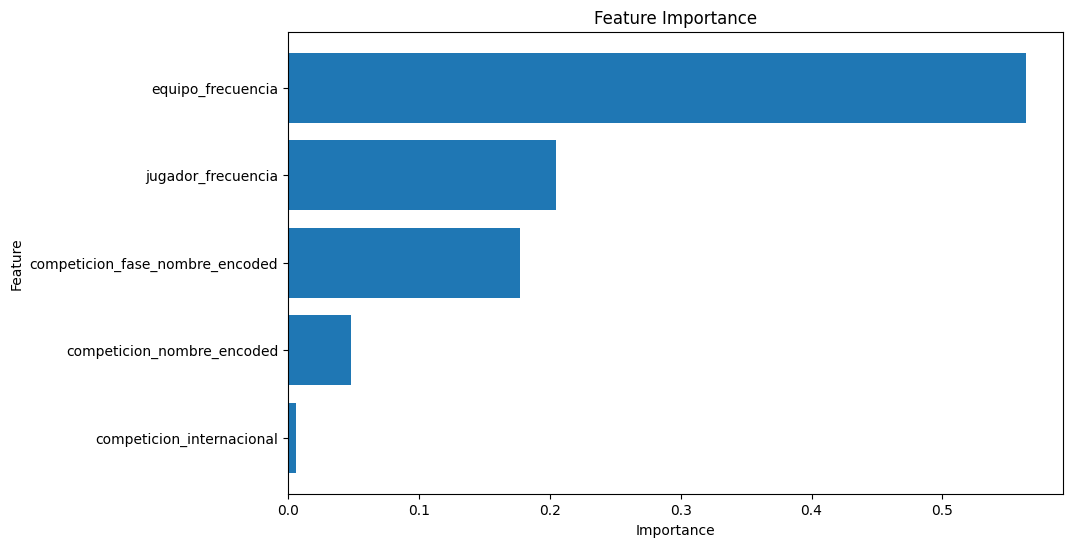

In [335]:
from joblib import load
import matplotlib.pyplot as plt

# Cargar el mejor modelo entrenado
best_grid = load('mejor_modelo.joblib')

# Obtener el modelo seleccionado del diccionario de modelos
selected_model = best_grid.best_estimator_

# Obtener las características utilizadas por el modelo seleccionado
features = X_train.columns

# Obtener la importancia de características del modelo seleccionado
importances = selected_model.feature_importances_

# Crear un DataFrame para visualizar las importancias de características
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Visualizar las importancias de características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()
plt.savefig('resources/caracteristicas_modelo.png', bbox_inches='tight')

In [167]:
# Realiza la predicción de las probabilidades
probabilidades = mejor_clasificador.predict_proba(X)

# Obtén las probabilidades de victoria (clase 2)
probabilidades_victoria = probabilidades[:, 2]

# Crea un DataFrame con las probabilidades de victoria
df_probabilidades = pd.DataFrame(probabilidades_victoria, columns=['probabilidad_victoria'])

# Añade una columna con las frecuencias de los jugadores
df_probabilidades['jugador_frecuencia'] = X['jugador_frecuencia'].reset_index(drop=True)

# Une el DataFrame de las probabilidades con el DataFrame original para obtener las columnas adicionales
df_probabilidades = df_probabilidades.merge(df_encoded[['jugador_nombre', 'jugador_frecuencia', 'equipo_nombre', 'jugador_nacionalidad']],
                                            on='jugador_frecuencia',
                                            how='left')

# Comprueba si hay duplicados
print("\nNúmero de duplicados antes de eliminarlos:", df_probabilidades.duplicated().sum())

# Elimina los duplicados
df_probabilidades.drop_duplicates(inplace=True)

# Comprueba si hay duplicados después de eliminarlos
print("Número de duplicados después de eliminarlos:", df_probabilidades.duplicated().sum())

# Ordena el DataFrame por probabilidad de victoria en orden descendente
df_probabilidades.sort_values('probabilidad_victoria', ascending=False, inplace=True)

# Selecciona solo las columnas de interés
df_probabilidades = df_probabilidades[['probabilidad_victoria', 'jugador_nombre', 'equipo_nombre', 'jugador_nacionalidad']]

df_probabilidades


Número de duplicados antes de eliminarlos: 6702815
Número de duplicados después de eliminarlos: 0


,probabilidad_victoria,jugador_nombre,equipo_nombre,jugador_nacionalidad
1928513,0.924313,Vitor Machado Ferreira,Portugal,Portugal
1928003,0.924313,Fernando Luiz Rosa,Brazil,Brazil
1928011,0.924313,Ashley Young,England,England
1928010,0.924313,Andreas Granqvist,Sweden,Sweden
1928009,0.924313,Ola Toivonen,Sweden,Sweden
...,...,...,...,...
514696,0.006740,Simone Padoin,Juventus,Italy
514697,0.006740,Arturo Erasmo Vidal Pardo,Juventus,Chile
514698,0.006740,Jérémy Mathieu,Barcelona,France
514699,0.006740,Marco Storari,Juventus,Italy


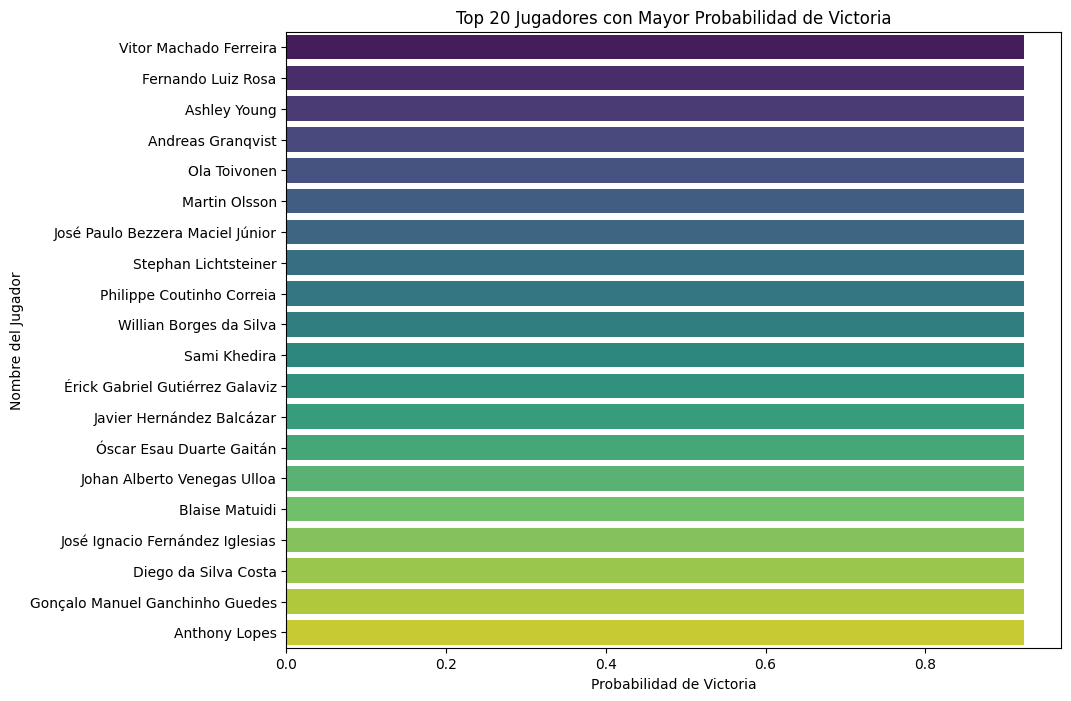

In [168]:
# Visualización de los 20 jugadores con mayor probabilidad de victoria
top_20_jugadores = df_probabilidades.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_20_jugadores, y='jugador_nombre', x='probabilidad_victoria', orient='h', palette='viridis')
plt.xlabel('Probabilidad de Victoria')
plt.ylabel('Nombre del Jugador')
plt.title('Top 20 Jugadores con Mayor Probabilidad de Victoria')
plt.show()
plt.savefig('resources/prediccion_top20_jugadores.png', bbox_inches='tight')

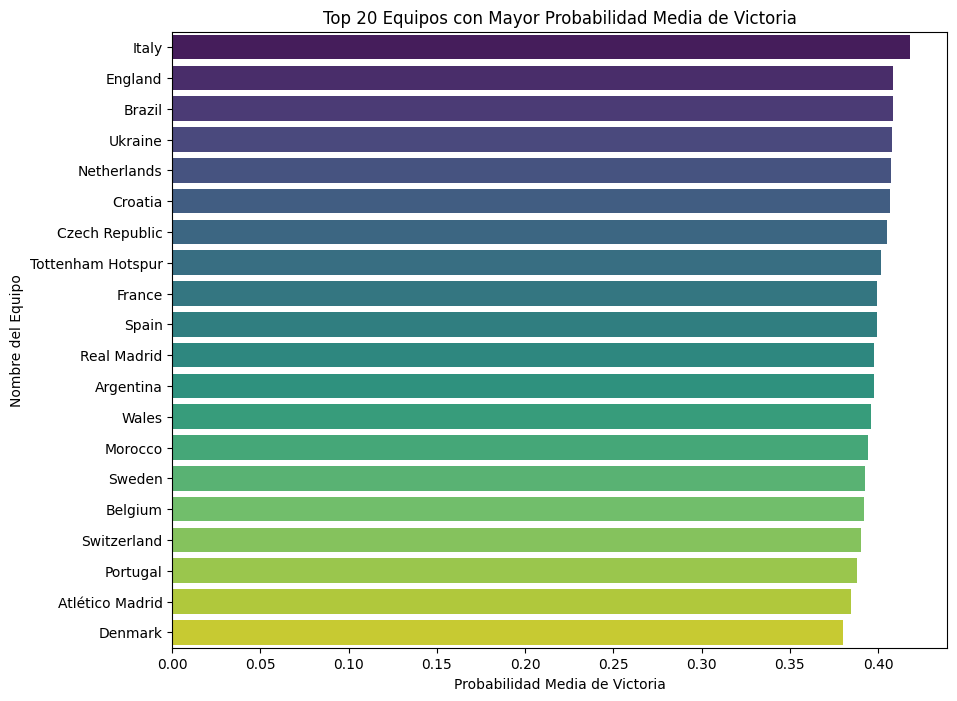

In [169]:
# Calcula la probabilidad media de victoria de cada equipo
df_equipo_probabilidades = df_probabilidades.groupby('equipo_nombre')['probabilidad_victoria'].mean().reset_index()

# Ordena los equipos por probabilidad media de victoria en orden descendente
df_equipo_probabilidades.sort_values('probabilidad_victoria', ascending=False, inplace=True)

# Selecciona los 20 equipos con mayor probabilidad media de victoria
top_20_equipos = df_equipo_probabilidades.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_20_equipos, y='equipo_nombre', x='probabilidad_victoria', orient='h', palette='viridis')
plt.xlabel('Probabilidad Media de Victoria')
plt.ylabel('Nombre del Equipo')
plt.title('Top 20 Equipos con Mayor Probabilidad Media de Victoria')
plt.show()
plt.savefig('resources/prediccion_top20_equipos.png', bbox_inches='tight')

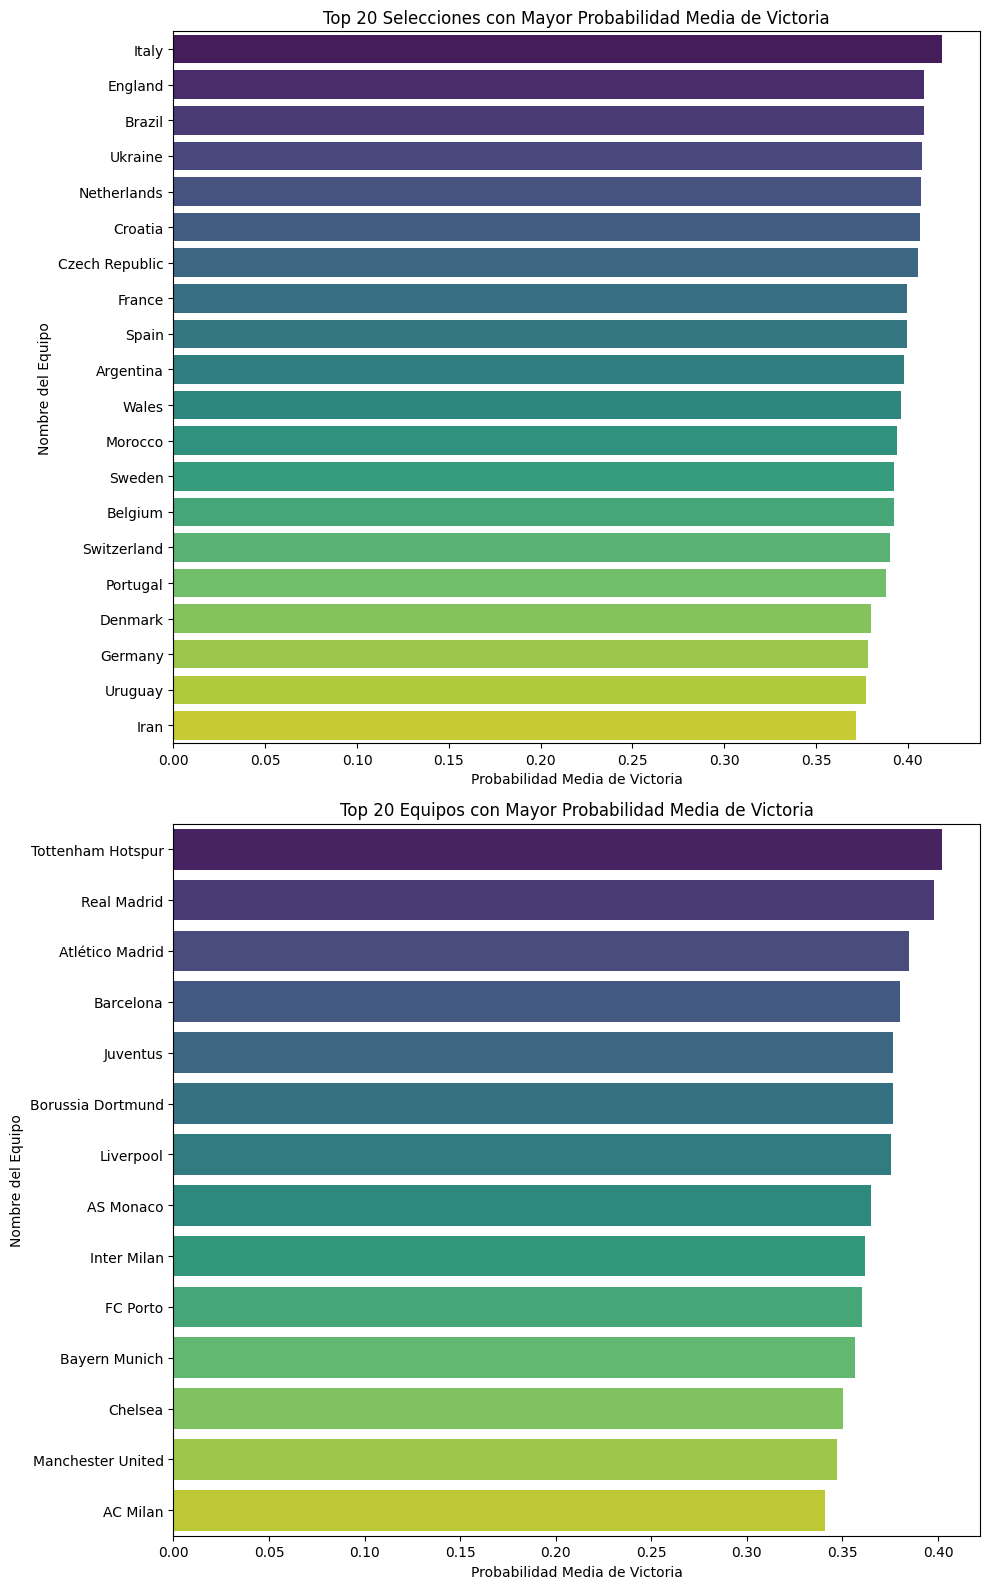

In [170]:
# Cálculo de la probabilidad media de victoria de cada equipo por competición internacional
df_probabilidades = df_probabilidades.merge(df_encoded[['equipo_nombre', 'competicion_internacional']],
                                            on='equipo_nombre',
                                            how='left')

df_equipo_probabilidades = df_probabilidades.groupby(['equipo_nombre', 'competicion_internacional'])['probabilidad_victoria'].mean().reset_index()

# Selección de los 20 equipos con mayor probabilidad media de victoria en competiciones internacionales y no internacionales
top_20_equipos_internacionales = df_equipo_probabilidades[df_equipo_probabilidades['competicion_internacional'] == True].sort_values('probabilidad_victoria', ascending=False).head(20)
top_20_equipos_nacionales = df_equipo_probabilidades[df_equipo_probabilidades['competicion_internacional'] == False].sort_values('probabilidad_victoria', ascending=False).head(20)

fig, axes = plt.subplots(2, 1, figsize=(10, 16))

sns.barplot(ax=axes[0], data=top_20_equipos_internacionales, y='equipo_nombre', x='probabilidad_victoria', orient='h', palette='viridis')
axes[0].set_title('Top 20 Selecciones con Mayor Probabilidad Media de Victoria')
axes[0].set_xlabel('Probabilidad Media de Victoria')
axes[0].set_ylabel('Nombre del Equipo')

sns.barplot(ax=axes[1], data=top_20_equipos_nacionales, y='equipo_nombre', x='probabilidad_victoria', orient='h', palette='viridis')
axes[1].set_title('Top 20 Equipos con Mayor Probabilidad Media de Victoria')
axes[1].set_xlabel('Probabilidad Media de Victoria')
axes[1].set_ylabel('Nombre del Equipo')

plt.tight_layout()
plt.show()
plt.savefig('resources/prediccion_top20_equipos_selecciones.png', bbox_inches='tight')

### FASE 4

In [ ]:
# Importamos las bibliotecas necesarias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Suponemos que tienes tus datos en un DataFrame de Pandas llamado df
X = df.drop('resultado_partido', axis=1)
y = df['resultado_partido']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos los modelos y los hiperparámetros que queremos probar
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'parameters': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'parameters': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 15, 20]
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'parameters': {
            'C': [0.1, 1, 10, 100],
            'gamma': [1, 0.1, 0.01, 0.001],
            'kernel': ['rbf', 'linear', 'poly']
        }
    },
    'MLP': {
        'model': MLPClassifier(max_iter=1000),
        'parameters': {
            'hidden_layer_sizes': [(10, 10), (20, 20)],
            'activation': ['tanh', 'relu'],
            'learning_rate': ['constant', 'adaptive']
        }
    }
}

# Iteramos a través de nuestros modelos y usamos GridSearchCV para encontrar los mejores hiperparámetros
for model_name, model_params in models.items():
    clf = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)

    # Los mejores hiperparámetros para cada modelo
    print(f"Best parameters for {model_name}: {clf.best_params_}")

    # Evaluación del modelo con los mejores hiperparámetros en los datos de entrenamiento
    print(f"Best cross-validated accuracy for {model_name}: {clf.best_score_}")

    # Hacemos predicciones con nuestros datos de prueba usando el mejor modelo
    y_pred = clf.predict(X_test)

    # Evaluación del modelo con los mejores hiperparámetros en los datos de prueba
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))

    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

In [474]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Seleccionar las características relevantes para el modelo
features = ['competicion_internacional', 'resultado_local', 'resultado_visitante', 'equipo_nombre_encoded']
target = 'resultado_partido'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_encoded[features], df_encoded[target], test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Bosques Aleatorios
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:', accuracy)

Exactitud del modelo: 0.9309927360774818


In [144]:
ruta_eventos = glob.glob(os.path.join("data",'events','**','*.json'),recursive=True)

In [146]:
import pandas as pd
import json
import glob

# Crea un DataFrame vacío
df_eventos = pd.DataFrame()

# Itera sobre cada archivo JSON en la lista
for file_name in ruta_eventos:
    # Abre el archivo y carga los datos JSON
    with open(file_name) as file:
        data = json.load(file)

    # Convierte los datos en un DataFrame de pandas
    data_df = pd.json_normalize(data, sep="_")

    # Agrega los datos al DataFrame principal
    df = pd.concat([df_eventos, data_df], ignore_index=True)

# Ahora df contiene todos los datos de eventos de todos los archivos JSON
print(df_eventos.head())

Empty DataFrame
Columns: []
Index: []


In [147]:
df

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,clearance_head,clearance_body_part_id,clearance_body_part_name,clearance_aerial_won,duel_outcome_id,duel_outcome_name,interception_outcome_id,interception_outcome_name,shot_statsbomb_xg,shot_end_location,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,off_camera,pass_cross,clearance_left_foot,goalkeeper_outcome_id,goalkeeper_outcome_name,counterpress,out,miscontrol_aerial_won,ball_recovery_recovery_failure,pass_switch,pass_assisted_shot_id,pass_shot_assist,pass_outswinging,pass_technique_id,pass_technique_name,shot_key_pass_id,shot_first_time,dribble_outcome_id,dribble_outcome_name,pass_aerial_won,clearance_right_foot,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,pass_inswinging,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,shot_aerial_won,50_50_outcome_id,50_50_outcome_name,dribble_overrun,ball_recovery_offensive,foul_committed_advantage,foul_won_advantage,block_deflection,pass_through_ball,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,block_offensive,pass_cut_back,pass_deflected,shot_one_on_one
0,2e4b1b7f-e67e-4bef-8cf1-2eab2ab81af2,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,773,Switzerland,1,Regular Play,773,Switzerland,4231.0,"[{'player': {'id': 5550, 'name': 'Yann Sommer'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f73c3f38-8c45-4802-8cb9-5a87234f385b,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,773,Switzerland,1,Regular Play,772,Spain,433.0,"[{'player': {'id': 11748, 'name': 'Unai Simón ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9098375d-3f07-4241-bdc9-3602a2e5c754,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,773,Switzerland,1,Regular Play,772,Spain,NaN,NaN,[18099197-a92a-4398-ac5e-39dad539c3eb],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18099197-a92a-4398-ac5e-39dad539c3eb,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,773,Switzerland,1,Regular Play,773,Switzerland,NaN,NaN,[9098375d-3f07-4241-bdc9-3602a2e5c754],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Columns: 116 entries, id to shot_one_on_one
dtypes: float64(33), int64(9), object(74)
memory usage: 4.4+ MB


In [149]:
df.missing_values_table(df)

AttributeError: 'DataFrame' object has no attribute 'missing_values_table'

In [150]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
# Drop the columns
df = df.drop(list(missing_columns), axis=1)

El dataframe tiene 116 columnas.
Hay 101 columnas que les faltan valores.
Se eliminan 94 columnas.


In [151]:
df

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,related_events,location,player_id,player_name,position_id,position_name
0,2e4b1b7f-e67e-4bef-8cf1-2eab2ab81af2,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,773,Switzerland,1,Regular Play,773,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN
1,f73c3f38-8c45-4802-8cb9-5a87234f385b,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,773,Switzerland,1,Regular Play,772,Spain,NaN,NaN,NaN,NaN,NaN,NaN
2,9098375d-3f07-4241-bdc9-3602a2e5c754,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,773,Switzerland,1,Regular Play,772,Spain,[18099197-a92a-4398-ac5e-39dad539c3eb],NaN,NaN,NaN,NaN,NaN
3,18099197-a92a-4398-ac5e-39dad539c3eb,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,773,Switzerland,1,Regular Play,773,Switzerland,[9098375d-3f07-4241-bdc9-3602a2e5c754],NaN,NaN,NaN,NaN,NaN
4,ea57ee78-a4ef-4d62-81c7-98cdf1c11925,5,1,00:00:00.967,0,0,2,1.511008,30,Pass,772,Spain,9,From Kick Off,772,Spain,[66655fd3-2764-4532-b1bb-0a01074fed30],"[61.0, 40.1]",3477.0,Álvaro Borja Morata Martín,23.0,Center Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,8d952657-4b7f-498c-ac8a-7a92f8e0bced,4986,5,00:05:54.582,125,54,237,0.000000,23,Goal Keeper,773,Switzerland,5,Other,772,Spain,[74766d37-8c9c-4317-8edf-97eede1b0242],"[1.0, 40.0]",11748.0,Unai Simón Mendibil,1.0,Goalkeeper
4986,5071ddf9-c034-47db-b115-0feb791e9ee4,4987,5,00:07:04.301,127,4,238,0.568020,16,Shot,772,Spain,5,Other,772,Spain,[98257d23-84a8-4a2e-94f2-dea542e5aece],"[108.0, 40.0]",6685.0,Mikel Oyarzabal Ugarte,17.0,Right Wing
4987,98257d23-84a8-4a2e-94f2-dea542e5aece,4988,5,00:07:04.869,127,4,238,0.000000,23,Goal Keeper,772,Spain,5,Other,773,Switzerland,[5071ddf9-c034-47db-b115-0feb791e9ee4],"[1.0, 40.0]",5550.0,Yann Sommer,1.0,Goalkeeper
4988,bc0d4cb2-b0f9-4608-bd0a-4de3719cf6d6,4989,5,00:07:05.592,127,5,238,0.000000,34,Half End,772,Spain,5,Other,772,Spain,[b537892f-2dc4-4fda-bccf-494b82408b2c],NaN,NaN,NaN,NaN,NaN
